In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.ibmq.providers.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_81289/1416725149.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [3]:
def map_statepop_2_ibm_mapping(counts,n):
    counts_ibm_mapping=[0 for i in range (2**(2*n))]
    idx_ibm_mapping=[]
    counts_ibm_mapping_dic={}
    if len(str((2*n)))<2:
        f="00"+str(2*n)+"b"
    elif len(str((2*n)))<3:
        f="0"+str(2*n)+"b"
    else:
        raise ValueError("n is too big")
    for gates_idx in range (2**(2*n)):
        gates_idx_str=format(gates_idx,f)
        ibm_idx=0
        for i in range (2*n):
            ibm_idx+=2**(i)*int(gates_idx_str[i])
        ibm_idx_str=format(ibm_idx,f)
#         idx_ibm_mapping.append(ibm_idx_str)
        counts_ibm_mapping[ibm_idx]=counts[gates_idx]
        counts_ibm_mapping_dic[ibm_idx_str]=counts[gates_idx]
    return counts_ibm_mapping, counts_ibm_mapping_dic
        

In [4]:
Set_Mapping([4,5,2,1,3])
nqubit=2
C=20
results_d2=np.zeros((C,2**(2*nqubit)))
results_d4=np.zeros((C,2**(2*nqubit)))
results_d8=np.zeros((C,2**(2*nqubit)))

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt", 'r')
Lines= file.readlines()
c_d2=[]
count = 0
for line in Lines:
    c_d2.append(line)
    count += 1
print (count)
count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=4.txt", 'r')
Lines= file.readlines()
c_d4=[]
count = 0
for line in Lines:
    c_d4.append(line)
    count += 1
print (count)
count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=8.txt", 'r')
Lines= file.readlines()
c_d8=[]
count = 0
for line in Lines:
    c_d8.append(line)
    count += 1
print (count)
count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=16.txt", 'r')
Lines= file.readlines()
c_d16=[]
count = 0
for line in Lines:
    c_d16.append(line)
    count += 1
print (count)
count=0


file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=32.txt", 'r')
Lines= file.readlines()
c_d32=[]
count = 0
for line in Lines:
    c_d32.append(line)
    count += 1
print (count)
count=0



20
20
20
20
20


In [5]:
filenames_d2=[]
filenames_d4=[]
filenames_d8=[]
filenames_d16=[]
filenames_d32=[]
filenames_d2_0703=[]
filenames_d4_0703=[]
filenames_d8_0703=[]
filenames_d2_rerun=[]
filenames=[]

paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB_45213_d=2/"
L1=[]
filenames=[]
line_Idx="000"
line_num=""
p=0 #position indicator

#------------------------------------------read in raw data-------------------------------
for f in os.listdir(paf_data_d2):
    if (f.find("Line")!=-1):
        n=f.find("_")
        line_Idx=f[n+6:n+9]
        for i in range(3):
            if line_Idx[i]=="0":
                p+=1
            else:
                line_num=line_Idx[p:3]
                p=0
                break
        L1.append(int(line_num))
        filenames.append(f)
    else:
        print (f) #print out non datafiles just for debugging 
        continue
for Idx in range (len(filenames)):
    for i in range (len(filenames)):
        if L1[i]==Idx+1:
            filenames_d2.append(filenames[i])
            break
print (filenames_d2)







paf_data_d4="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=4/"
L1=[]
filenames=[]
line_Idx="000"
line_num=""
p=0 #position indicator

#------------------------------------------read in raw data-------------------------------
for f in os.listdir(paf_data_d4):
    if (f.find("Line")!=-1):
        n=f.find("_")
        line_Idx=f[n+6:n+9]
        for i in range(3):
            if line_Idx[i]=="0":
                p+=1
            else:
                line_num=line_Idx[p:3]
                p=0
                break
        L1.append(int(line_num))
        filenames.append(f)
    else:
        print (f) #print out non datafiles just for debugging 
        continue
for Idx in range (len(filenames)):
    for i in range (len(filenames)):
        if L1[i]==Idx+1:
            filenames_d4.append(filenames[i])
            break
print (filenames_d4)





paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=8/"
L1=[]
filenames=[]
line_Idx="000"
line_num=""
p=0 #position indicator

#------------------------------------------read in raw data-------------------------------
for f in os.listdir(paf_data_d8 ):
    if (f.find("Line")!=-1):
        n=f.find("_")
        line_Idx=f[n+6:n+9]
        for i in range(3):
            if line_Idx[i]=="0":
                p+=1
            else:
                line_num=line_Idx[p:3]
                p=0
                break
        L1.append(int(line_num))
        filenames.append(f)
    else:
        print (f) #print out non datafiles just for debugging 
        continue
for Idx in range (len(filenames)):
    for i in range (len(filenames)):
        if L1[i]==Idx+1:
            filenames_d8.append(filenames[i])
            break
print (filenames_d8)

# paf_data_d8_0703="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0703/2023-07-03 EAB__d=8/"
# L1=[]
# filenames=[]
# line_Idx="000"
# line_num=""
# p=0 #position indicator

# #------------------------------------------read in raw data-------------------------------
# for f in os.listdir(paf_data_d8_0703):
#     if (f.find("Line")!=-1):
#         n=f.find("_")
#         line_Idx=f[n+6:n+9]
#         for i in range(3):
#             if line_Idx[i]=="0":
#                 p+=1
#             else:
#                 line_num=line_Idx[p:3]
#                 p=0
#                 break
#         L1.append(int(line_num))
#         filenames.append(f)
#     else:
#         print (f) #print out non datafiles just for debugging 
#         continue
# for Idx in range (len(filenames)):
#     for i in range (len(filenames)):
#         if L1[i]==Idx+1:
#             filenames_d8_0703.append(filenames[i])
#             break
# print (filenames_d8_0703)

paf_data_d16="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=16/"
L1=[]
filenames=[]
line_Idx="000"
line_num=""
p=0 #position indicator

#------------------------------------------read in raw data-------------------------------
for f in os.listdir(paf_data_d16 ):
    if (f.find("Line")!=-1):
        n=f.find("_")
        line_Idx=f[n+6:n+9]
        for i in range(3):
            if line_Idx[i]=="0":
                p+=1
            else:
                line_num=line_Idx[p:3]
                p=0
                break
        L1.append(int(line_num))
        filenames.append(f)
    else:
        print (f) #print out non datafiles just for debugging 
        continue
for Idx in range (len(filenames)):
    for i in range (len(filenames)):
        if L1[i]==Idx+1:
            filenames_d16.append(filenames[i])
            break
print (filenames_d16)

paf_data_d32="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=32/"
L1=[]
filenames=[]
line_Idx="000"
line_num=""
p=0 #position indicator

#------------------------------------------read in raw data-------------------------------
for f in os.listdir(paf_data_d32 ):
    if (f.find("Line")!=-1):
        n=f.find("_")
        line_Idx=f[n+6:n+9]
        for i in range(3):
            if line_Idx[i]=="0":
                p+=1
            else:
                line_num=line_Idx[p:3]
                p=0
                break
        L1.append(int(line_num))
        filenames.append(f)
    else:
        print (f) #print out non datafiles just for debugging 
        continue
for Idx in range (len(filenames)):
    for i in range (len(filenames)):
        if L1[i]==Idx+1:
            filenames_d32.append(filenames[i])
            break
print (filenames_d32)

['2024-02-23-160125_Line_001.txt', '2024-02-23-160148_Line_002.txt', '2024-02-23-160211_Line_003.txt', '2024-02-23-160235_Line_004.txt', '2024-02-23-160258_Line_005.txt', '2024-02-23-160417_Line_006.txt', '2024-02-23-160440_Line_007.txt', '2024-02-23-160504_Line_008.txt', '2024-02-23-160527_Line_009.txt', '2024-02-23-160550_Line_010.txt', '2024-02-23-202916_Line_011.txt', '2024-02-23-202939_Line_012.txt', '2024-02-23-203003_Line_013.txt', '2024-02-23-203026_Line_014.txt', '2024-02-23-203049_Line_015.txt', '2024-02-23-203207_Line_016.txt', '2024-02-23-203231_Line_017.txt', '2024-02-23-203254_Line_018.txt', '2024-02-23-203317_Line_019.txt', '2024-02-23-203340_Line_020.txt']
New folder
['2024-02-23-160924_Line_001.txt', '2024-02-23-160951_Line_002.txt', '2024-02-23-161018_Line_003.txt', '2024-02-23-161045_Line_004.txt', '2024-02-23-161112_Line_005.txt', '2024-02-23-161235_Line_006.txt', '2024-02-23-162247_Line_007.txt', '2024-02-23-162315_Line_008.txt', '2024-02-23-162342_Line_009.txt', '

In [6]:
a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

# a_0703=Quantum_State(5)
# a_rerun=Quantum_State(5)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")


2024-02-23-160125_Line_001.txt
counts: [6, 12, 1, 5, 9, 59, 5, 67, 24, 102, 3, 9, 41, 1612, 3, 42]
counts_ibm_mapping_dic: {'0000': 6, '1000': 12, '0100': 1, '1100': 5, '0010': 9, '1010': 59, '0110': 5, '1110': 67, '0001': 24, '1001': 102, '0101': 3, '1101': 9, '0011': 41, '1011': 1612, '0111': 3, '1111': 42}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



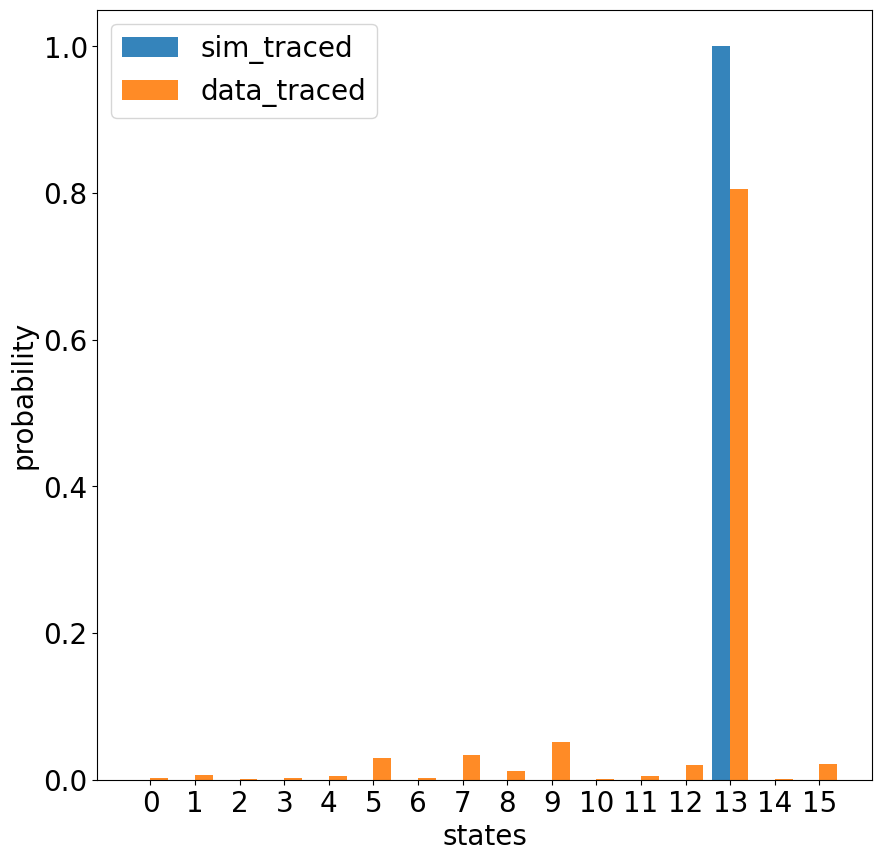

2024-02-23-160148_Line_002.txt
counts: [23, 3, 18, 64, 5, 43, 47, 1425, 4, 8, 2, 10, 54, 109, 10, 175]
counts_ibm_mapping_dic: {'0000': 23, '1000': 3, '0100': 18, '1100': 64, '0010': 5, '1010': 43, '0110': 47, '1110': 1425, '0001': 4, '1001': 8, '0101': 2, '1101': 10, '0011': 54, '1011': 109, '0111': 10, '1111': 175}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



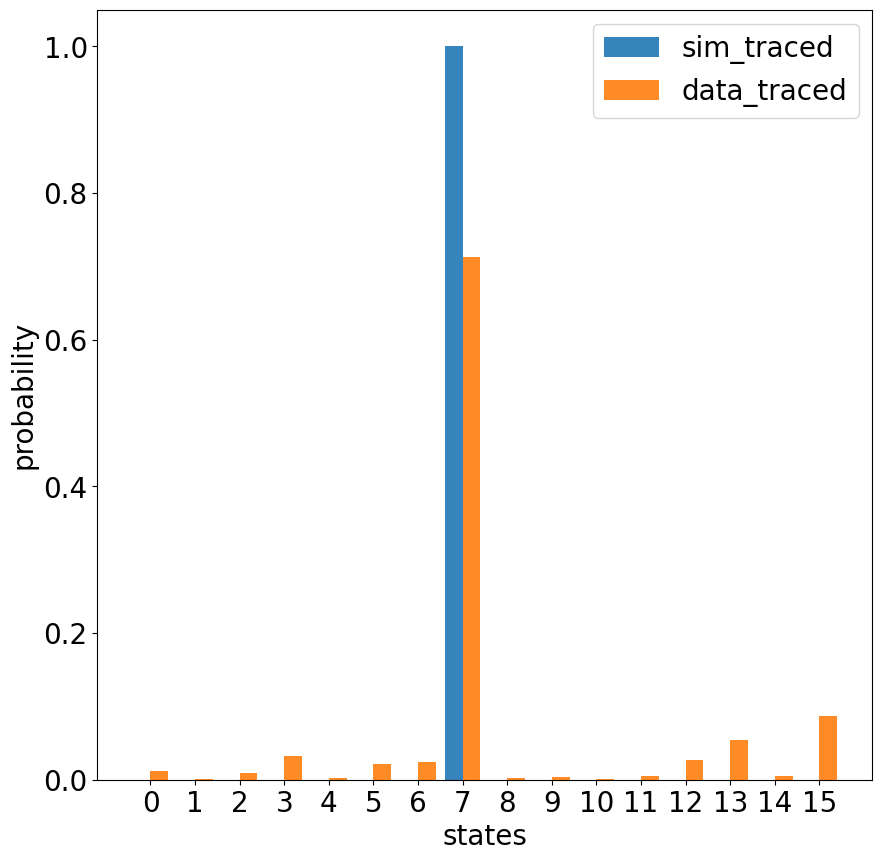

2024-02-23-160211_Line_003.txt
counts: [25, 100, 1, 4, 42, 1656, 1, 42, 2, 10, 2, 5, 11, 71, 4, 24]
counts_ibm_mapping_dic: {'0000': 25, '1000': 100, '0100': 1, '1100': 4, '0010': 42, '1010': 1656, '0110': 1, '1110': 42, '0001': 2, '1001': 10, '0101': 2, '1101': 5, '0011': 11, '1011': 71, '0111': 4, '1111': 24}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



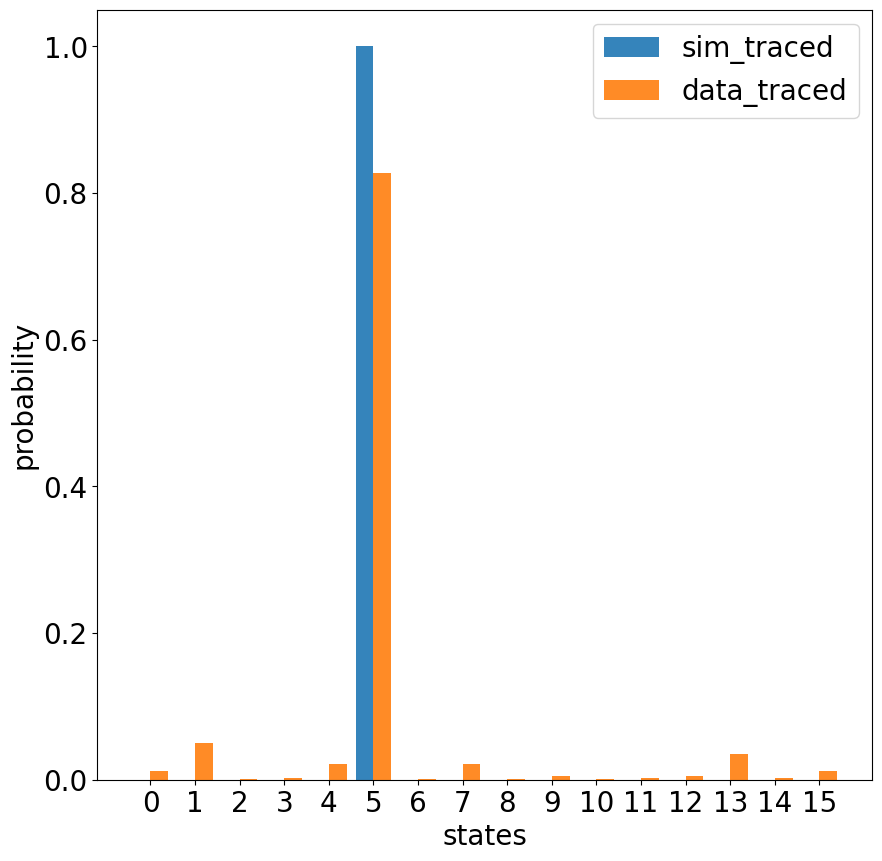

2024-02-23-160235_Line_004.txt
counts: [6, 33, 3, 97, 3, 5, 3, 22, 10, 61, 49, 1509, 30, 7, 24, 138]
counts_ibm_mapping_dic: {'0000': 6, '1000': 33, '0100': 3, '1100': 97, '0010': 3, '1010': 5, '0110': 3, '1110': 22, '0001': 10, '1001': 61, '0101': 49, '1101': 1509, '0011': 30, '1011': 7, '0111': 24, '1111': 138}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



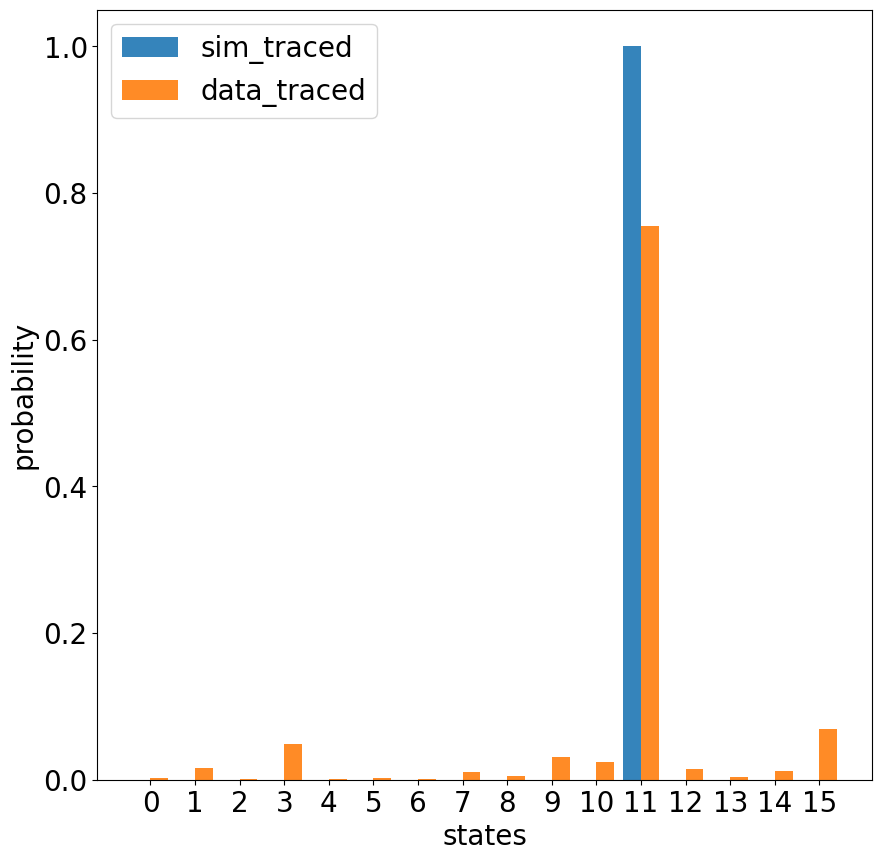

2024-02-23-160258_Line_005.txt
counts: [204, 23, 7, 35, 1570, 36, 26, 12, 18, 4, 6, 5, 35, 6, 10, 3]
counts_ibm_mapping_dic: {'0000': 204, '1000': 23, '0100': 7, '1100': 35, '0010': 1570, '1010': 36, '0110': 26, '1110': 12, '0001': 18, '1001': 4, '0101': 6, '1101': 5, '0011': 35, '1011': 6, '0111': 10, '1111': 3}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



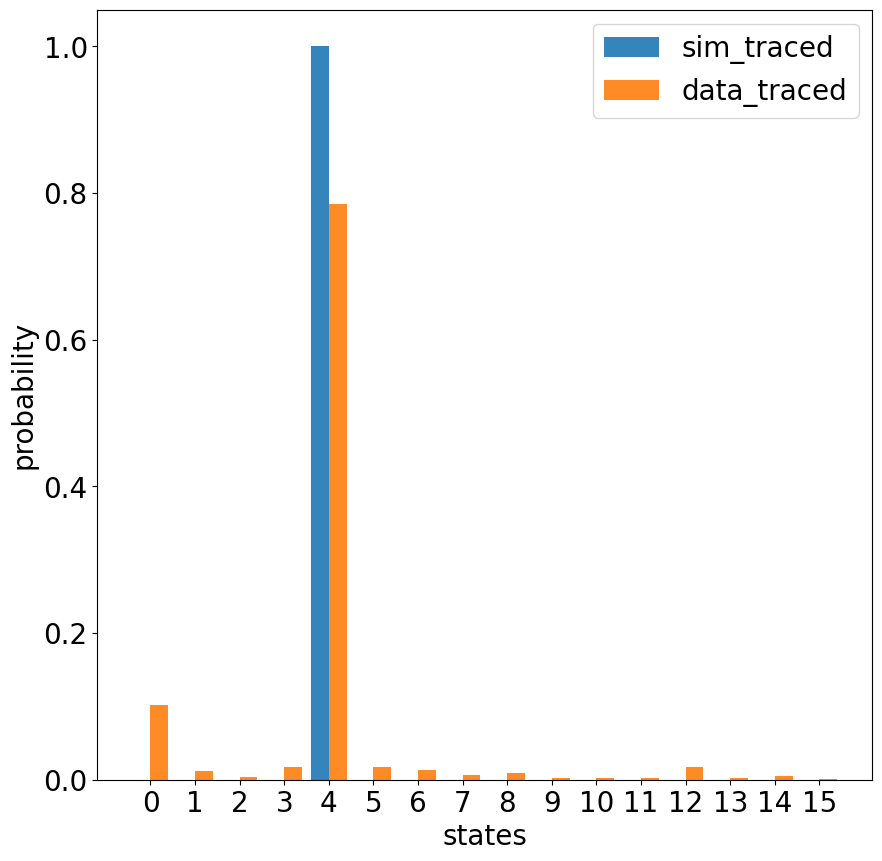

2024-02-23-160417_Line_006.txt
counts: [4, 9, 18, 5, 3, 70, 23, 23, 19, 94, 13, 4, 50, 1591, 32, 42]
counts_ibm_mapping_dic: {'0000': 4, '1000': 9, '0100': 18, '1100': 5, '0010': 3, '1010': 70, '0110': 23, '1110': 23, '0001': 19, '1001': 94, '0101': 13, '1101': 4, '0011': 50, '1011': 1591, '0111': 32, '1111': 42}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



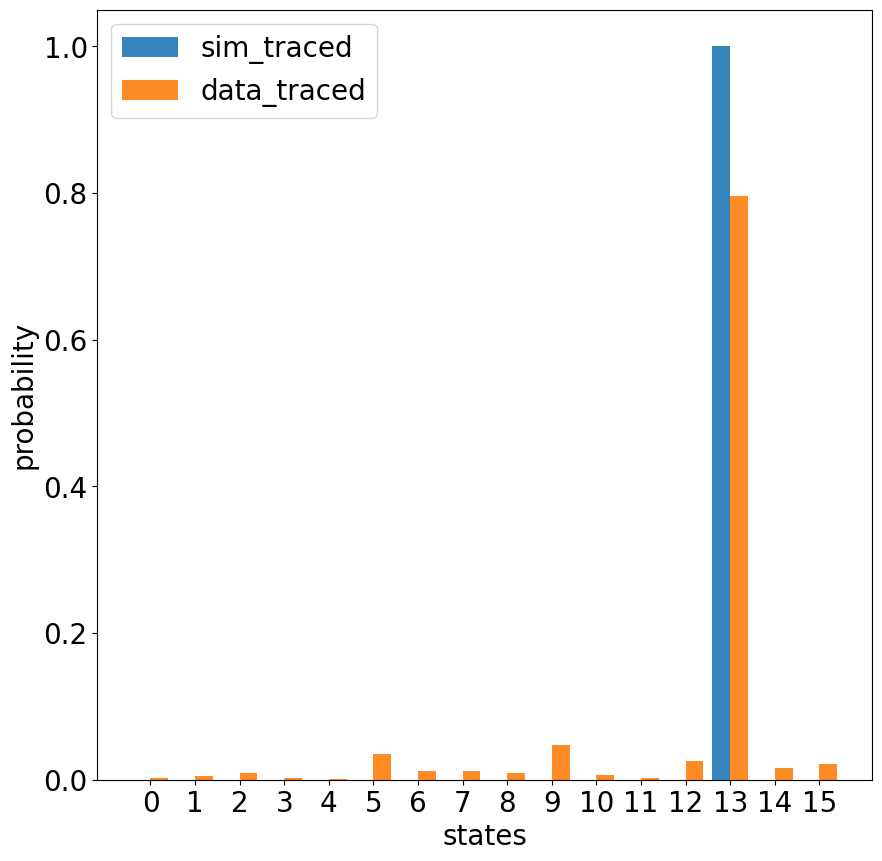

2024-02-23-160440_Line_007.txt
counts: [34, 1675, 20, 40, 28, 72, 13, 4, 4, 42, 16, 19, 3, 9, 19, 2]
counts_ibm_mapping_dic: {'0000': 34, '1000': 1675, '0100': 20, '1100': 40, '0010': 28, '1010': 72, '0110': 13, '1110': 4, '0001': 4, '1001': 42, '0101': 16, '1101': 19, '0011': 3, '1011': 9, '0111': 19, '1111': 2}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



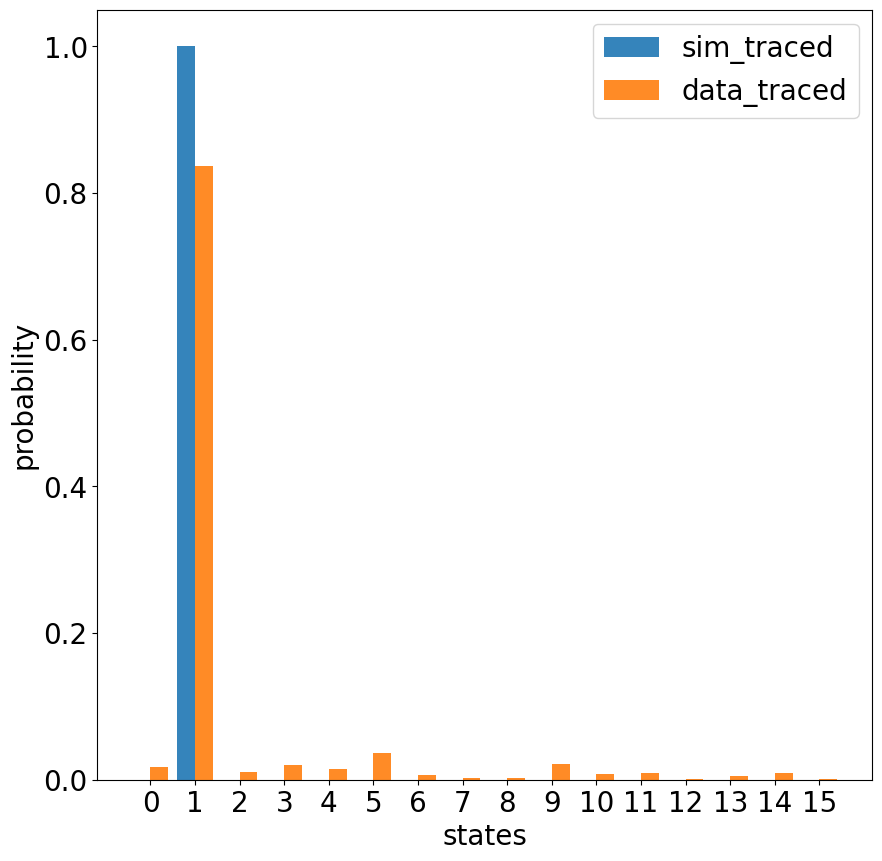

2024-02-23-160504_Line_008.txt
counts: [20, 98, 13, 39, 7, 10, 6, 10, 48, 1588, 3, 32, 37, 80, 5, 4]
counts_ibm_mapping_dic: {'0000': 20, '1000': 98, '0100': 13, '1100': 39, '0010': 7, '1010': 10, '0110': 6, '1110': 10, '0001': 48, '1001': 1588, '0101': 3, '1101': 32, '0011': 37, '1011': 80, '0111': 5, '1111': 4}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



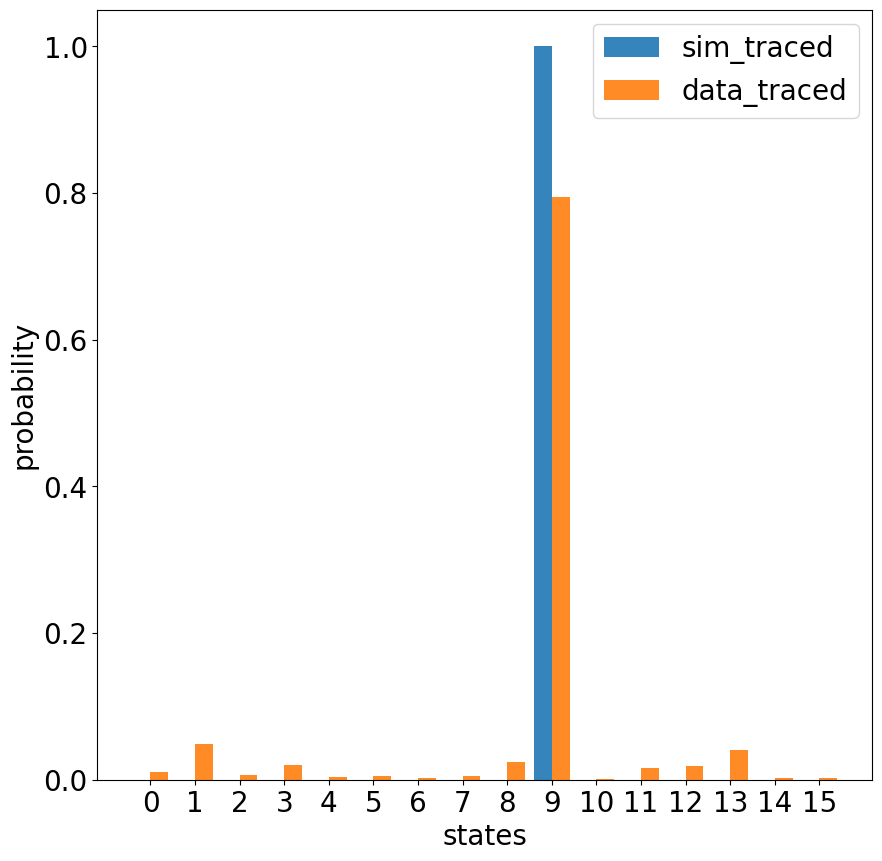

2024-02-23-160527_Line_009.txt
counts: [2, 4, 12, 6, 3, 74, 25, 71, 13, 75, 4, 4, 39, 1605, 15, 48]
counts_ibm_mapping_dic: {'0000': 2, '1000': 4, '0100': 12, '1100': 6, '0010': 3, '1010': 74, '0110': 25, '1110': 71, '0001': 13, '1001': 75, '0101': 4, '1101': 4, '0011': 39, '1011': 1605, '0111': 15, '1111': 48}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



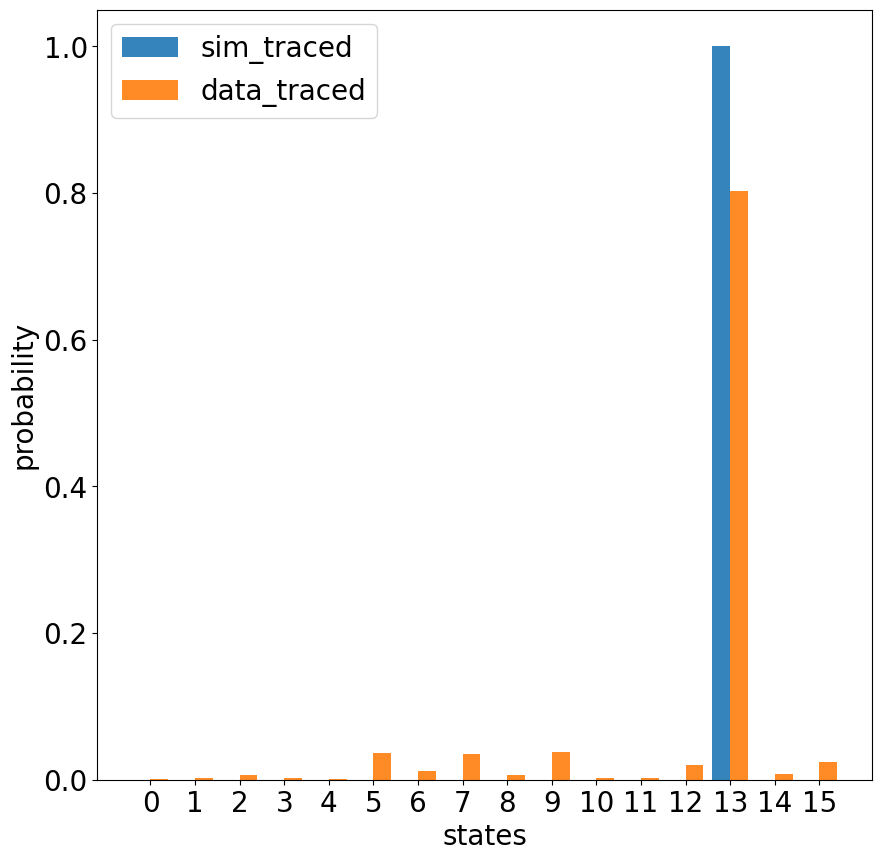

2024-02-23-160550_Line_010.txt
counts: [5, 104, 38, 44, 1, 53, 12, 5, 61, 1444, 15, 37, 20, 133, 20, 8]
counts_ibm_mapping_dic: {'0000': 5, '1000': 104, '0100': 38, '1100': 44, '0010': 1, '1010': 53, '0110': 12, '1110': 5, '0001': 61, '1001': 1444, '0101': 15, '1101': 37, '0011': 20, '1011': 133, '0111': 20, '1111': 8}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



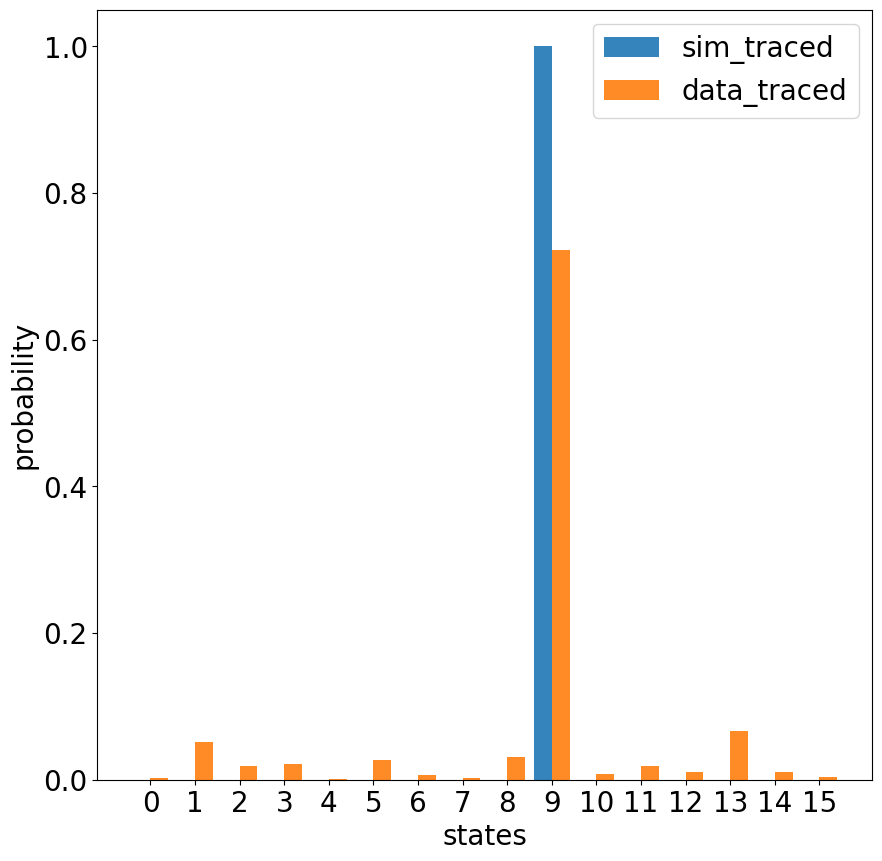

2024-02-23-202916_Line_011.txt
counts: [2, 1, 2, 11, 1, 30, 6, 127, 3, 6, 31, 113, 0, 43, 41, 1583]
counts_ibm_mapping_dic: {'0000': 2, '1000': 1, '0100': 2, '1100': 11, '0010': 1, '1010': 30, '0110': 6, '1110': 127, '0001': 3, '1001': 6, '0101': 31, '1101': 113, '0011': 0, '1011': 43, '0111': 41, '1111': 1583}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



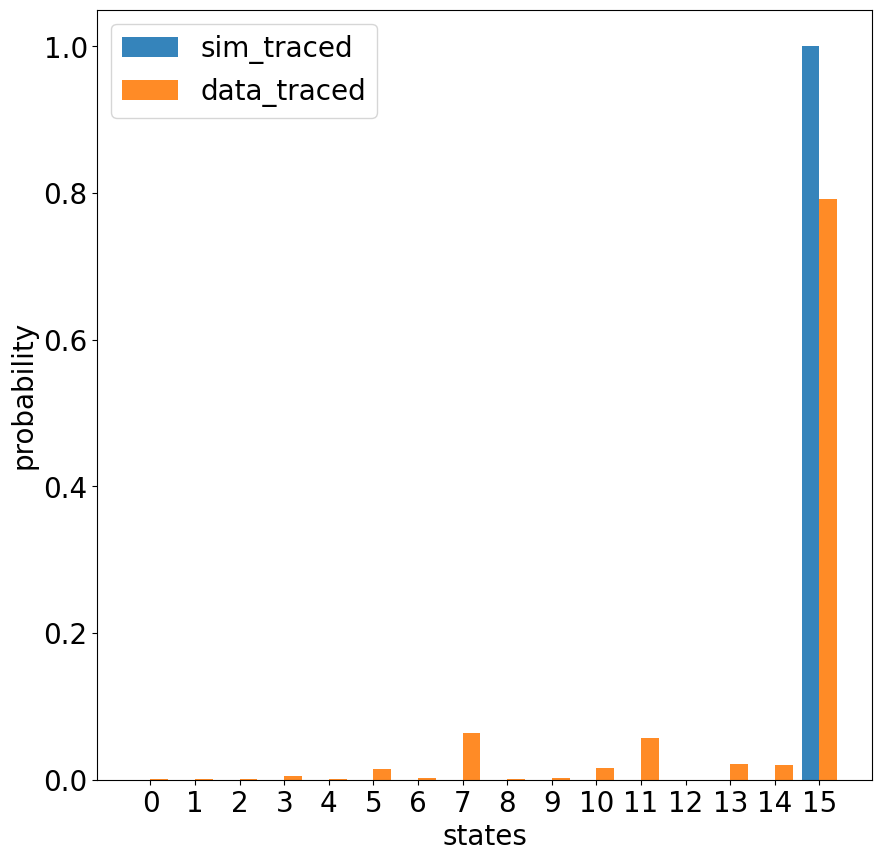

2024-02-23-202939_Line_012.txt
counts: [1508, 18, 45, 8, 183, 25, 4, 1, 103, 6, 22, 32, 31, 1, 10, 3]
counts_ibm_mapping_dic: {'0000': 1508, '1000': 18, '0100': 45, '1100': 8, '0010': 183, '1010': 25, '0110': 4, '1110': 1, '0001': 103, '1001': 6, '0101': 22, '1101': 32, '0011': 31, '1011': 1, '0111': 10, '1111': 3}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



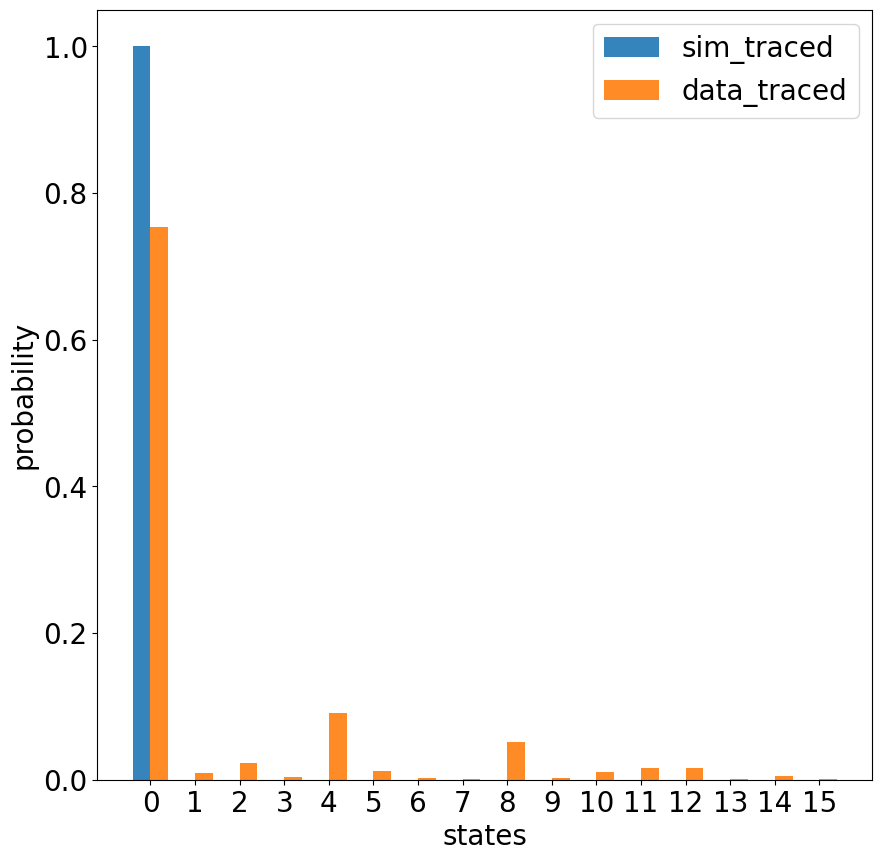

2024-02-23-203003_Line_013.txt
counts: [3, 11, 31, 4, 30, 15, 89, 2, 2, 18, 144, 44, 34, 15, 1529, 29]
counts_ibm_mapping_dic: {'0000': 3, '1000': 11, '0100': 31, '1100': 4, '0010': 30, '1010': 15, '0110': 89, '1110': 2, '0001': 2, '1001': 18, '0101': 144, '1101': 44, '0011': 34, '1011': 15, '0111': 1529, '1111': 29}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



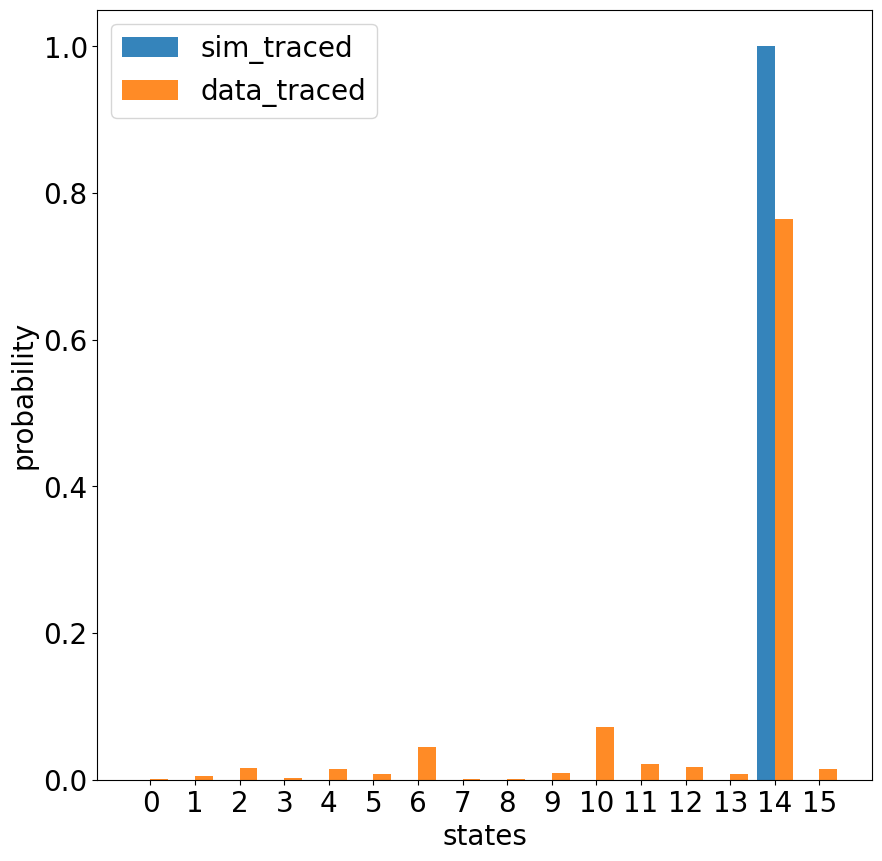

2024-02-23-203026_Line_014.txt
counts: [1558, 37, 58, 6, 147, 23, 7, 1, 66, 3, 16, 41, 24, 1, 8, 4]
counts_ibm_mapping_dic: {'0000': 1558, '1000': 37, '0100': 58, '1100': 6, '0010': 147, '1010': 23, '0110': 7, '1110': 1, '0001': 66, '1001': 3, '0101': 16, '1101': 41, '0011': 24, '1011': 1, '0111': 8, '1111': 4}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



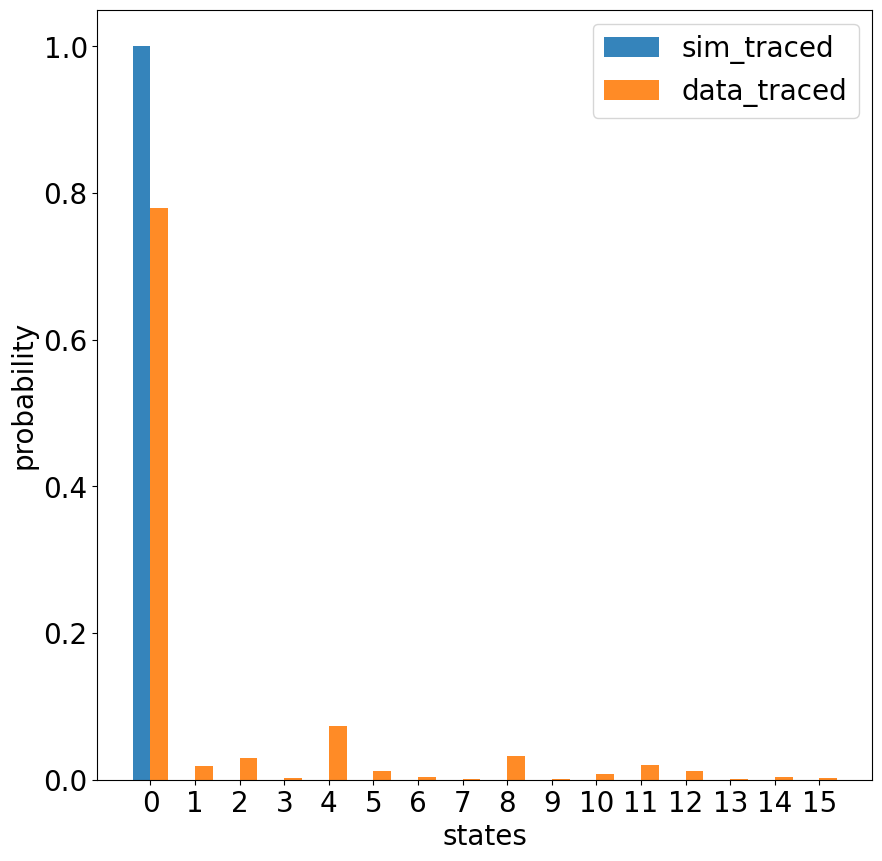

2024-02-23-203049_Line_015.txt
counts: [10, 0, 11, 8, 62, 4, 62, 27, 125, 29, 3, 2, 1591, 29, 33, 4]
counts_ibm_mapping_dic: {'0000': 10, '1000': 0, '0100': 11, '1100': 8, '0010': 62, '1010': 4, '0110': 62, '1110': 27, '0001': 125, '1001': 29, '0101': 3, '1101': 2, '0011': 1591, '1011': 29, '0111': 33, '1111': 4}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



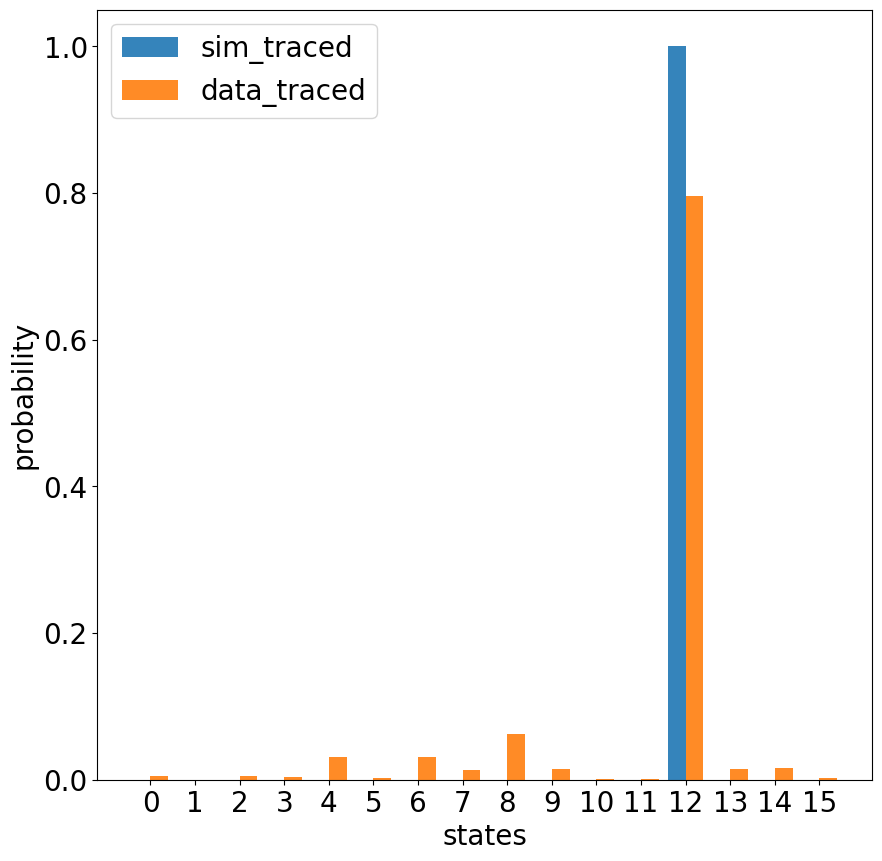

2024-02-23-203207_Line_016.txt
counts: [1529, 27, 14, 5, 143, 28, 1, 32, 132, 4, 22, 39, 15, 4, 2, 3]
counts_ibm_mapping_dic: {'0000': 1529, '1000': 27, '0100': 14, '1100': 5, '0010': 143, '1010': 28, '0110': 1, '1110': 32, '0001': 132, '1001': 4, '0101': 22, '1101': 39, '0011': 15, '1011': 4, '0111': 2, '1111': 3}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



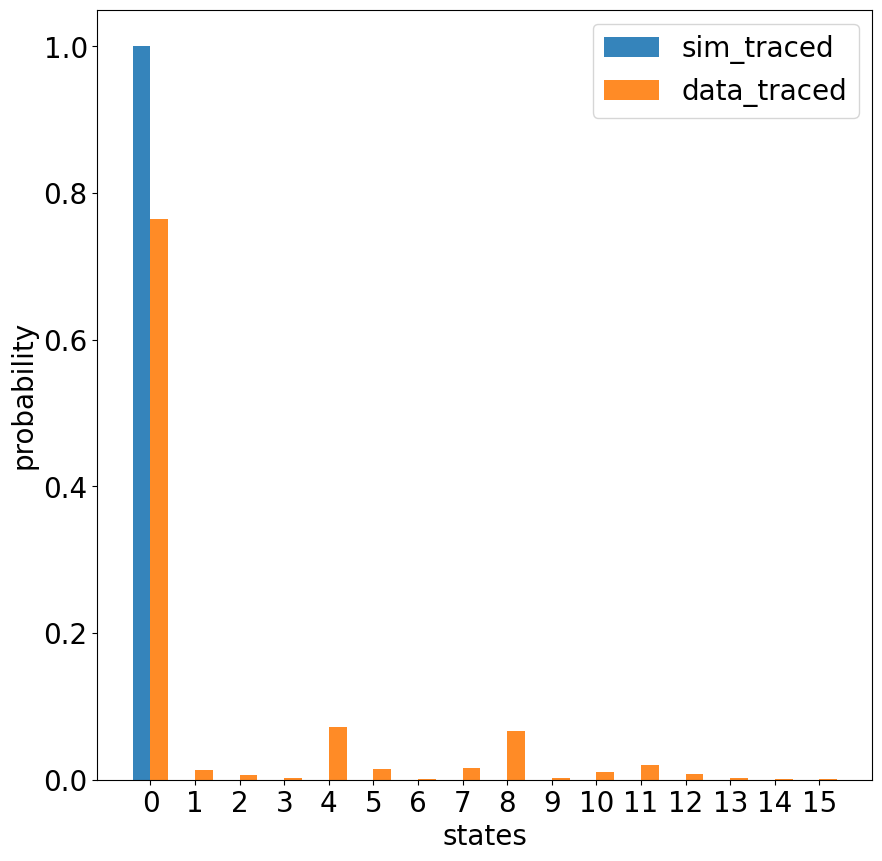

2024-02-23-203231_Line_017.txt
counts: [25, 44, 125, 3, 6, 3, 9, 2, 50, 21, 1472, 32, 4, 28, 147, 29]
counts_ibm_mapping_dic: {'0000': 25, '1000': 44, '0100': 125, '1100': 3, '0010': 6, '1010': 3, '0110': 9, '1110': 2, '0001': 50, '1001': 21, '0101': 1472, '1101': 32, '0011': 4, '1011': 28, '0111': 147, '1111': 29}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



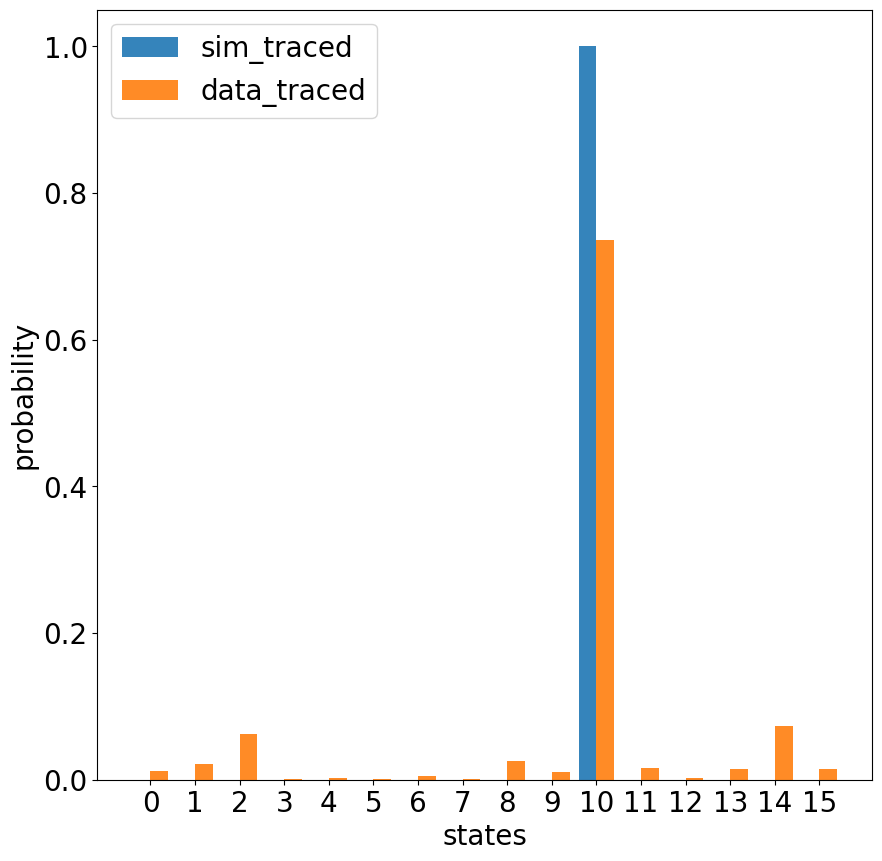

2024-02-23-203254_Line_018.txt
counts: [31, 113, 21, 6, 56, 1639, 5, 34, 1, 3, 5, 6, 12, 45, 4, 19]
counts_ibm_mapping_dic: {'0000': 31, '1000': 113, '0100': 21, '1100': 6, '0010': 56, '1010': 1639, '0110': 5, '1110': 34, '0001': 1, '1001': 3, '0101': 5, '1101': 6, '0011': 12, '1011': 45, '0111': 4, '1111': 19}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



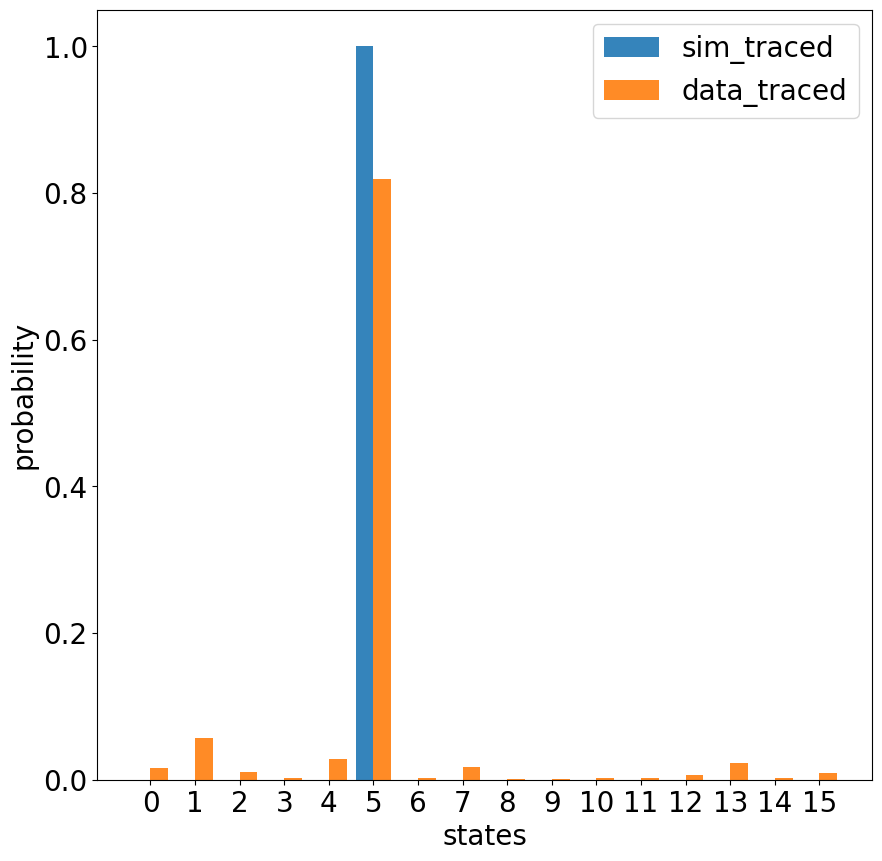

2024-02-23-203317_Line_019.txt
counts: [96, 2, 30, 39, 71, 5, 6, 11, 1443, 26, 26, 4, 191, 24, 3, 23]
counts_ibm_mapping_dic: {'0000': 96, '1000': 2, '0100': 30, '1100': 39, '0010': 71, '1010': 5, '0110': 6, '1110': 11, '0001': 1443, '1001': 26, '0101': 26, '1101': 4, '0011': 191, '1011': 24, '0111': 3, '1111': 23}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



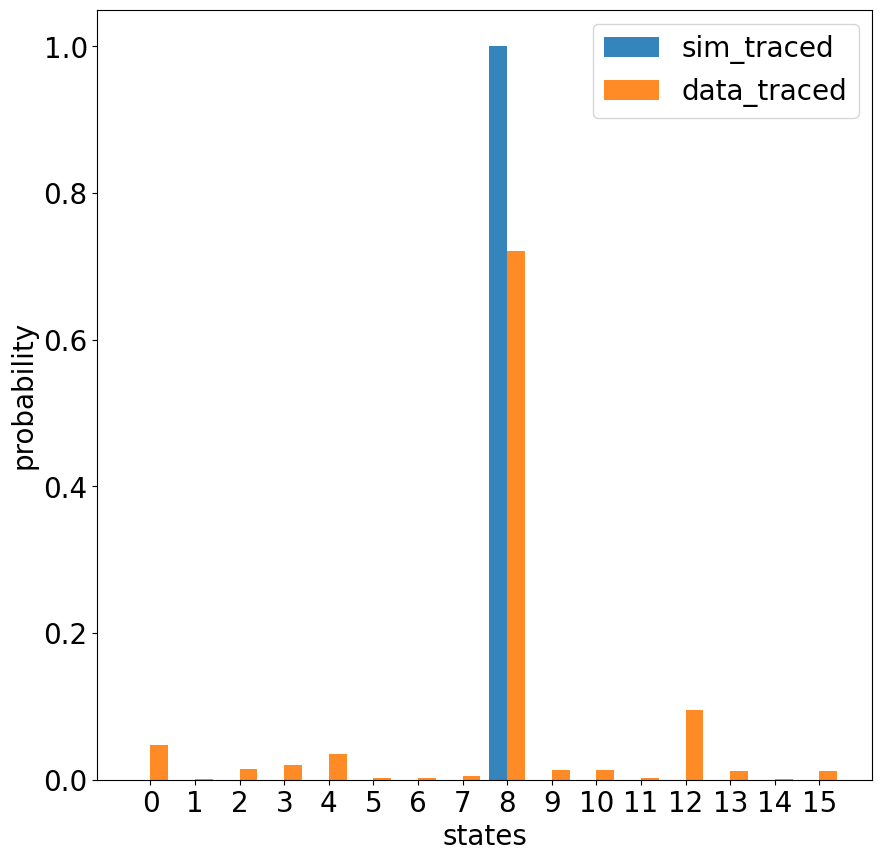

2024-02-23-203340_Line_020.txt
counts: [8, 23, 136, 17, 75, 4, 1379, 30, 6, 2, 16, 5, 115, 10, 171, 3]
counts_ibm_mapping_dic: {'0000': 8, '1000': 23, '0100': 136, '1100': 17, '0010': 75, '1010': 4, '0110': 1379, '1110': 30, '0001': 6, '1001': 2, '0101': 16, '1101': 5, '0011': 115, '1011': 10, '0111': 171, '1111': 3}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



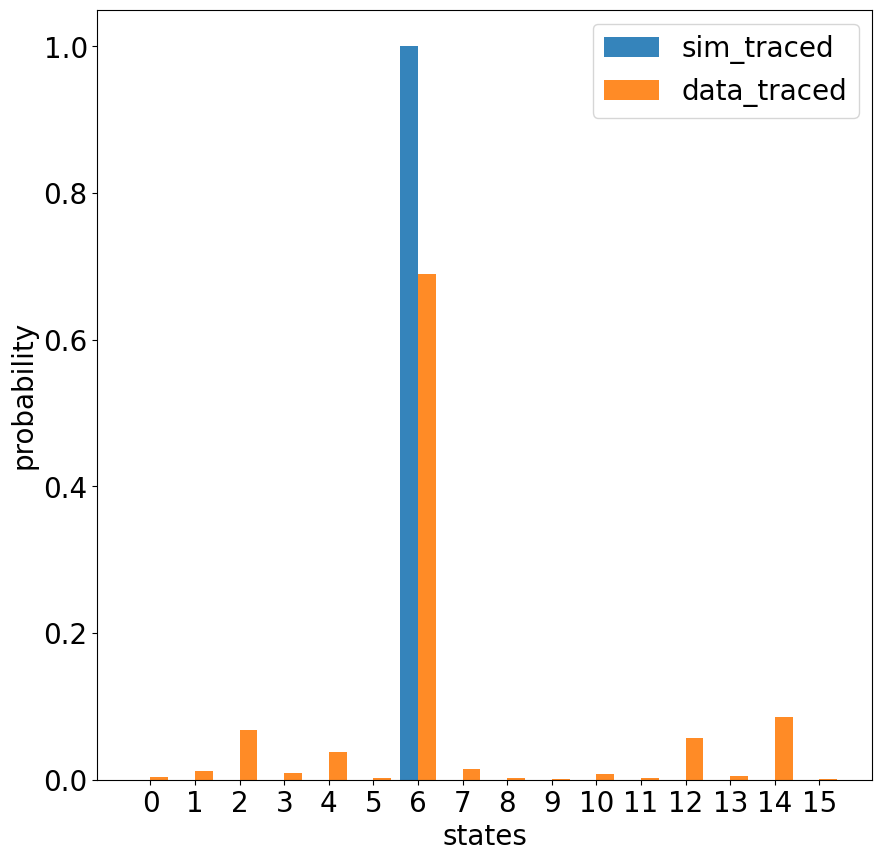

In [7]:
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
counts_d2_sim=[]
shots=2000
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d2.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
    # a_s=a
    # data_traced_spam=Trace_Out(a_s,[0,1,2,3])
    # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
    # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
    # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

#     a_0703.Import(paf_data_d2_0703+filenames_d2_0703[i],keep_file=True)
#     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])
    
#     a_rerun.Import(paf_data_d2_rerun+filenames_d2_rerun[i],keep_file=True)
#     data_rerun_traced=Trace_Out(a_rerun,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d2_sim.append(counts_ibm_mapping_dic_sim)
    
    
    # Display_States_Population(states=[b,a,a_s],label=["simulation","d=2","spam"])
    Display_States_Population(states=[sim_traced,data_traced,],label=["sim_traced","data_traced"])
# #       


['2024-02-23-160924_Line_001.txt', '2024-02-23-160951_Line_002.txt', '2024-02-23-161018_Line_003.txt', '2024-02-23-161045_Line_004.txt', '2024-02-23-161112_Line_005.txt', '2024-02-23-161235_Line_006.txt', '2024-02-23-162247_Line_007.txt', '2024-02-23-162315_Line_008.txt', '2024-02-23-162342_Line_009.txt', '2024-02-23-162409_Line_010.txt', '2024-02-23-205325_Line_011.txt', '2024-02-23-205352_Line_012.txt', '2024-02-23-205420_Line_013.txt', '2024-02-23-205447_Line_014.txt', '2024-02-23-205514_Line_015.txt', '2024-02-23-204846_Line_016.txt', '2024-02-23-204913_Line_017.txt', '2024-02-23-204940_Line_018.txt', '2024-02-23-205008_Line_019.txt', '2024-02-23-205036_Line_020.txt']
2024-02-23-160924_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:A

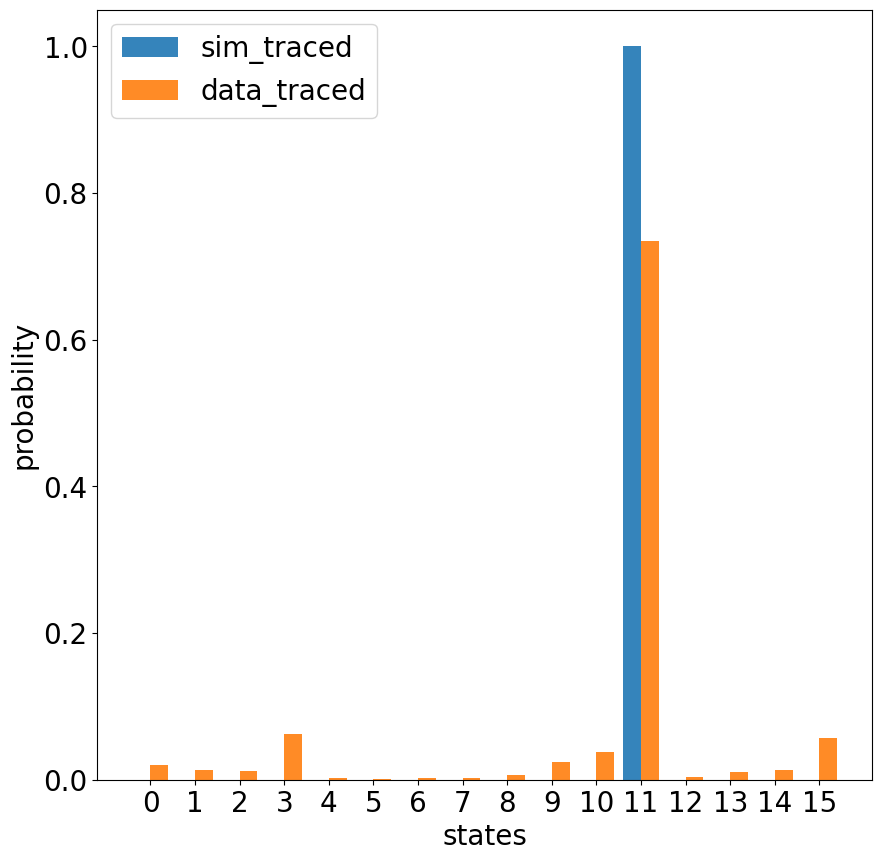

2024-02-23-160951_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



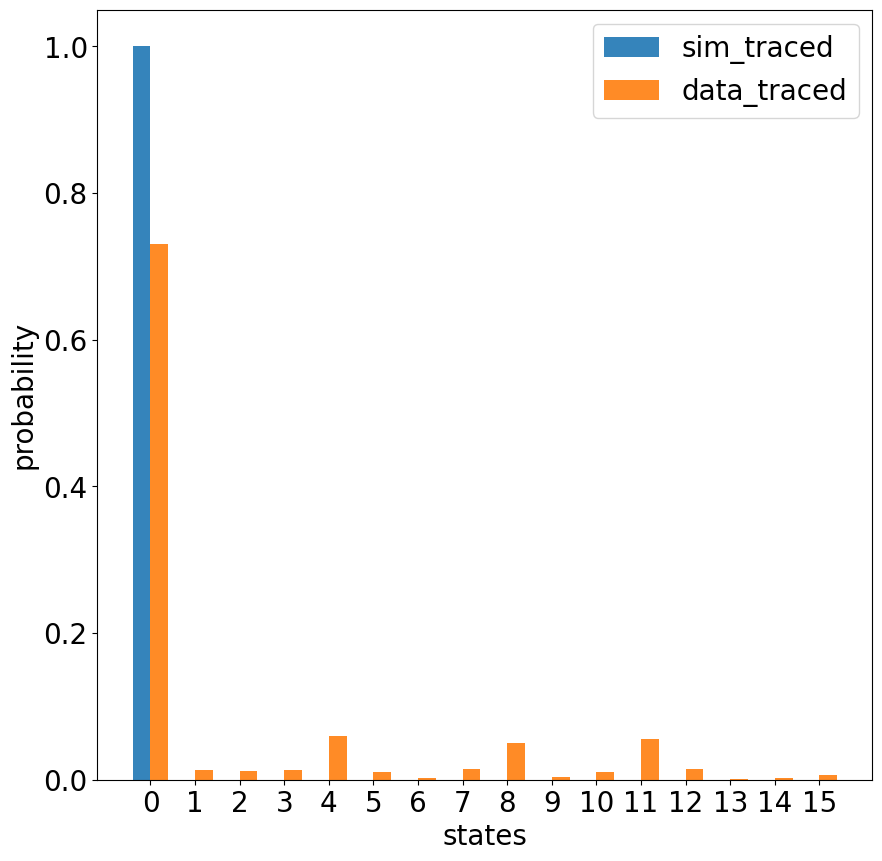

2024-02-23-161018_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



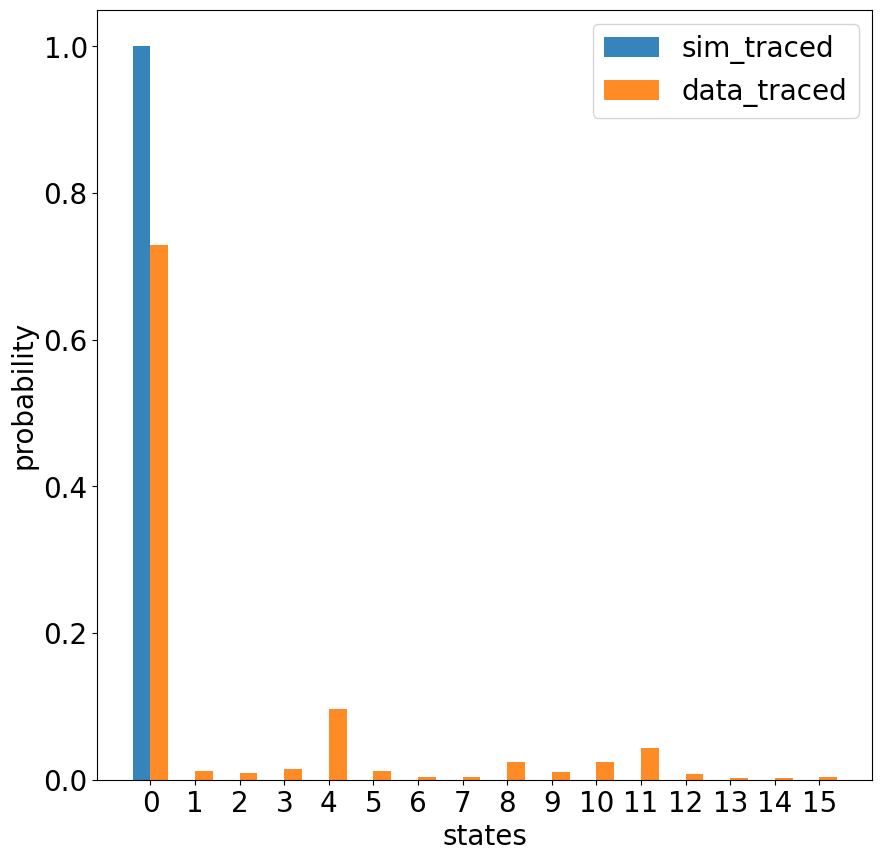

2024-02-23-161045_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



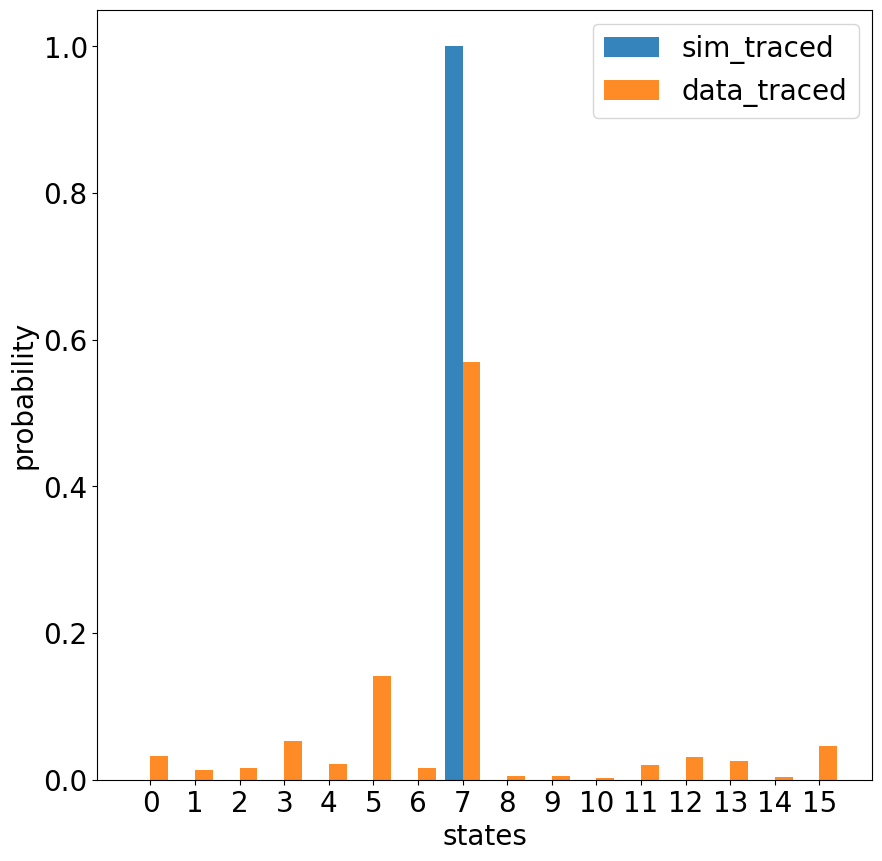

2024-02-23-161112_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



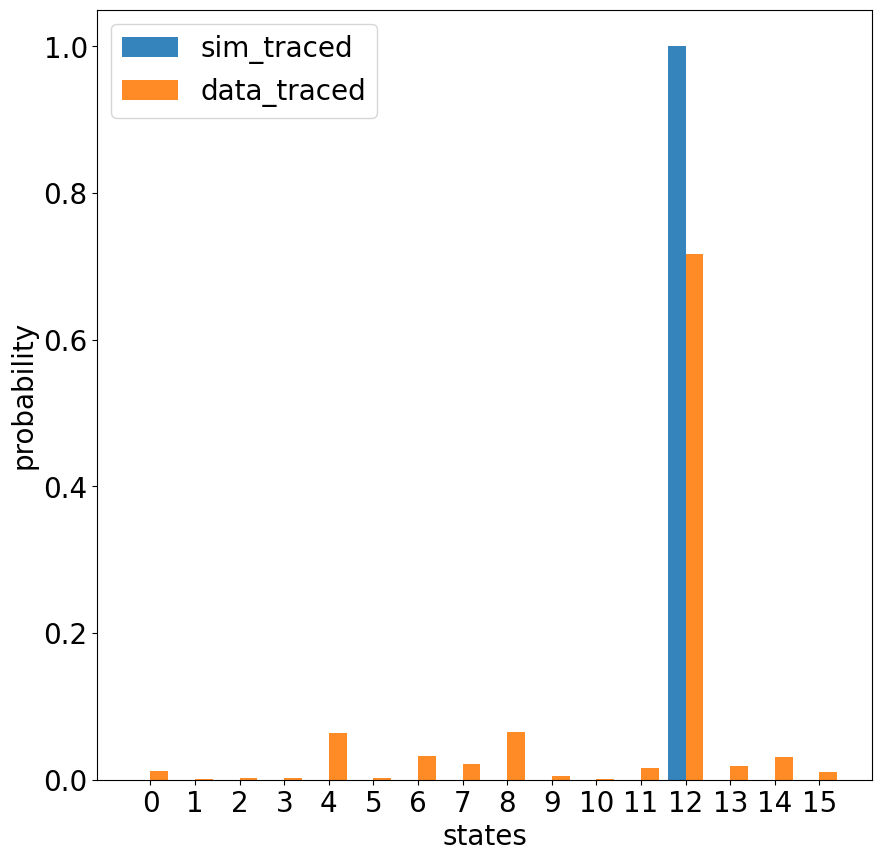

2024-02-23-161235_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



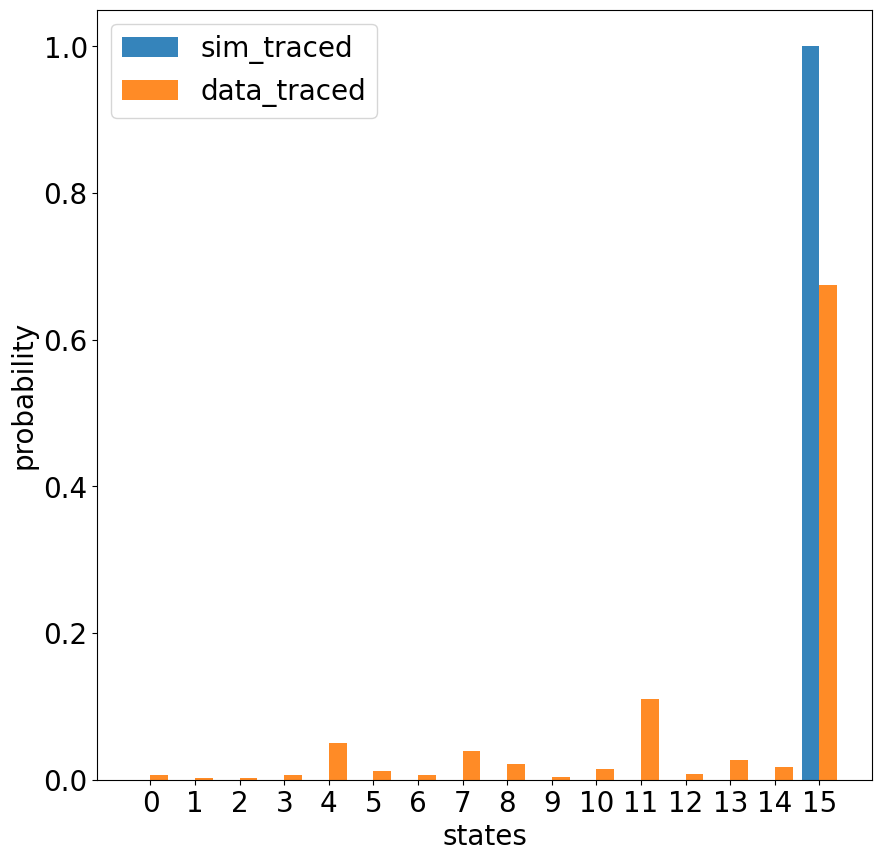

2024-02-23-162247_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



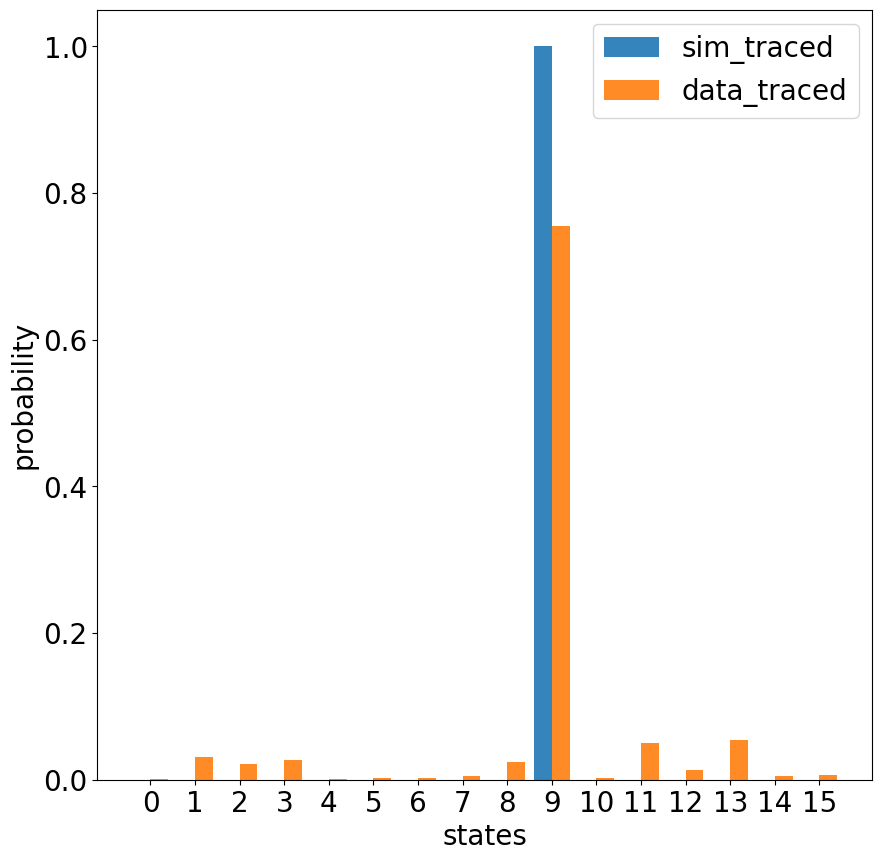

2024-02-23-162315_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



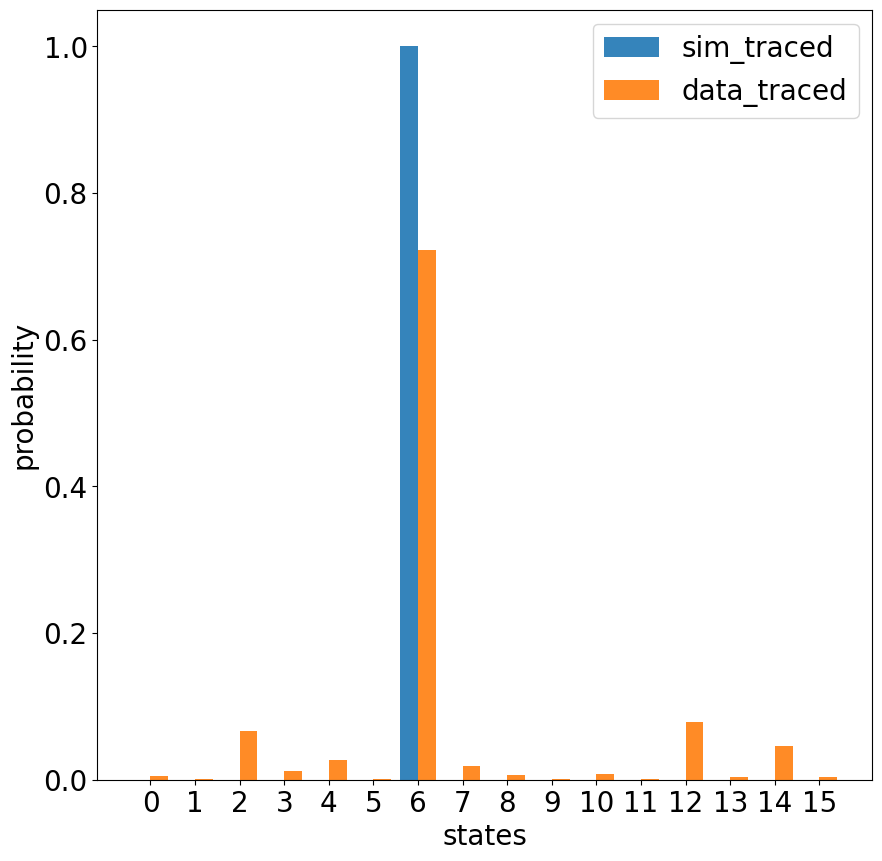

2024-02-23-162342_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



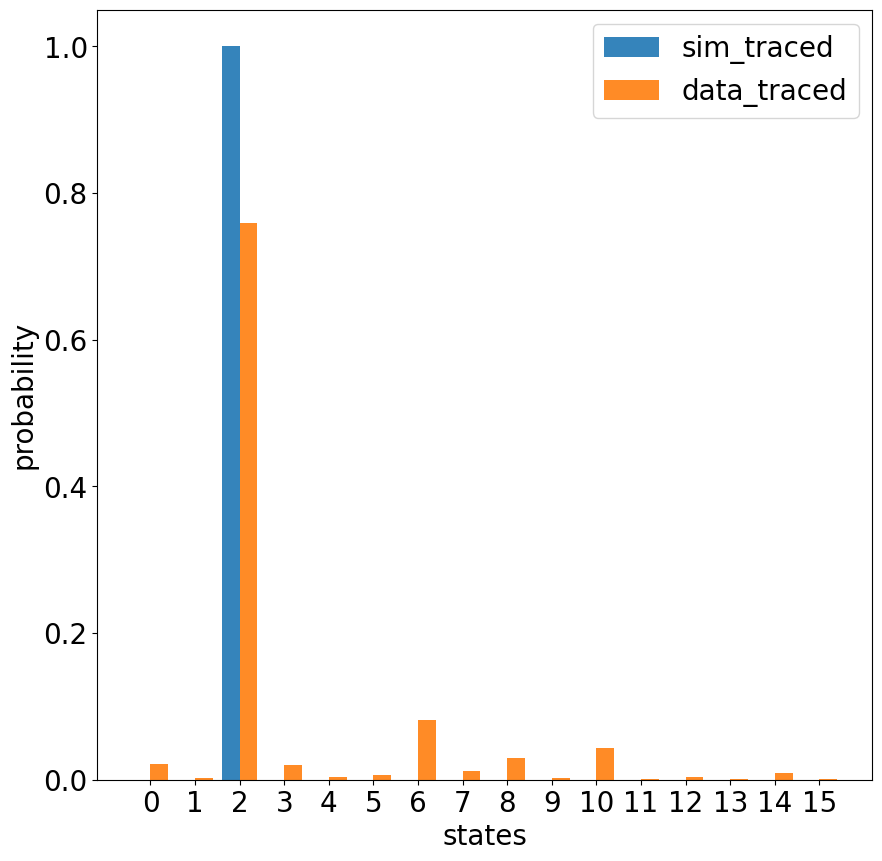

2024-02-23-162409_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



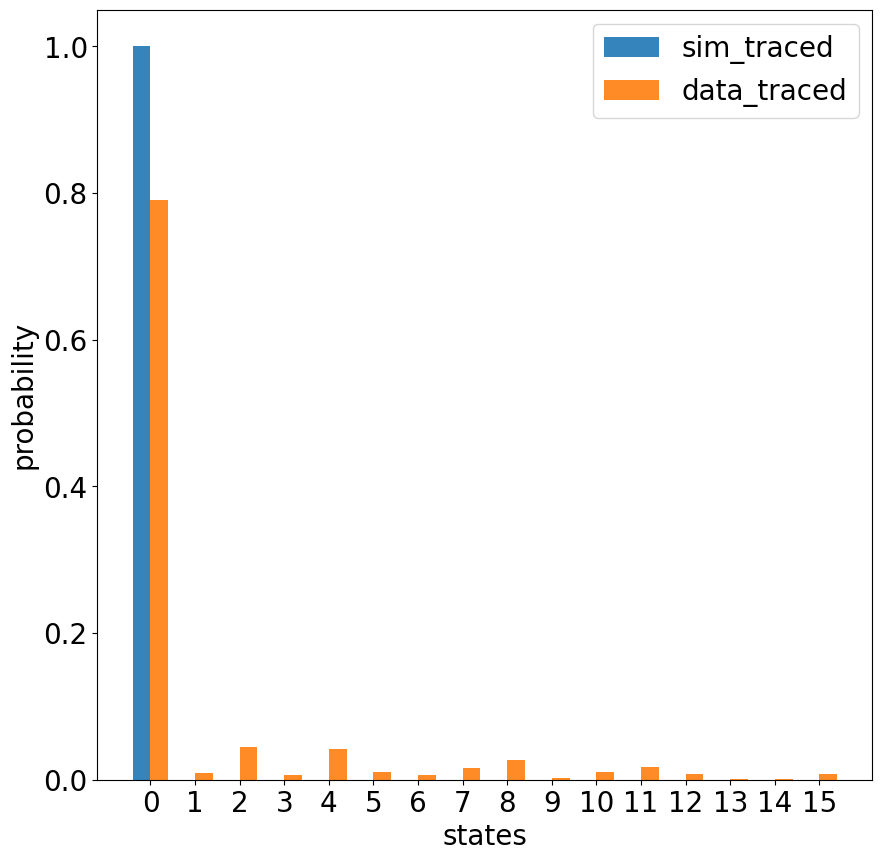

2024-02-23-205325_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



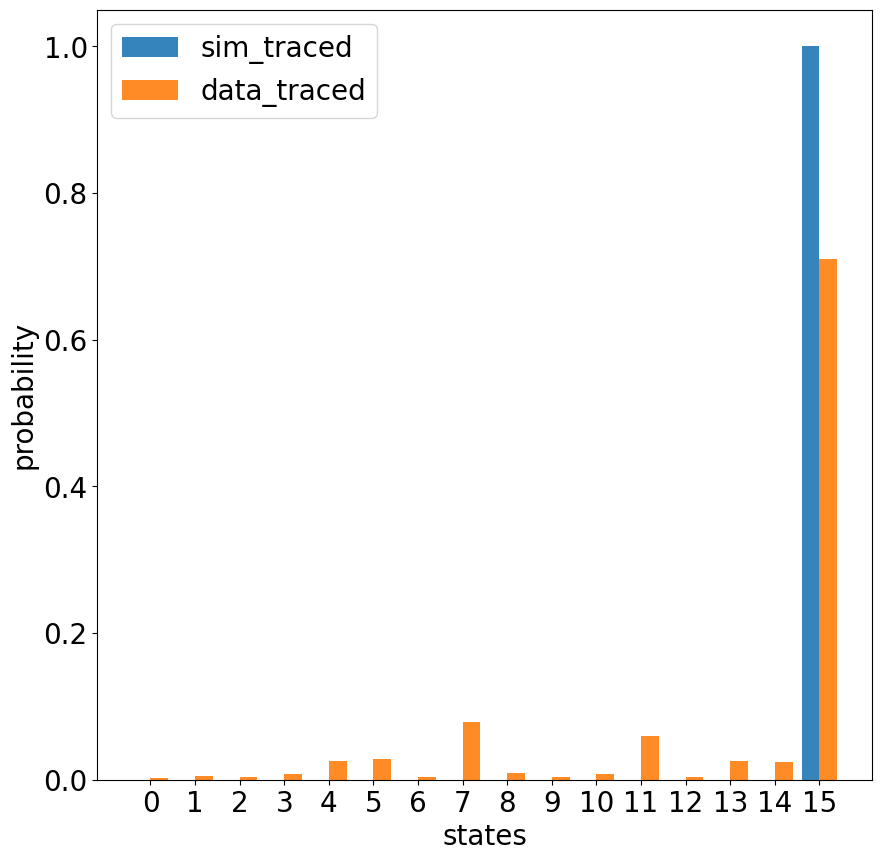

2024-02-23-205352_Line_012.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



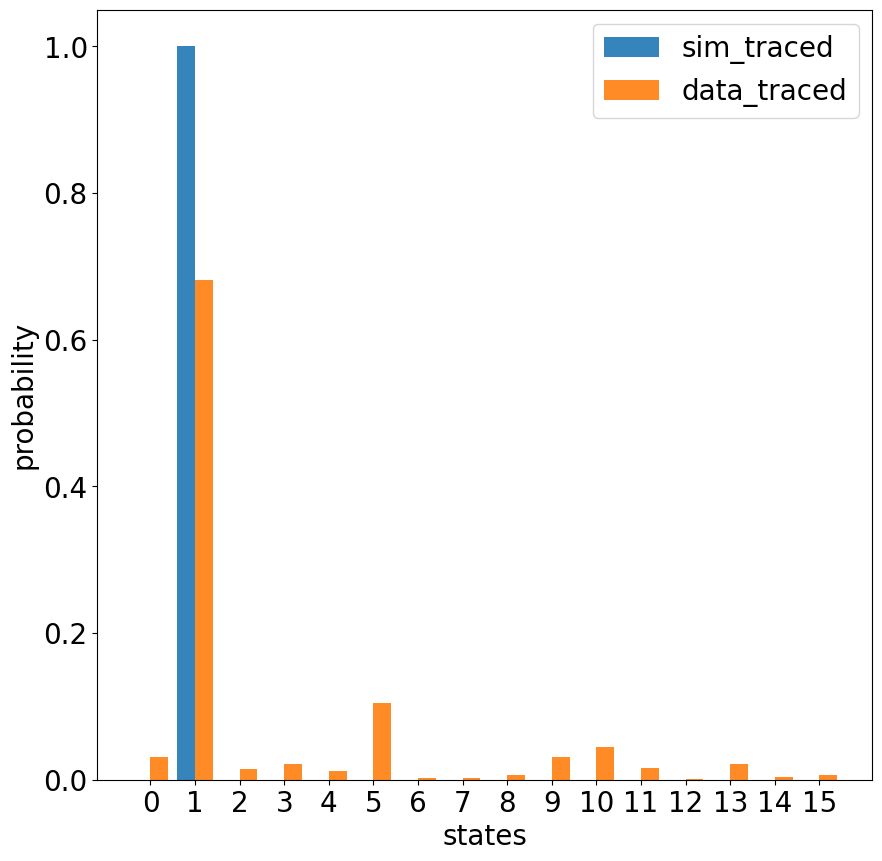

2024-02-23-205420_Line_013.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



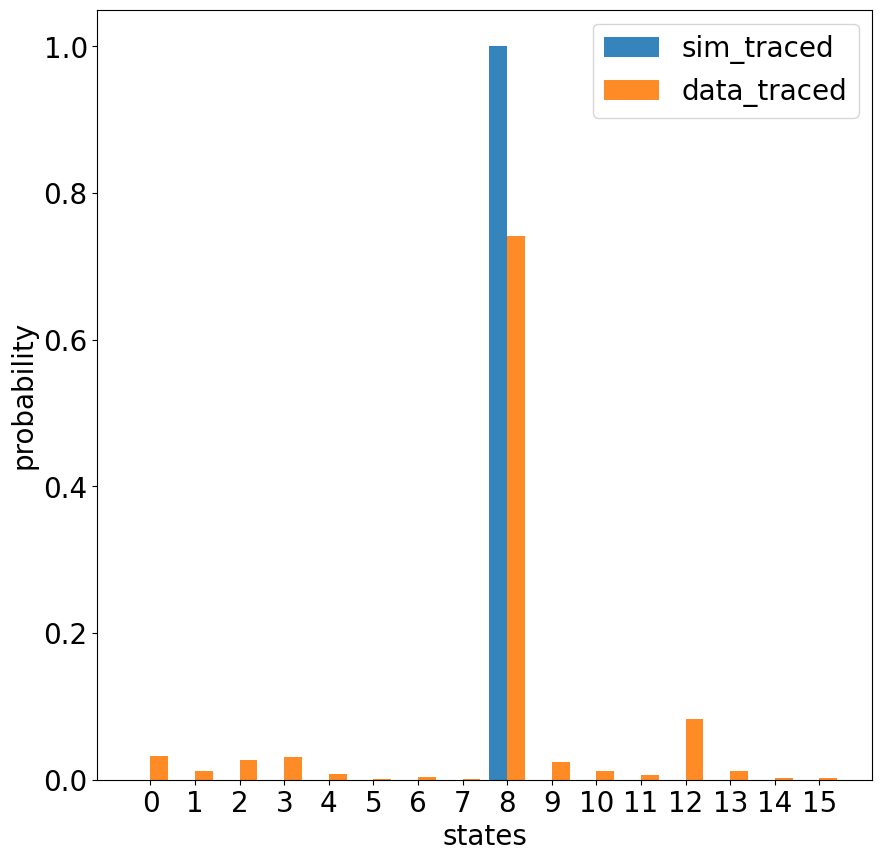

2024-02-23-205447_Line_014.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



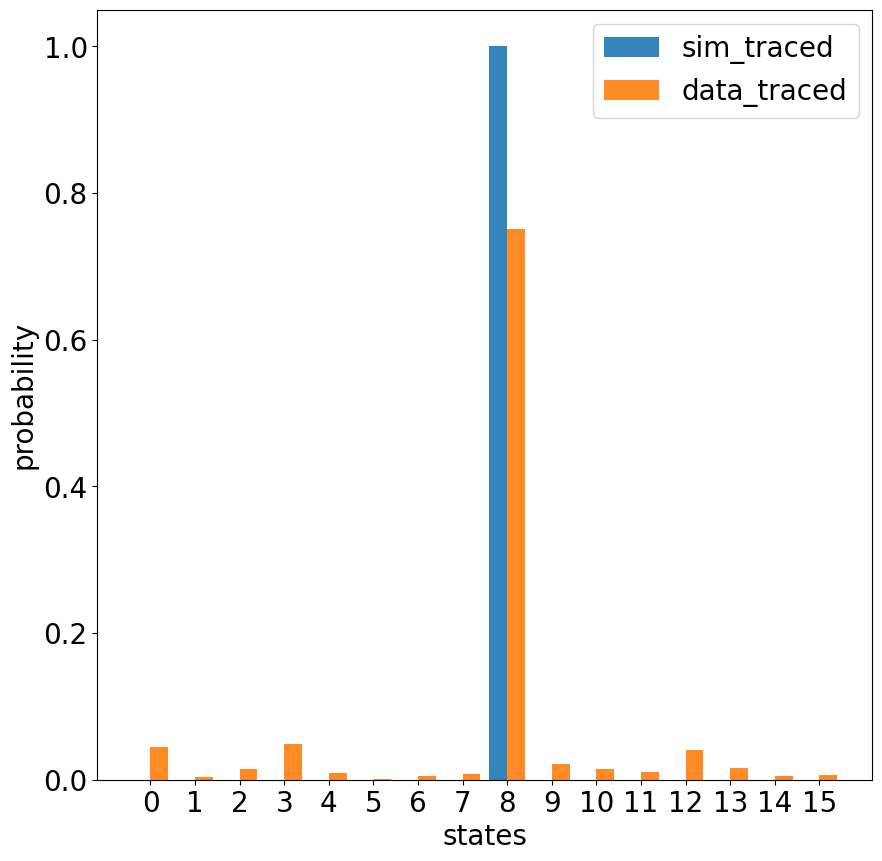

2024-02-23-205514_Line_015.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



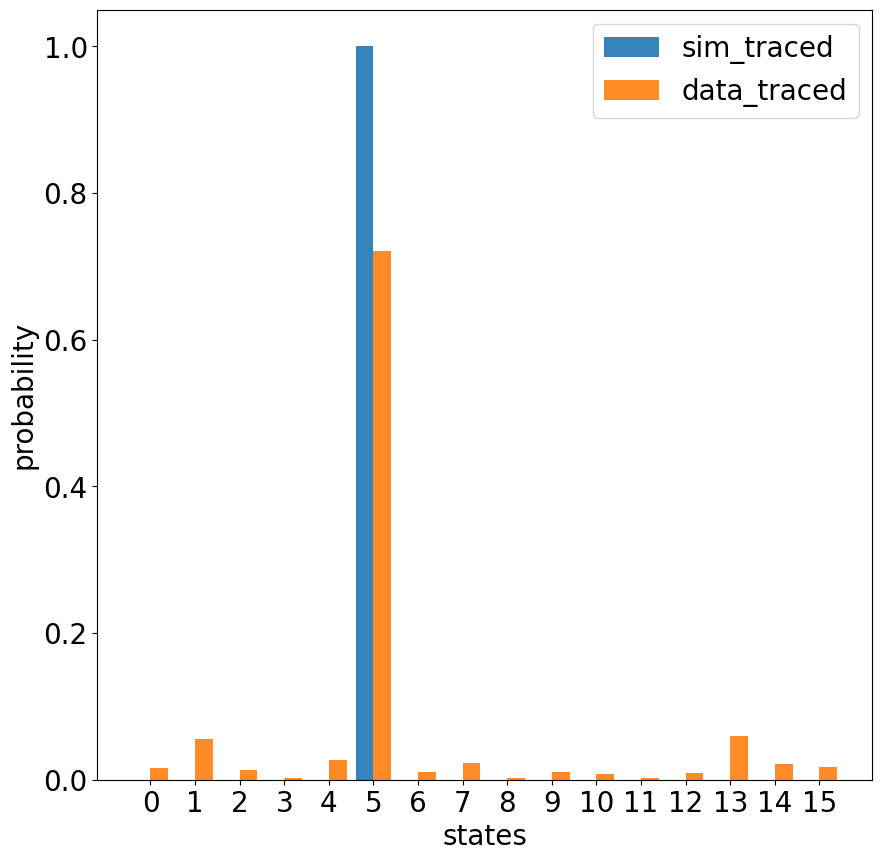

2024-02-23-204846_Line_016.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



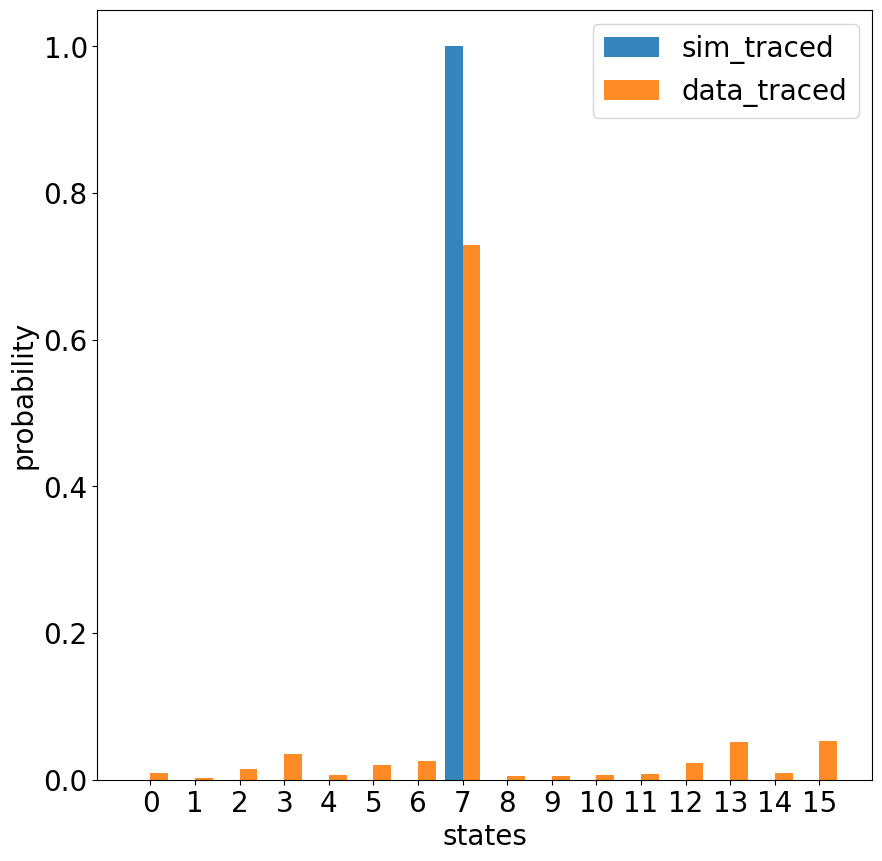

2024-02-23-204913_Line_017.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



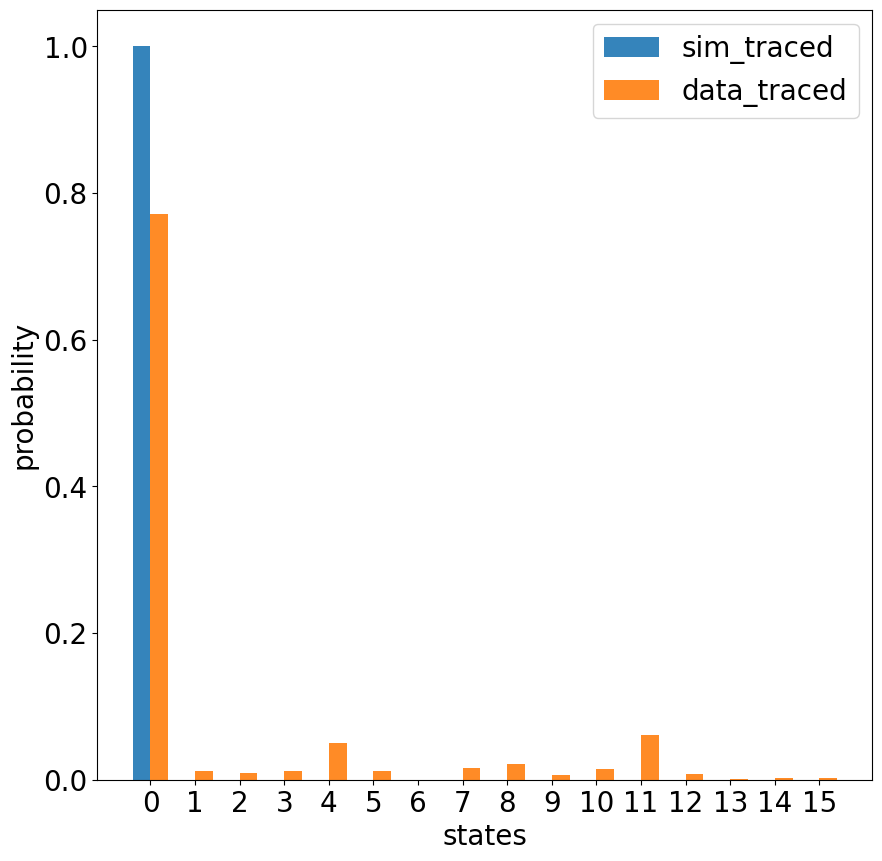

2024-02-23-204940_Line_018.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



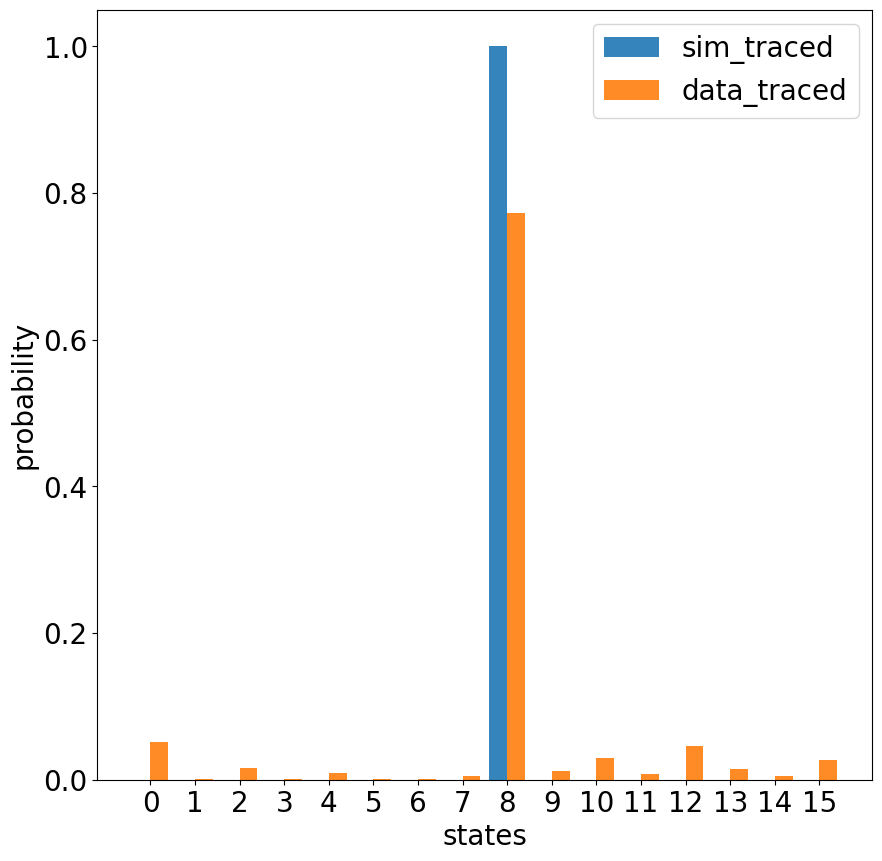

2024-02-23-205008_Line_019.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



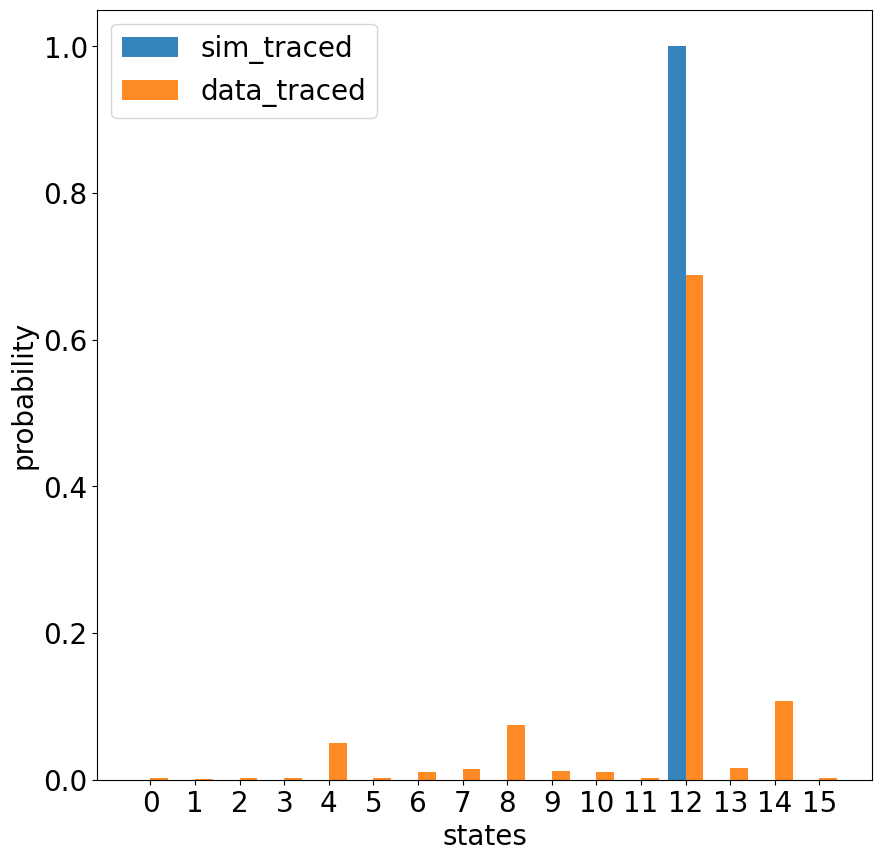

2024-02-23-205036_Line_020.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



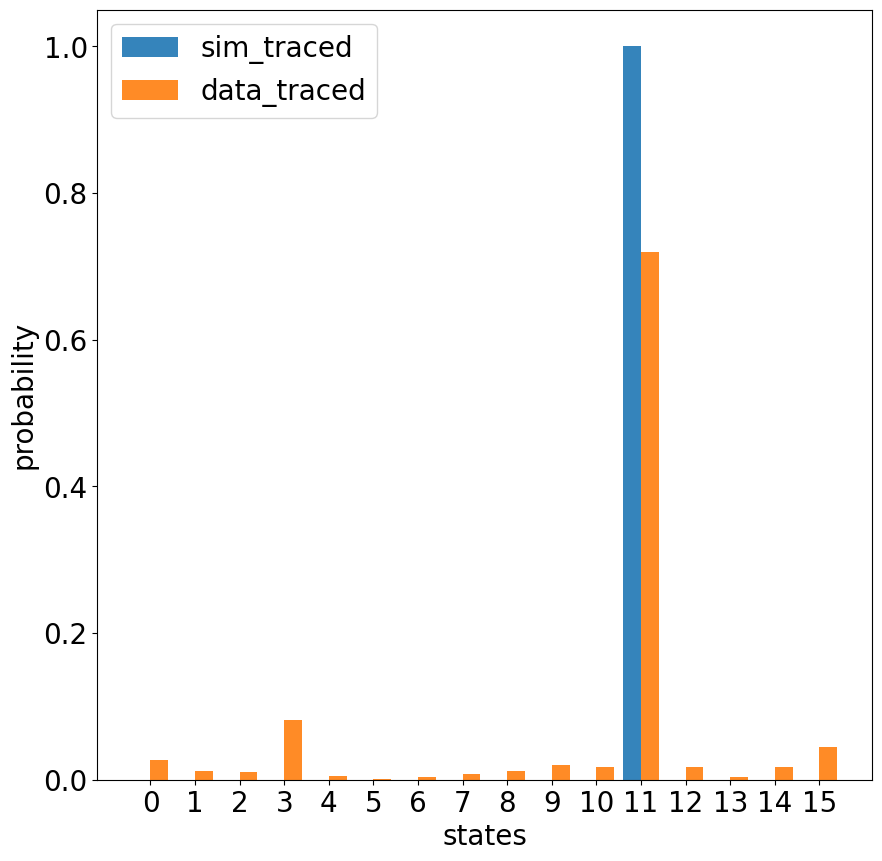

In [8]:
filenames_data=[]
counts_d4=[]
counts_d4_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d4.copy()
print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d4
circuit=c_d4
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d4.append(counts_ibm_mapping_dic)
    
    
#     a_s=spam1.Correct_SPAM(a)
#     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
#     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     counts_d4_spam.append(counts_ibm_mapping_dic_spam)
    
#     a_0703.Import(paf_data_d4_0703+filenames_d4_0703[i],keep_file=True)
#     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])

    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
#     Display_States_Population(states=[b,a,a_s],label=["simulation","d=4","spam"])
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])
# #         

2024-02-23-162616_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



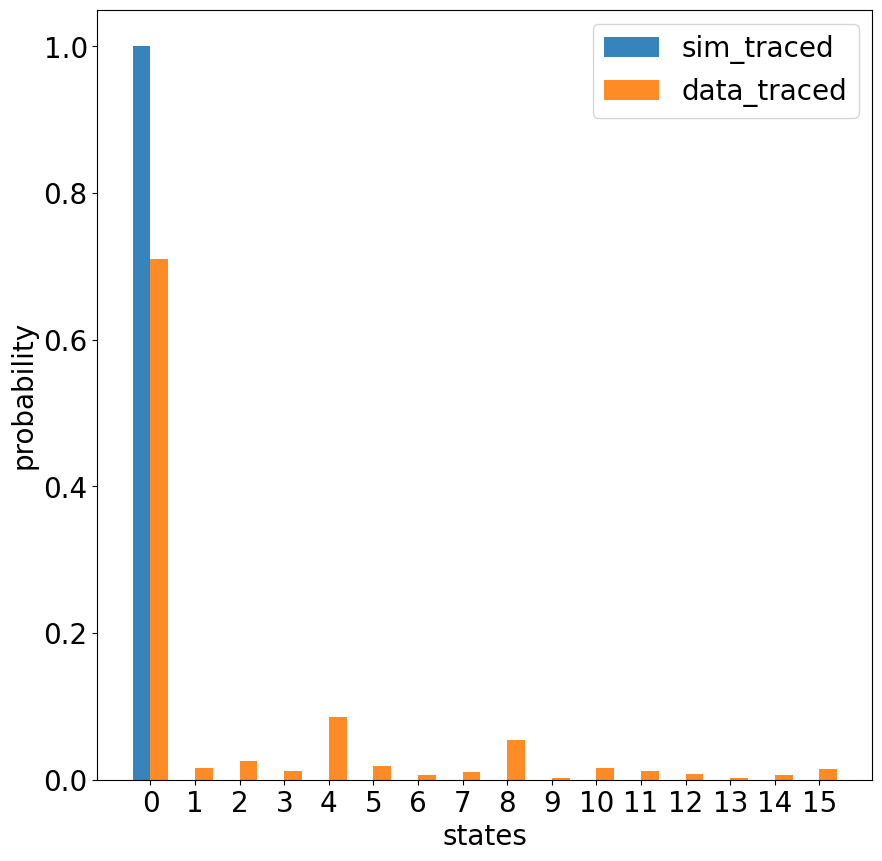

2024-02-23-162653_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



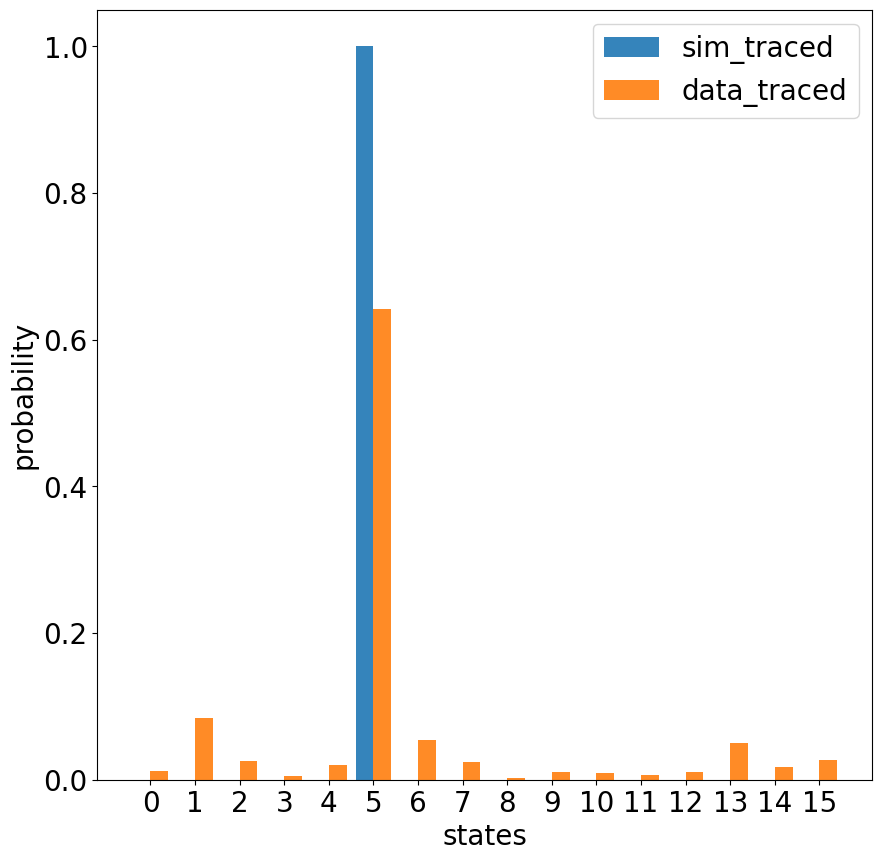

2024-02-23-162729_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



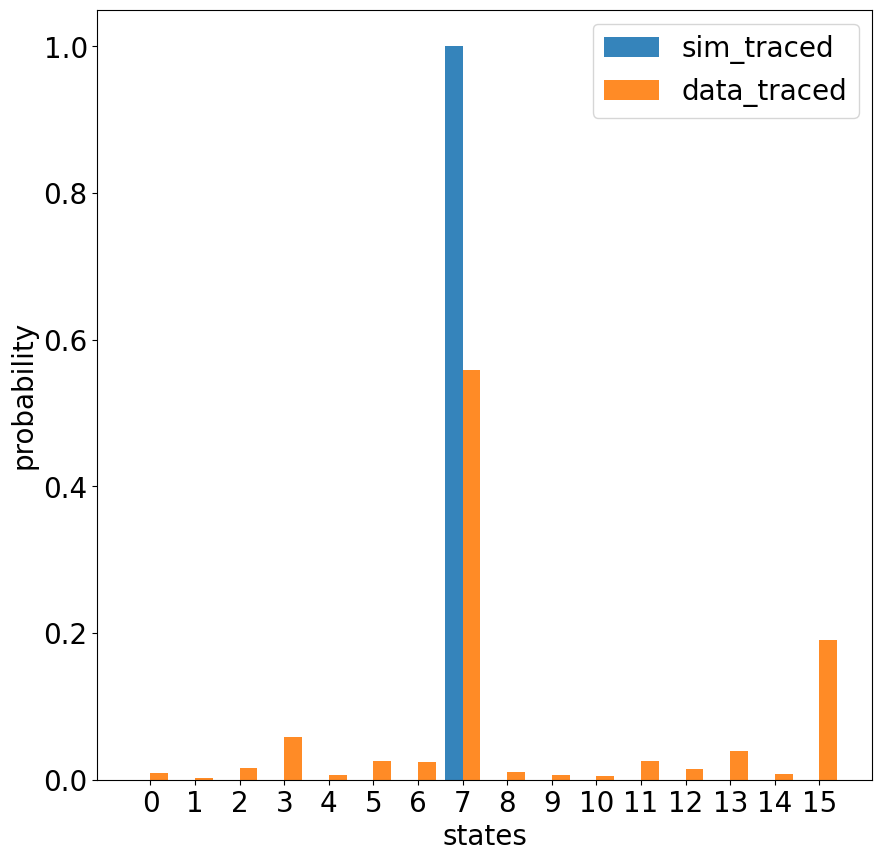

2024-02-23-162805_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



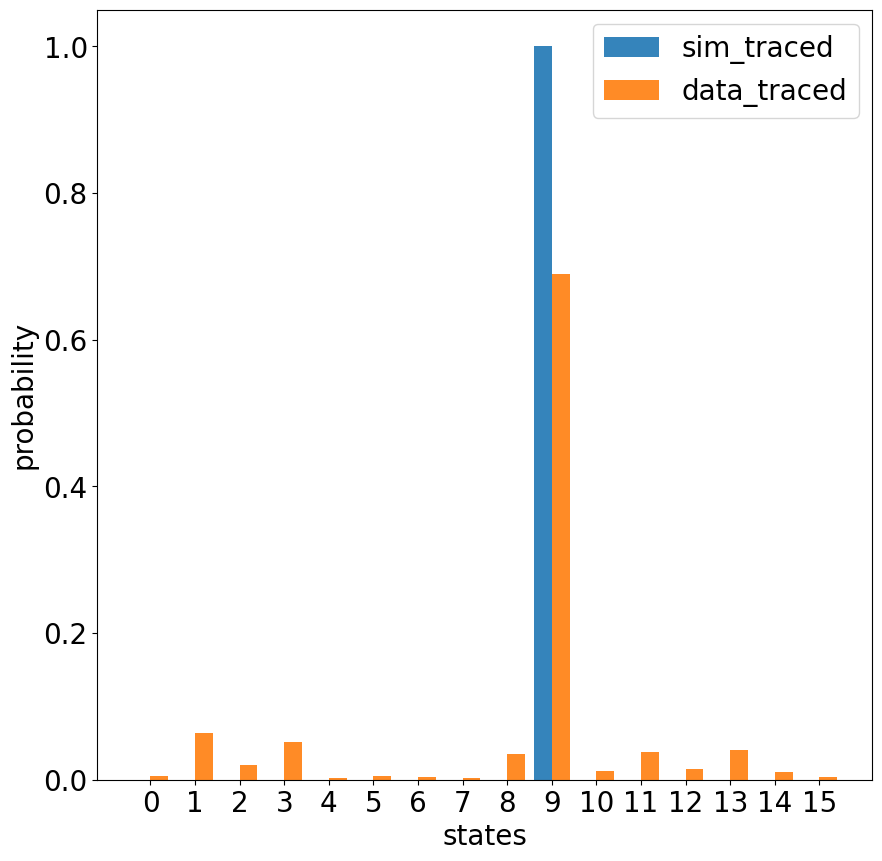

2024-02-23-162841_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



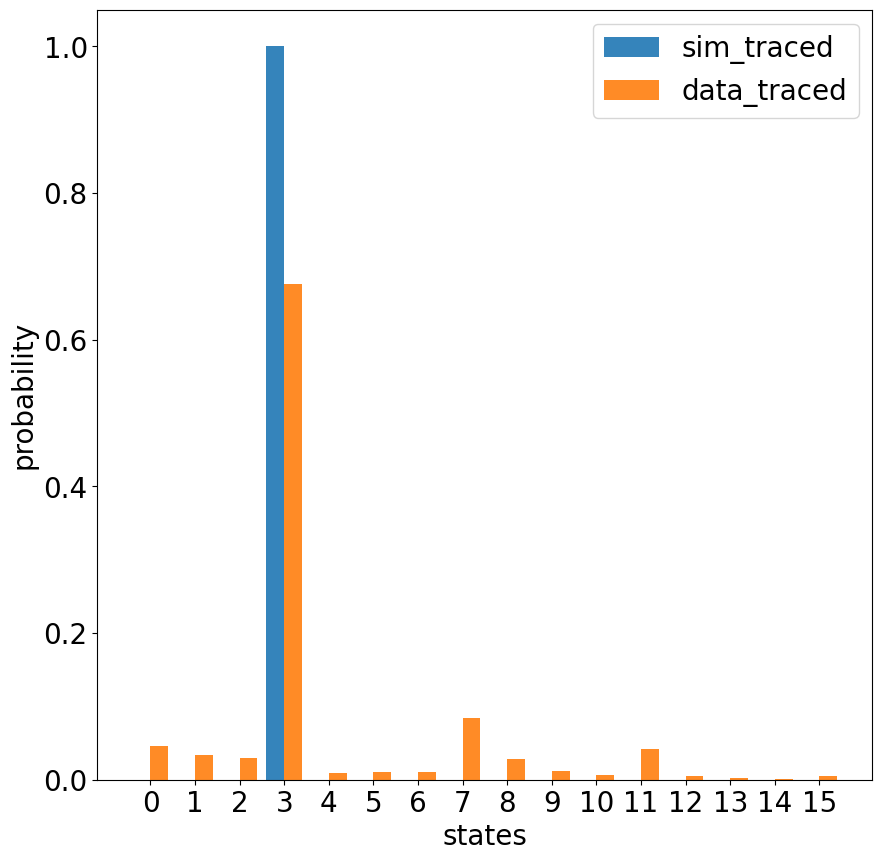

2024-02-23-163012_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



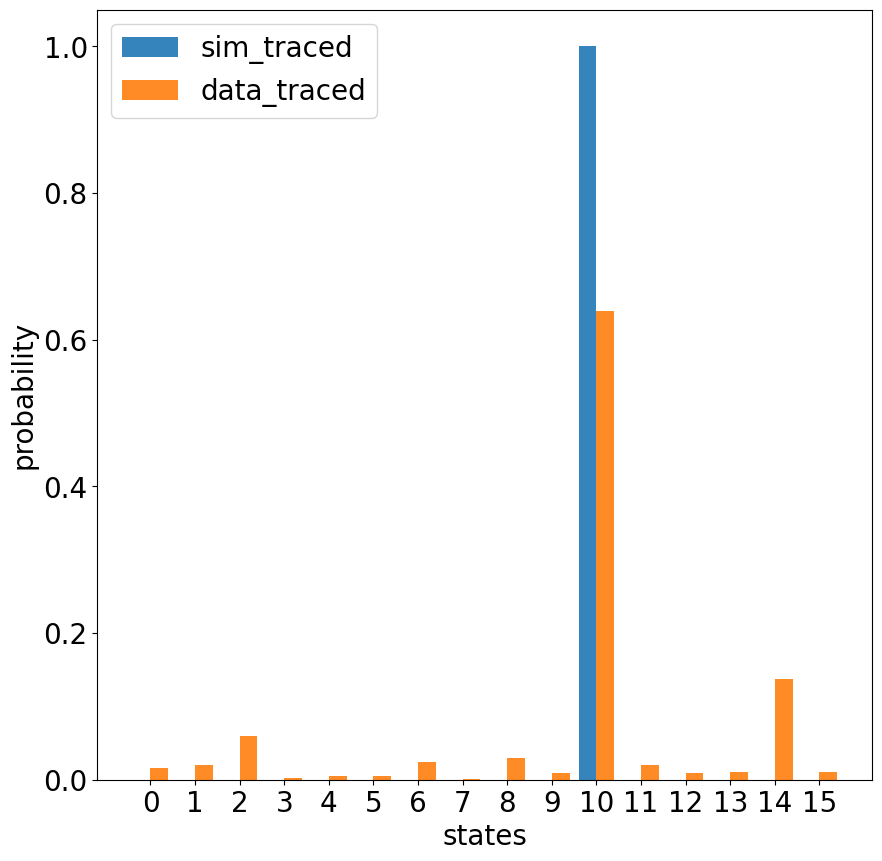

2024-02-23-164248_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



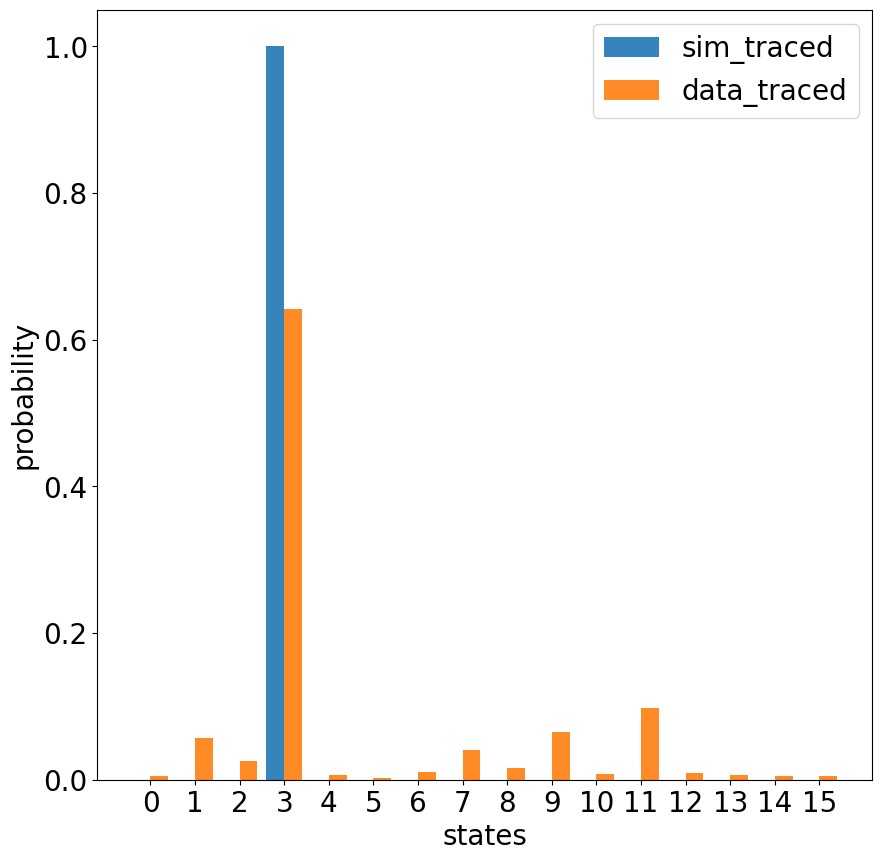

2024-02-23-164324_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



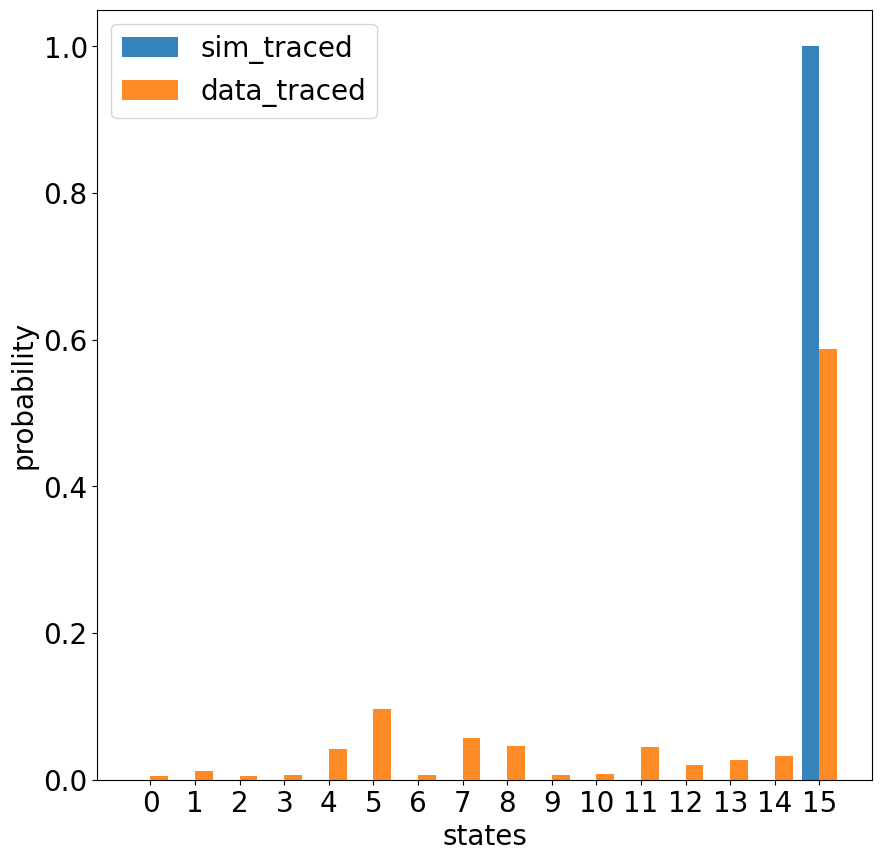

2024-02-23-164400_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



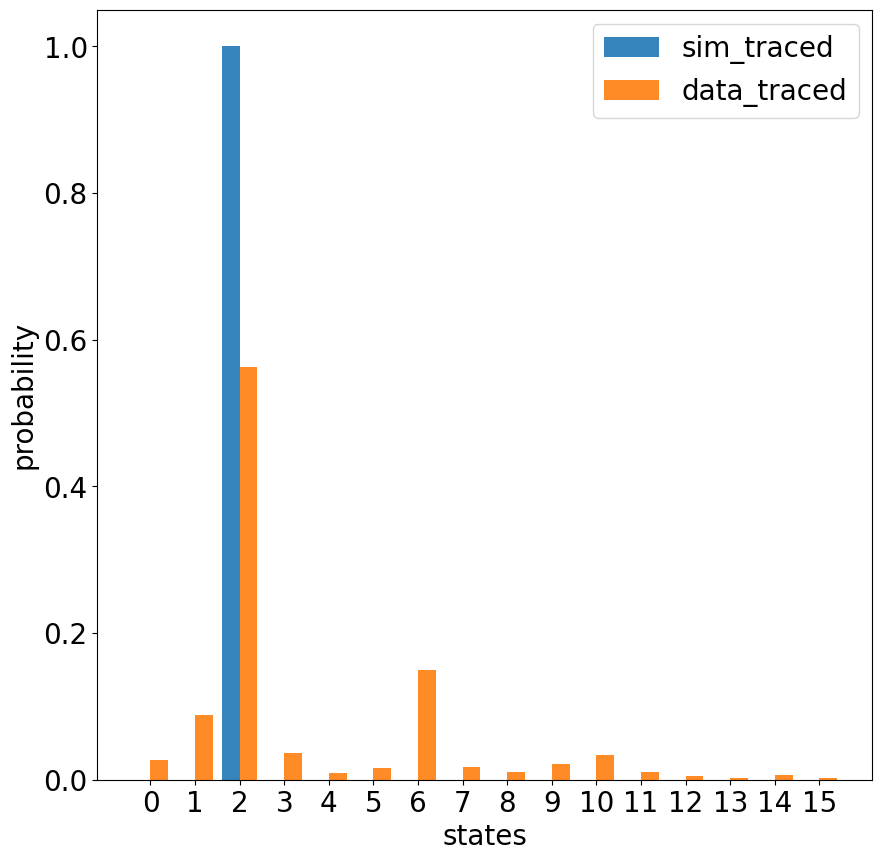

2024-02-23-164435_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



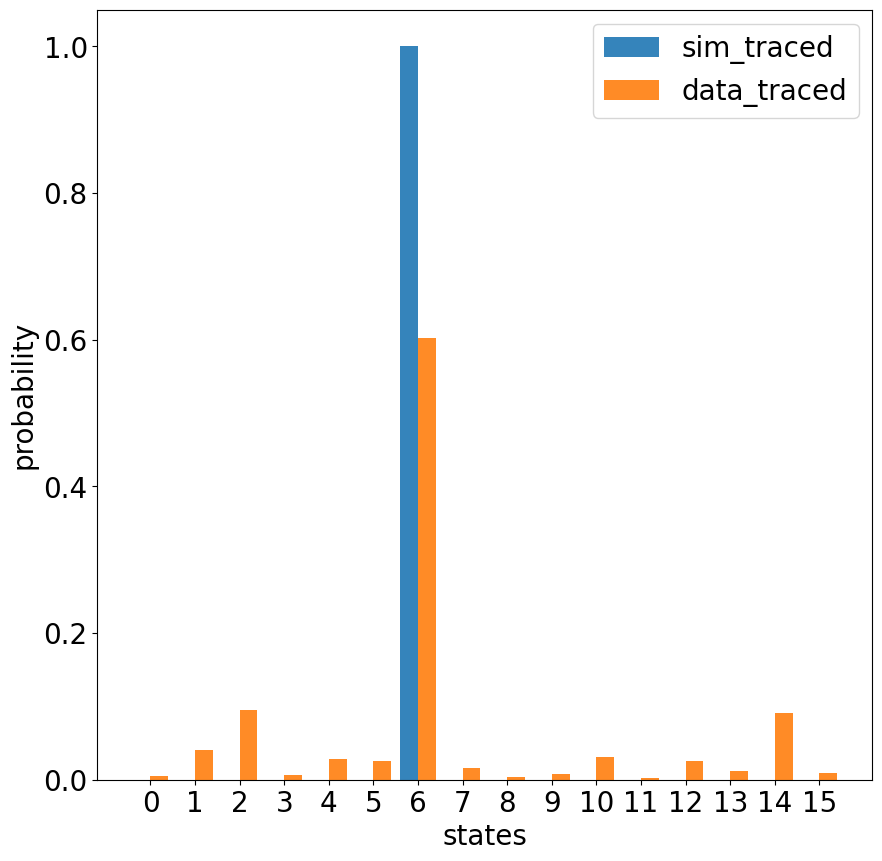

2024-02-23-202005_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



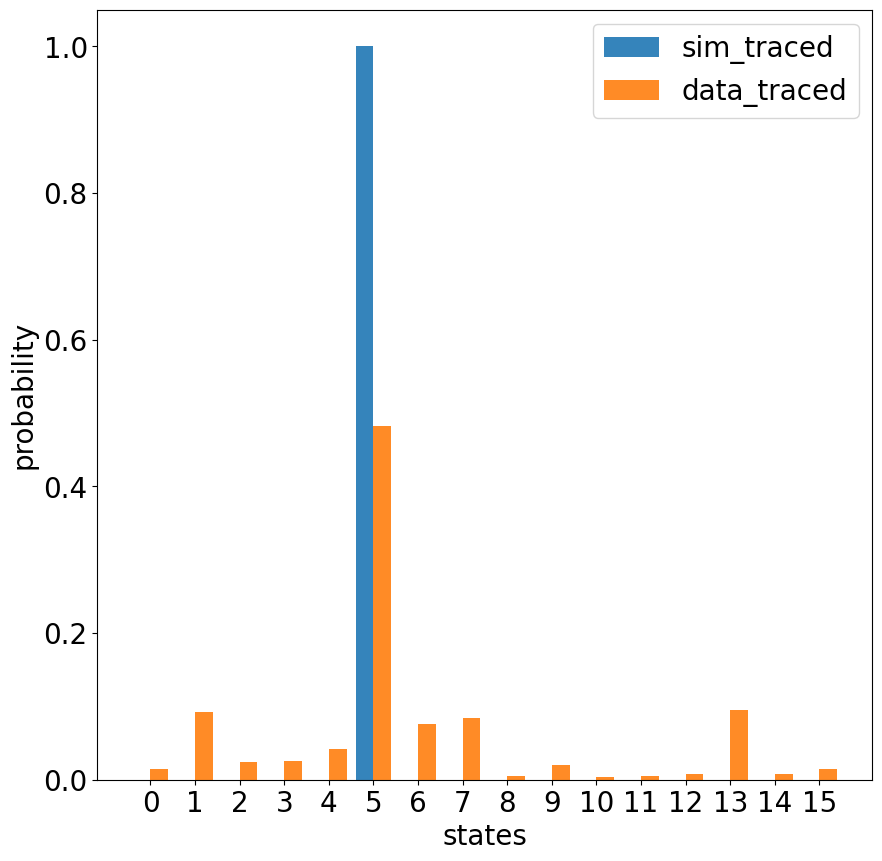

2024-02-23-202040_Line_012.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



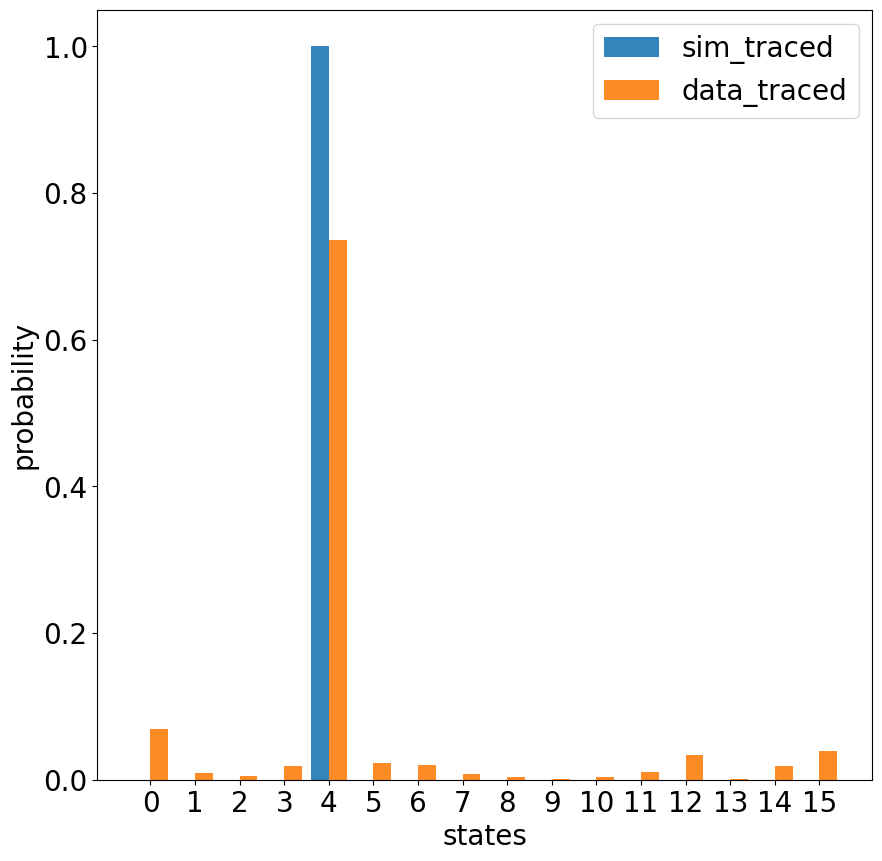

2024-02-23-202116_Line_013.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



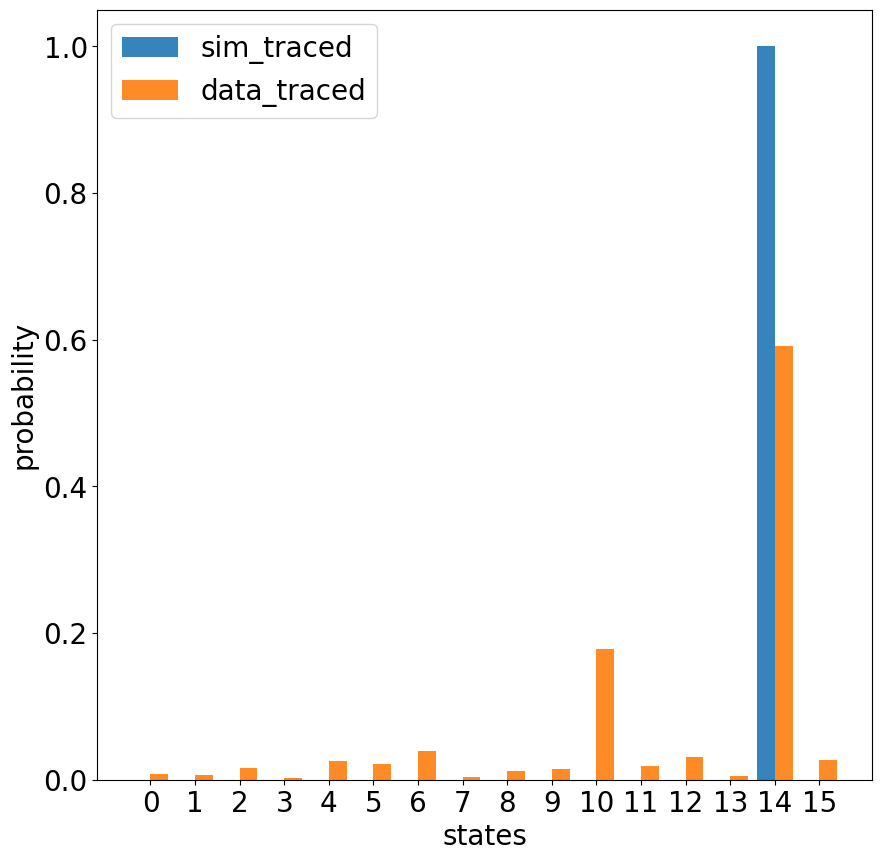

2024-02-23-202152_Line_014.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+41:FTXA450.2500+:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



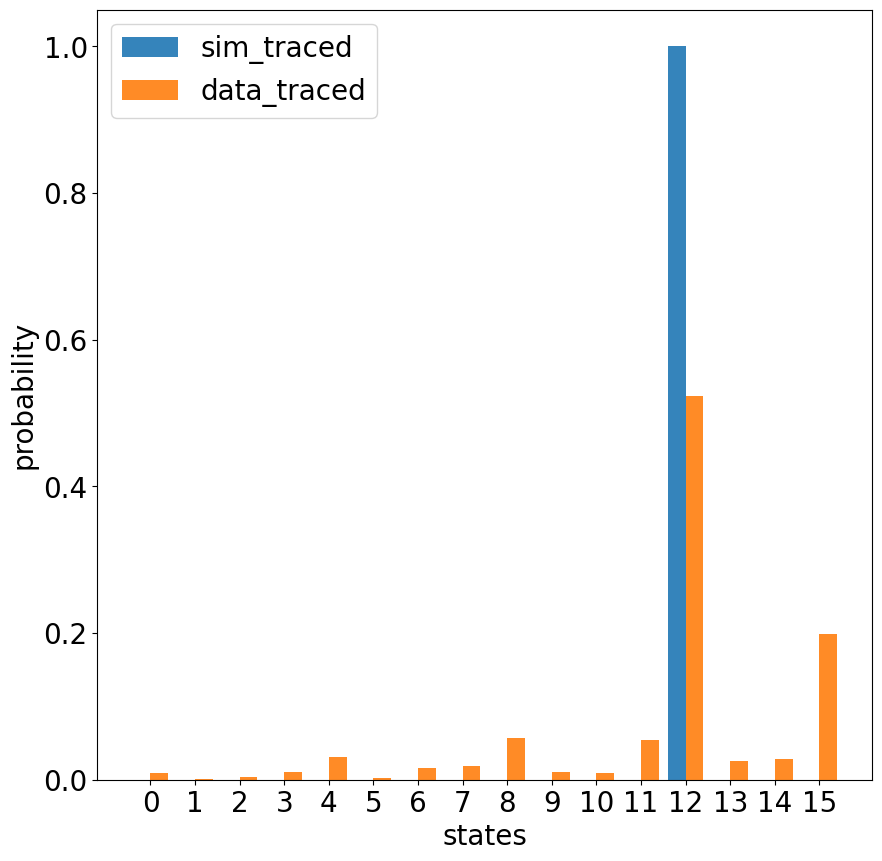

2024-02-23-202227_Line_015.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



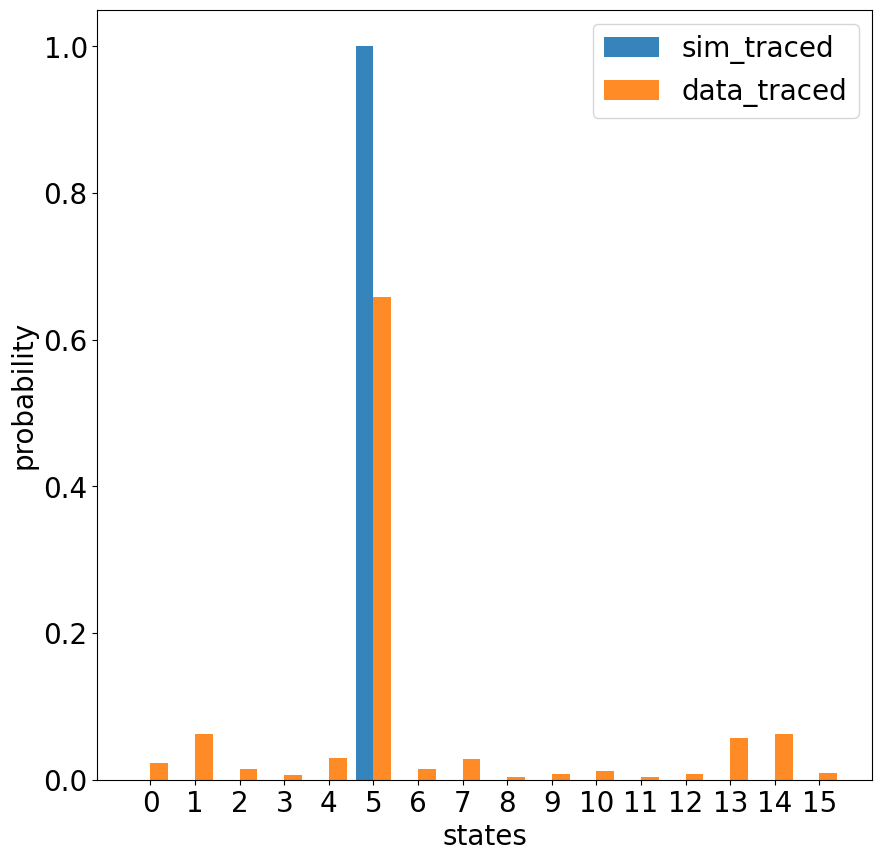

2024-02-23-202358_Line_016.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



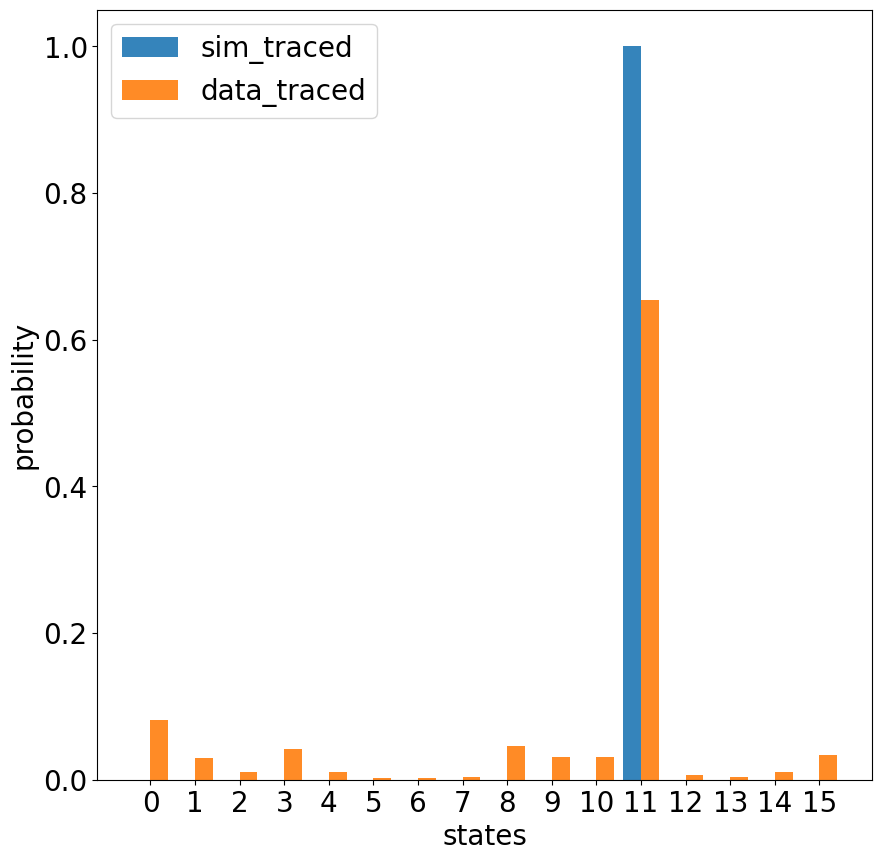

2024-02-23-202433_Line_017.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



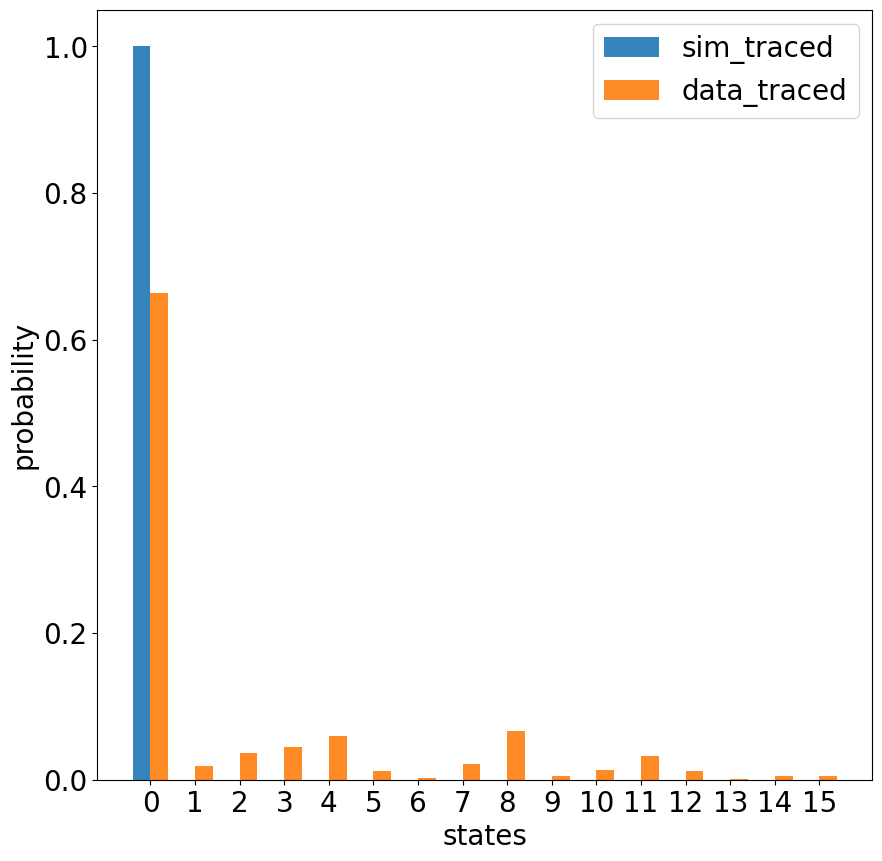

2024-02-23-202508_Line_018.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



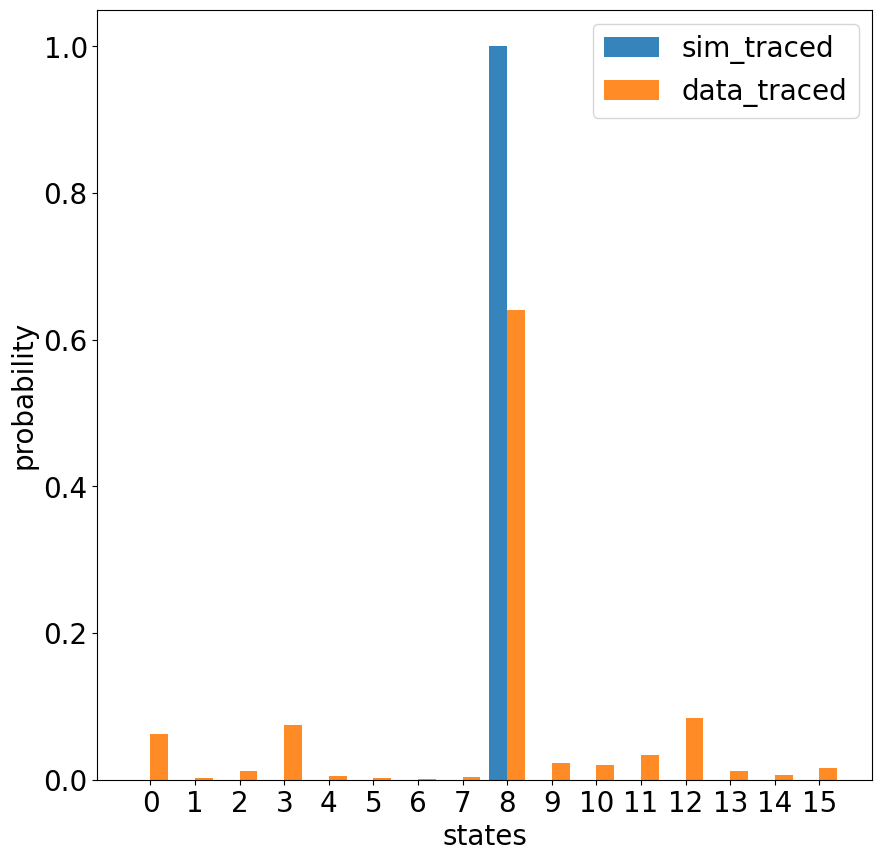

2024-02-23-202544_Line_019.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



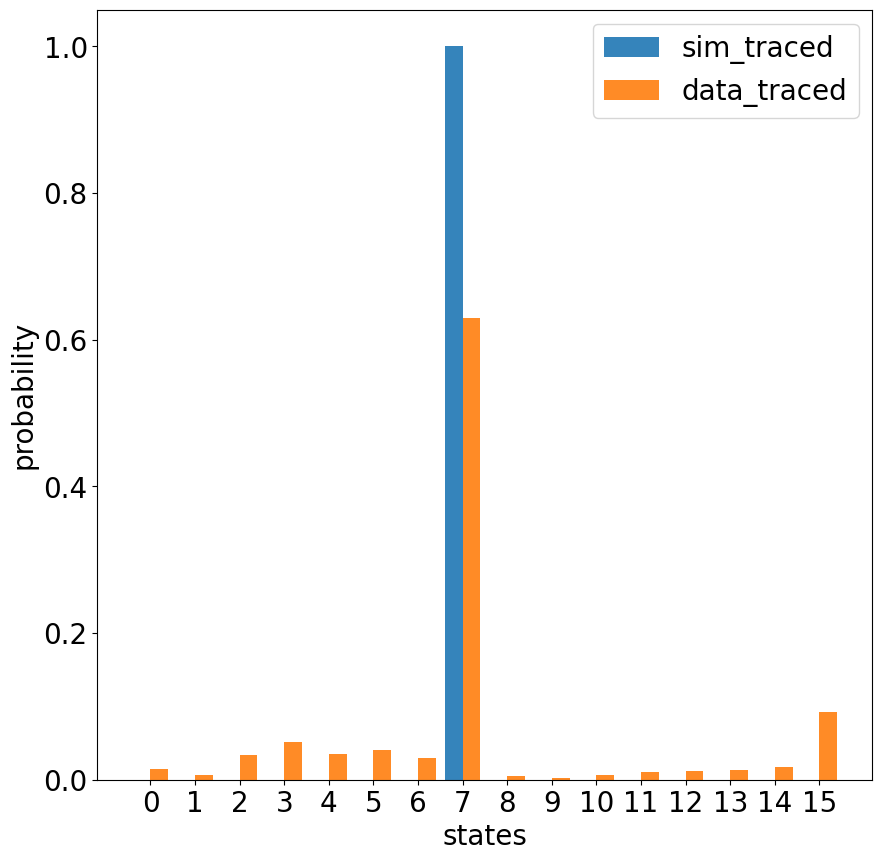

2024-02-23-202621_Line_020.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



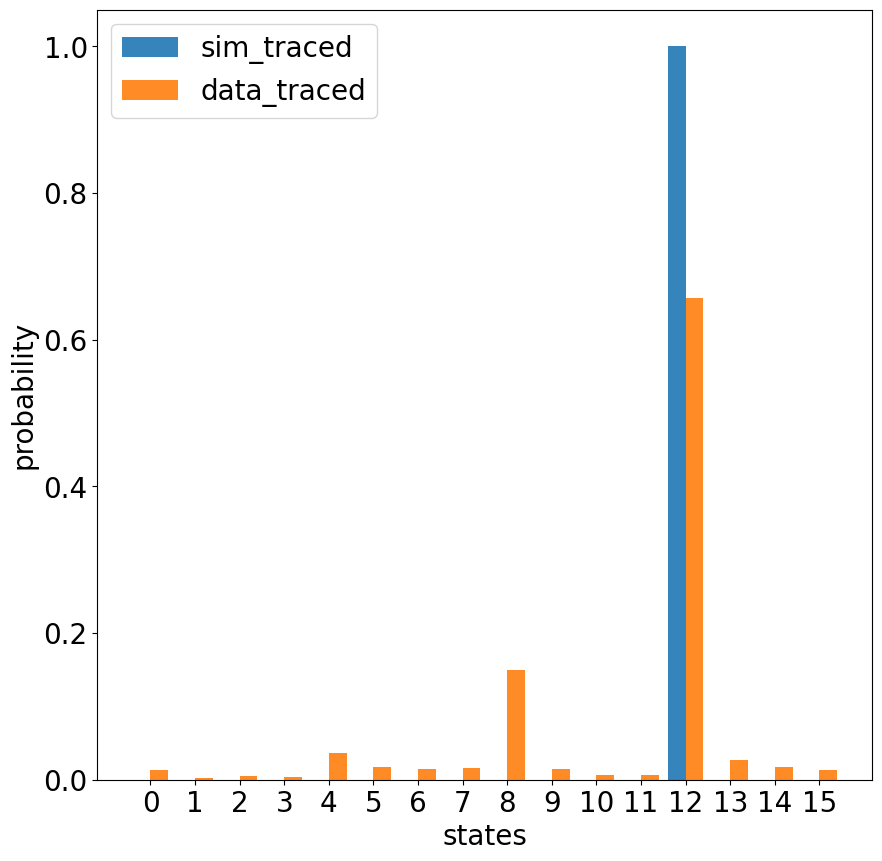

In [9]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d8.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
#     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
#     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     counts_d8_spam.append(counts_ibm_mapping_dic_spam)
    
#     a_0703.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
#     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
#     Display_States_Population(states=[b,a,a_s],label=["simulation","d=8","spam"])
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-02-23-164859_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



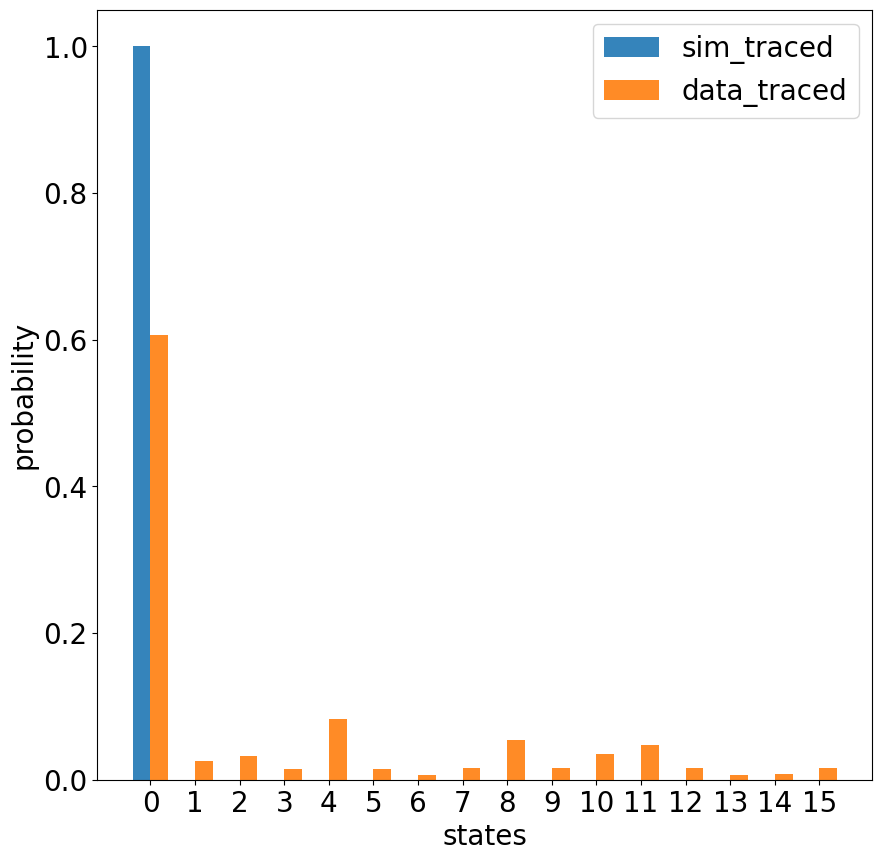

2024-02-23-164954_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



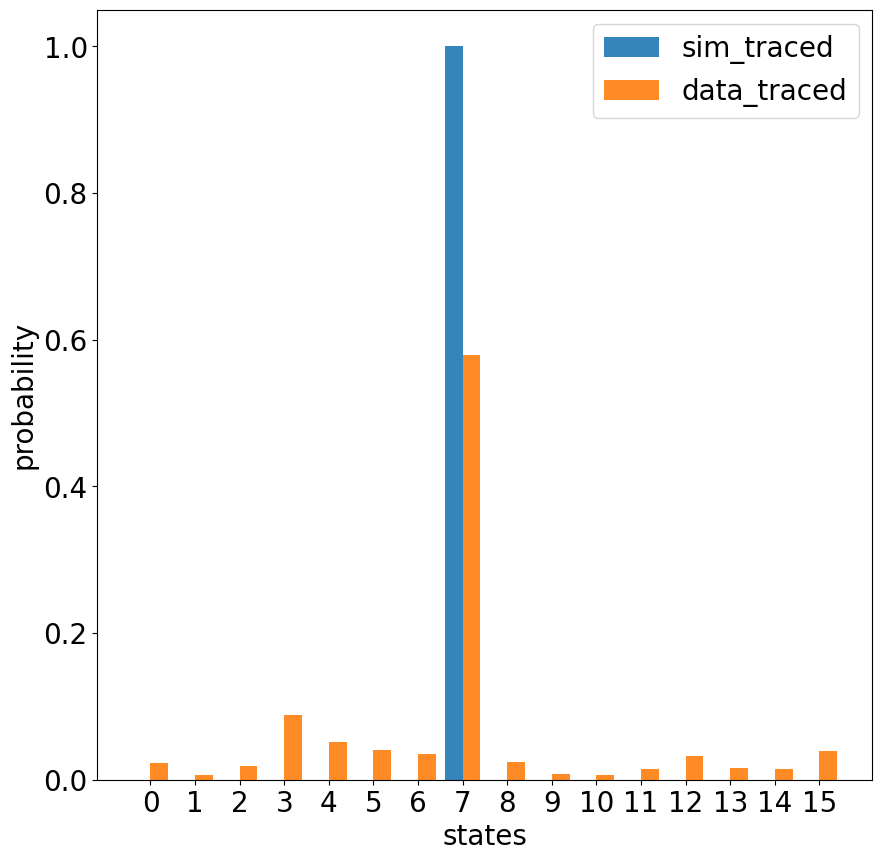

2024-02-23-165047_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



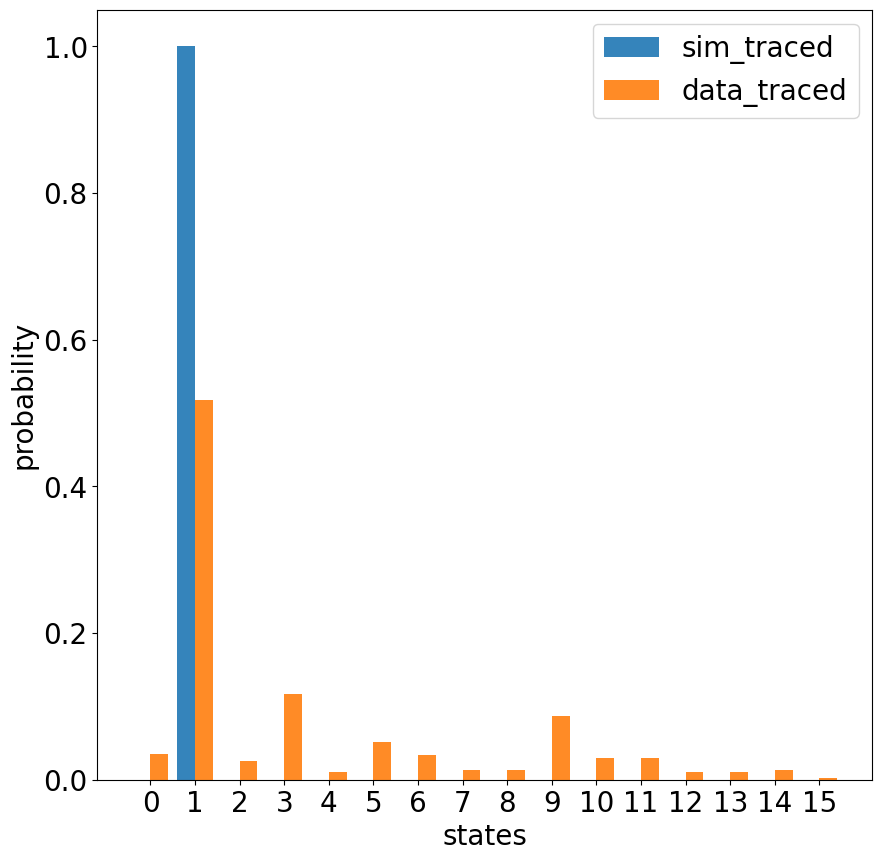

2024-02-23-165141_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



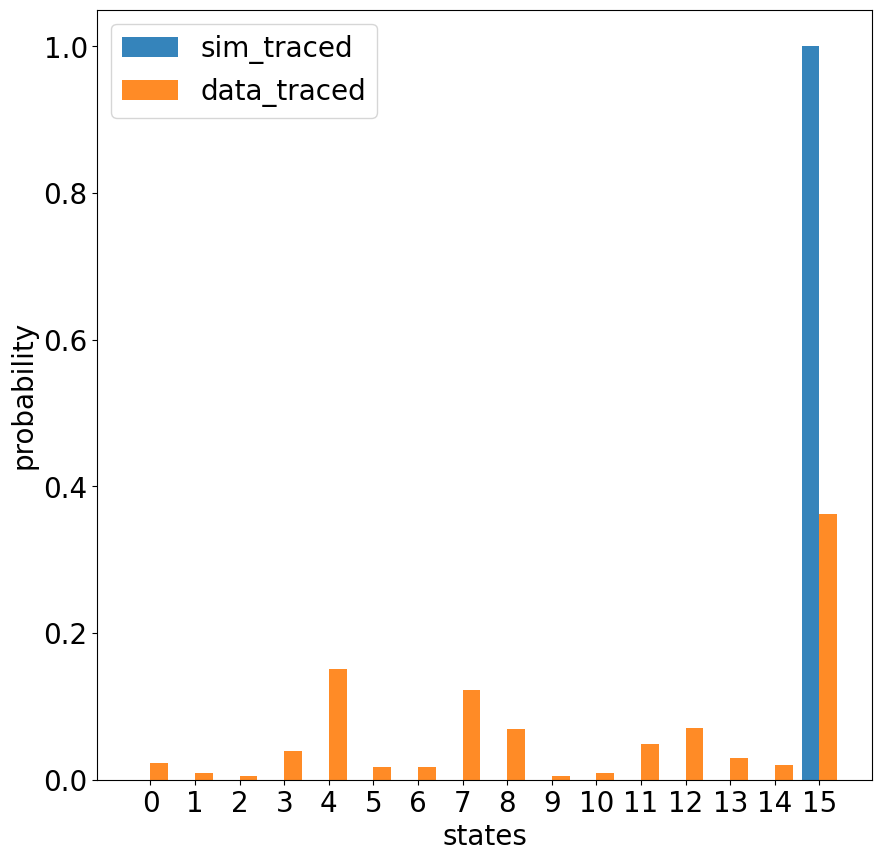

2024-02-23-165236_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



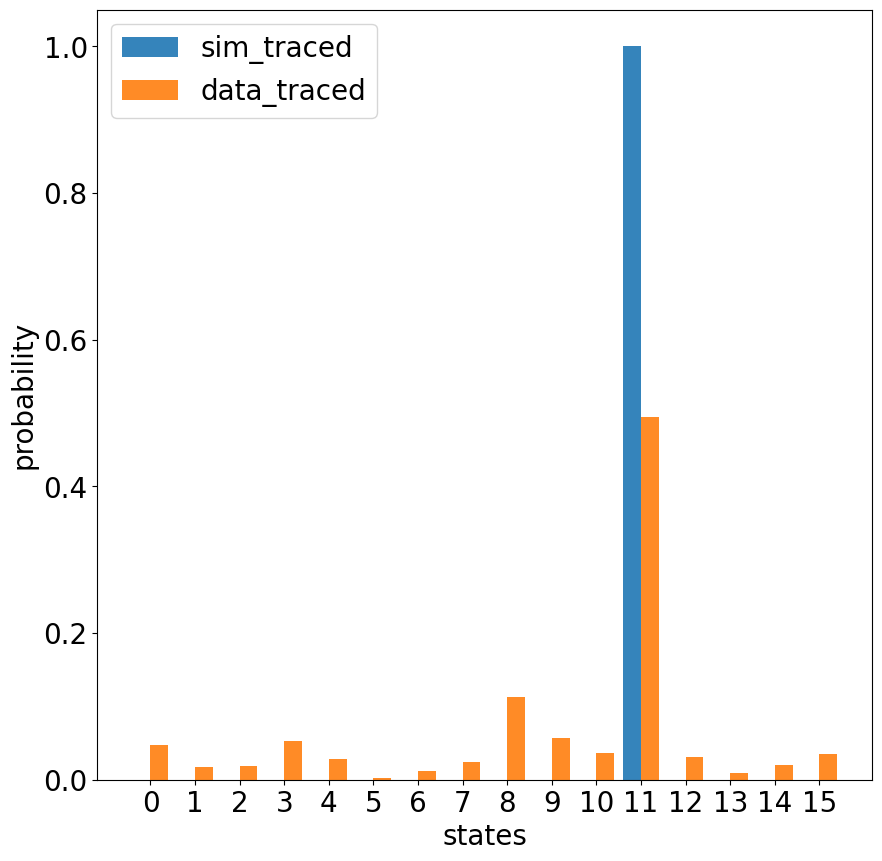

2024-02-23-165425_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



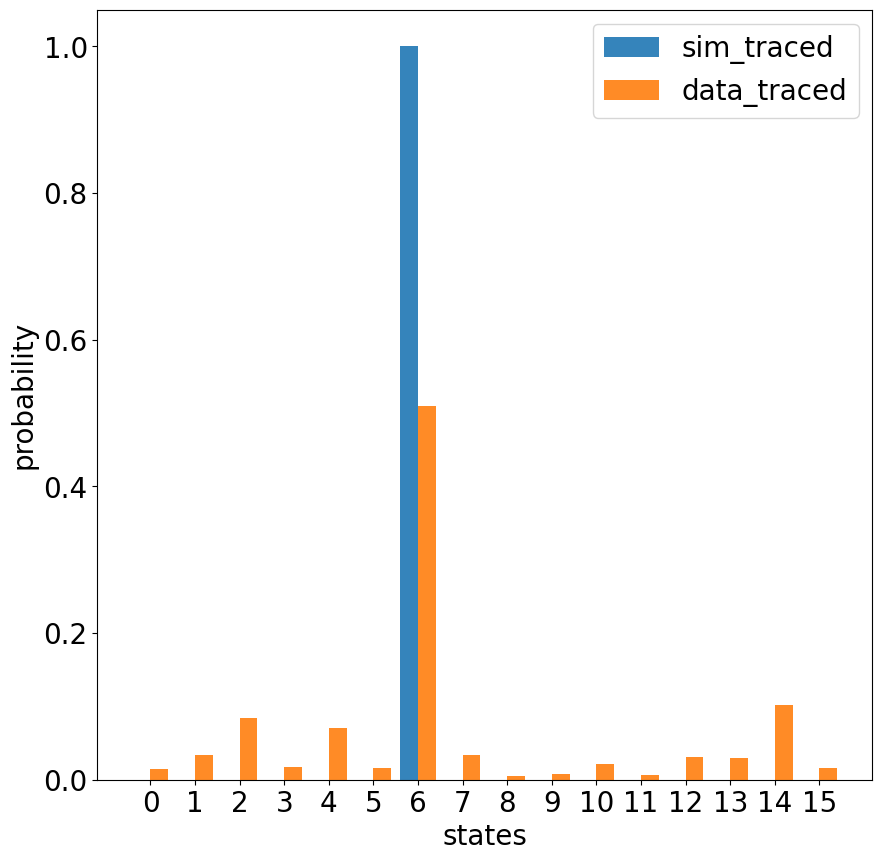

2024-02-23-165521_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



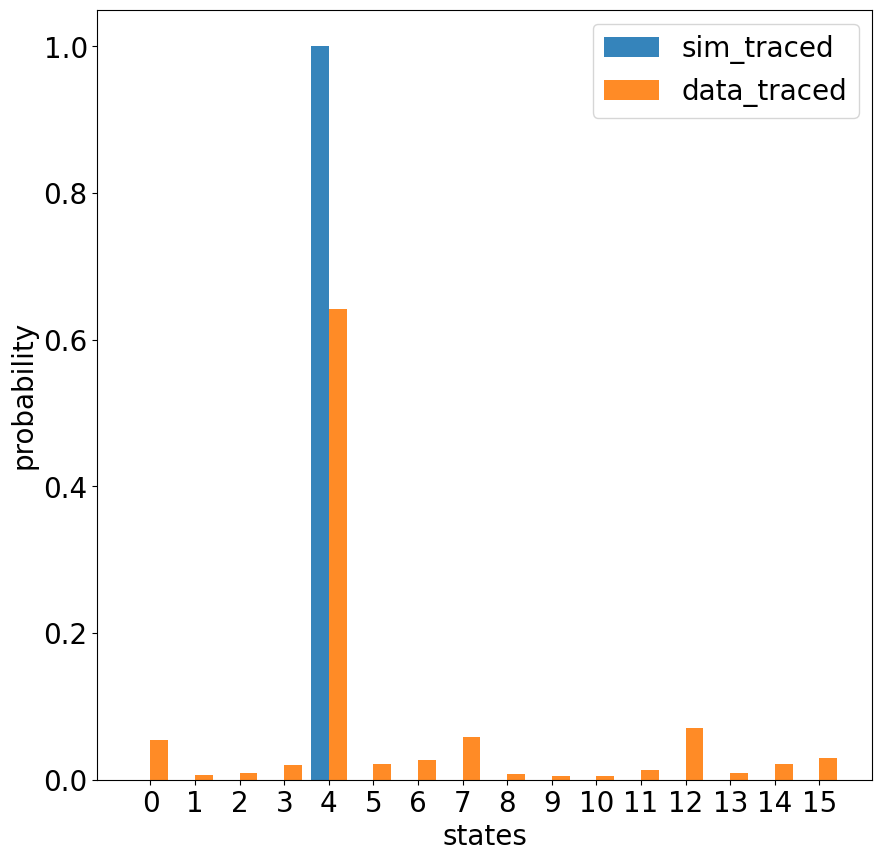

2024-02-23-165616_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



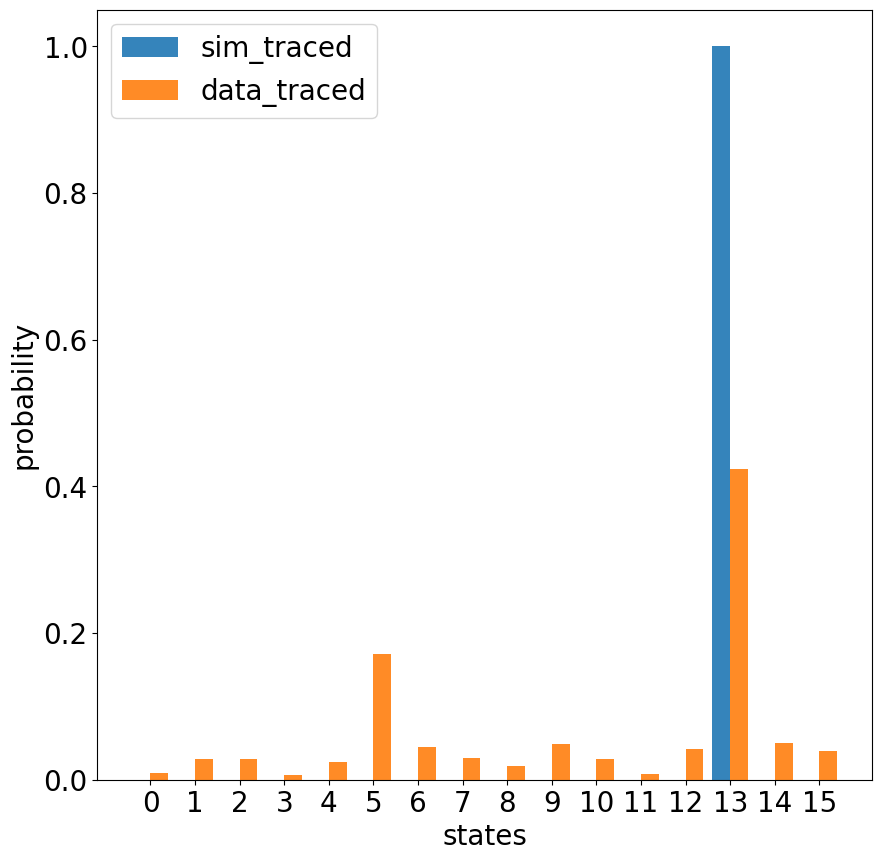

2024-02-23-165710_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



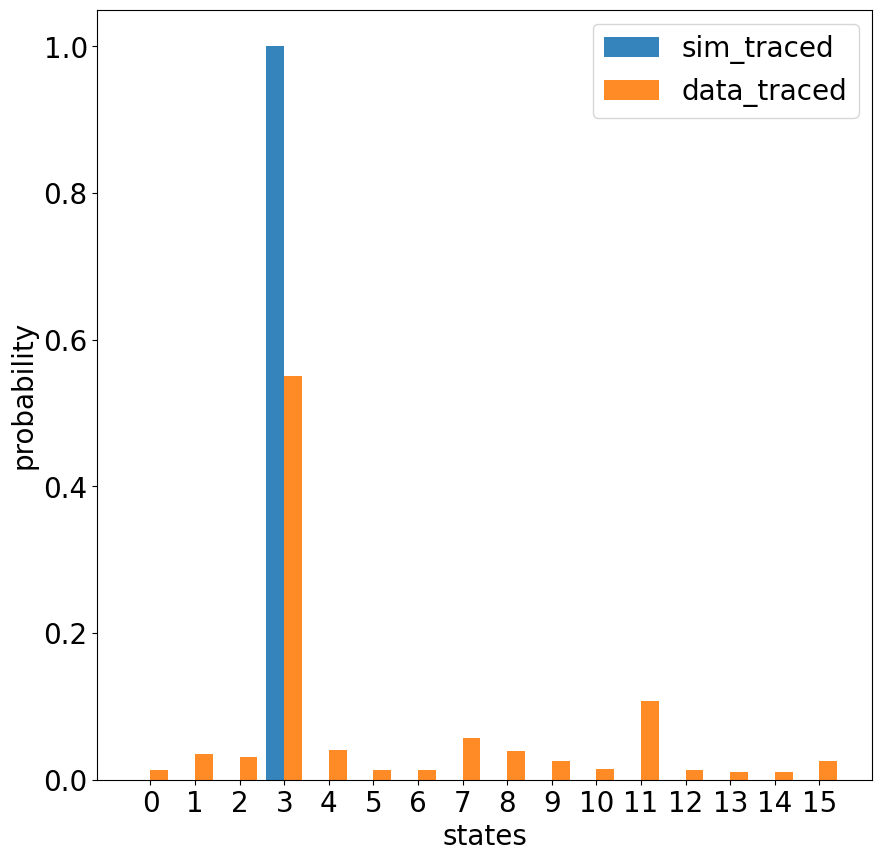

2024-02-23-165803_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



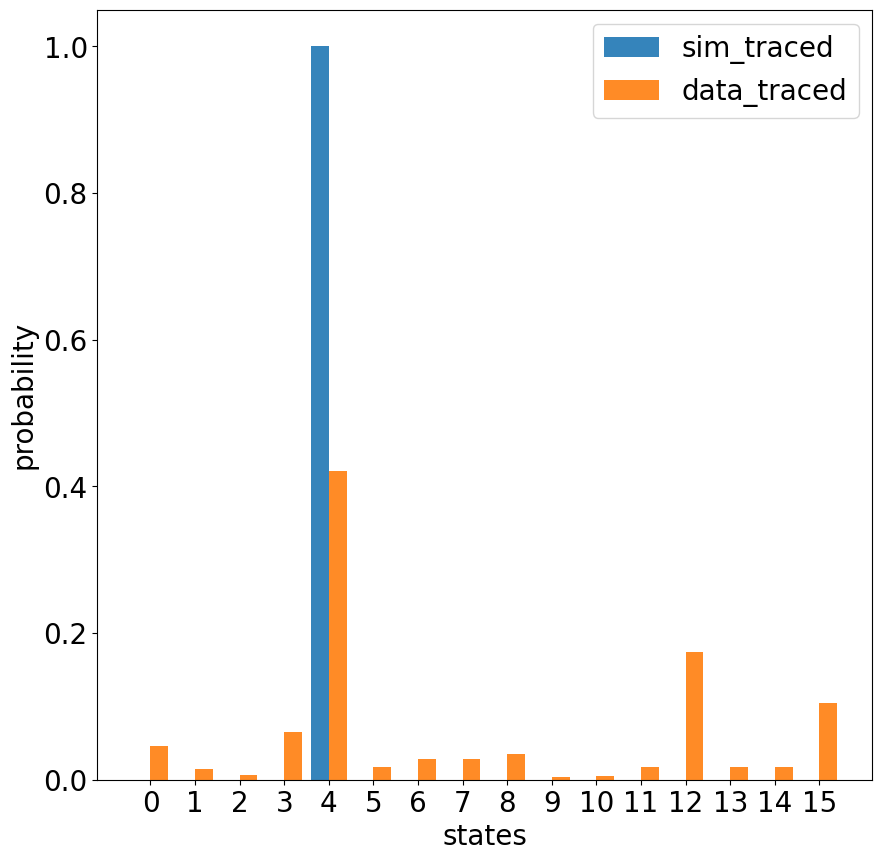

2024-02-23-193714_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



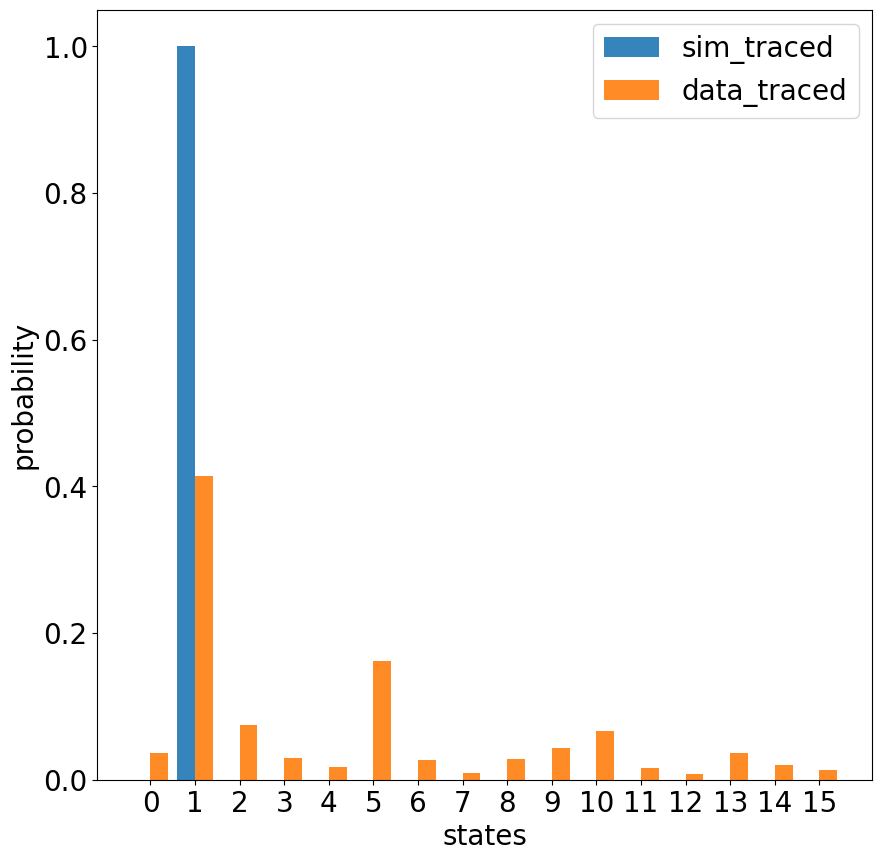

2024-02-23-193808_Line_012.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



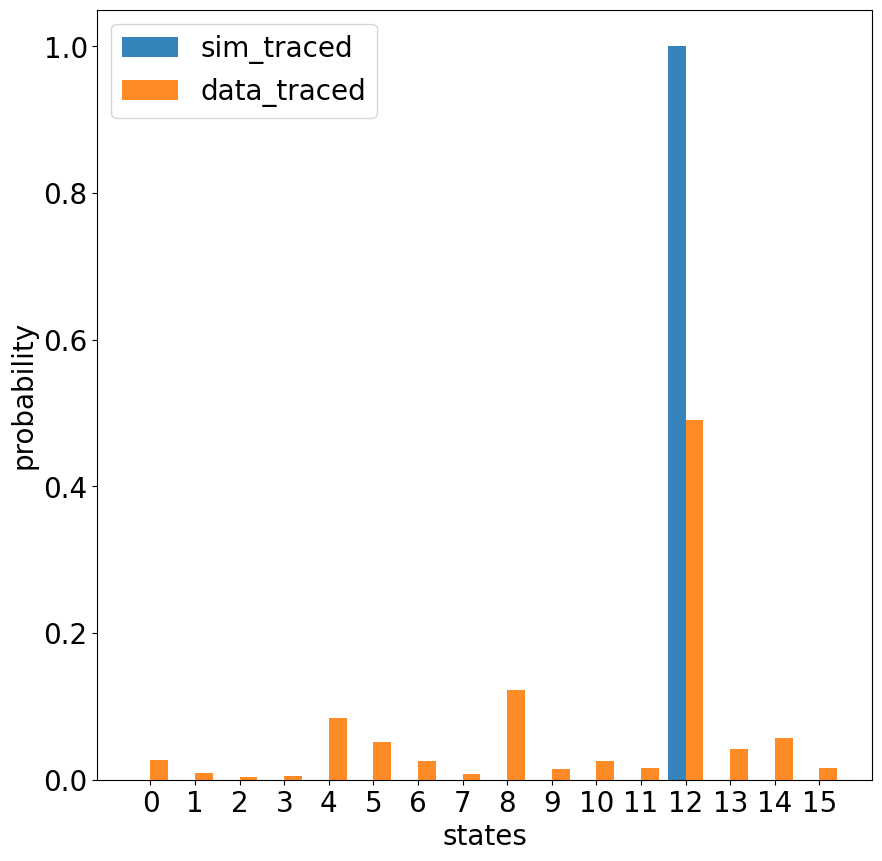

2024-02-23-193904_Line_013.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



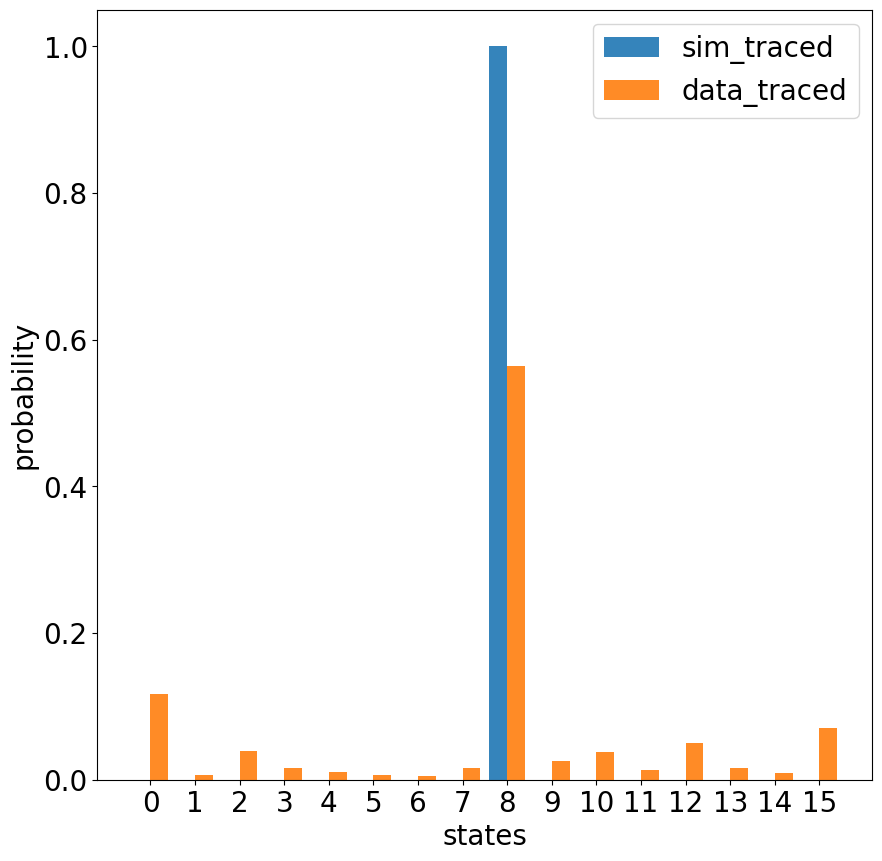

2024-02-23-193957_Line_014.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



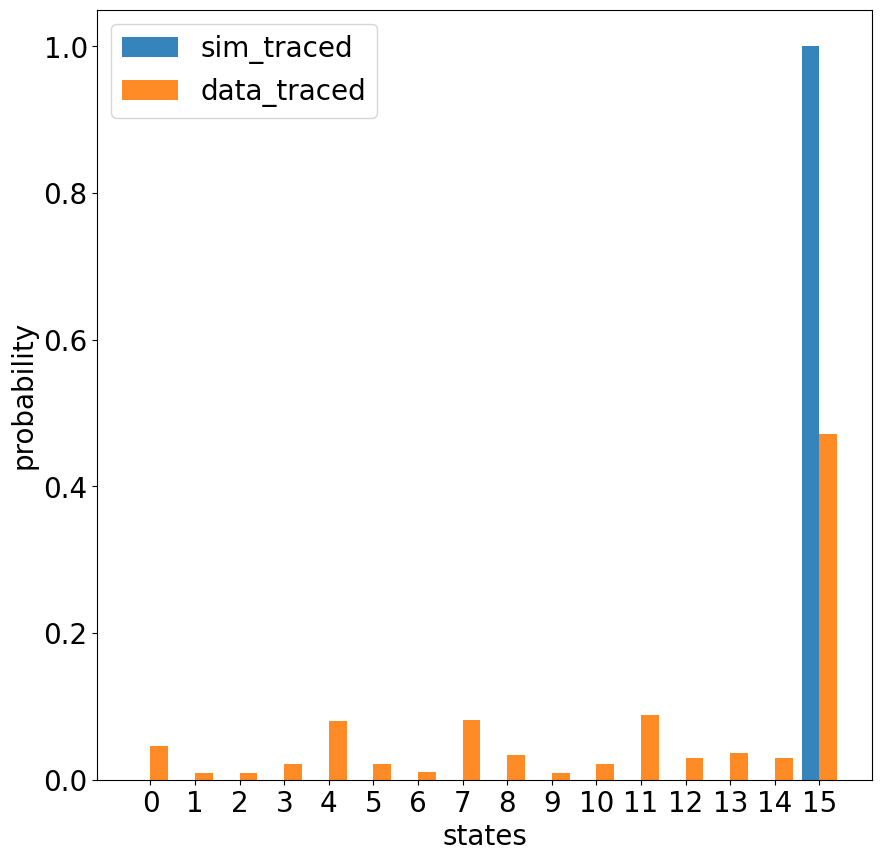

2024-02-23-194051_Line_015.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



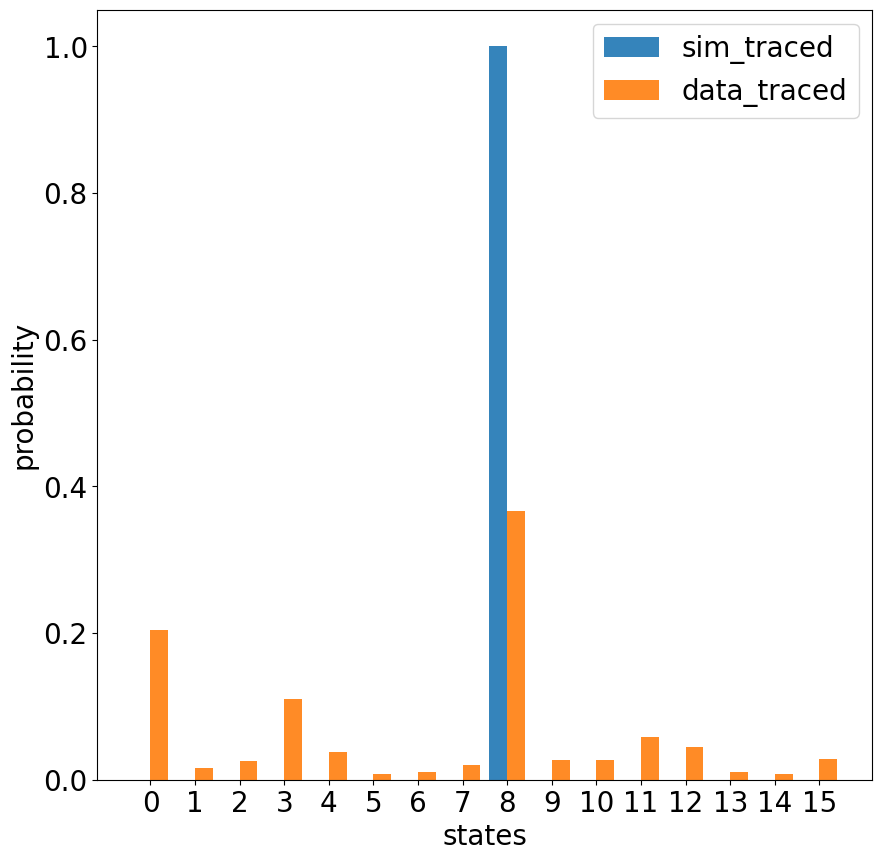

2024-02-23-194240_Line_016.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



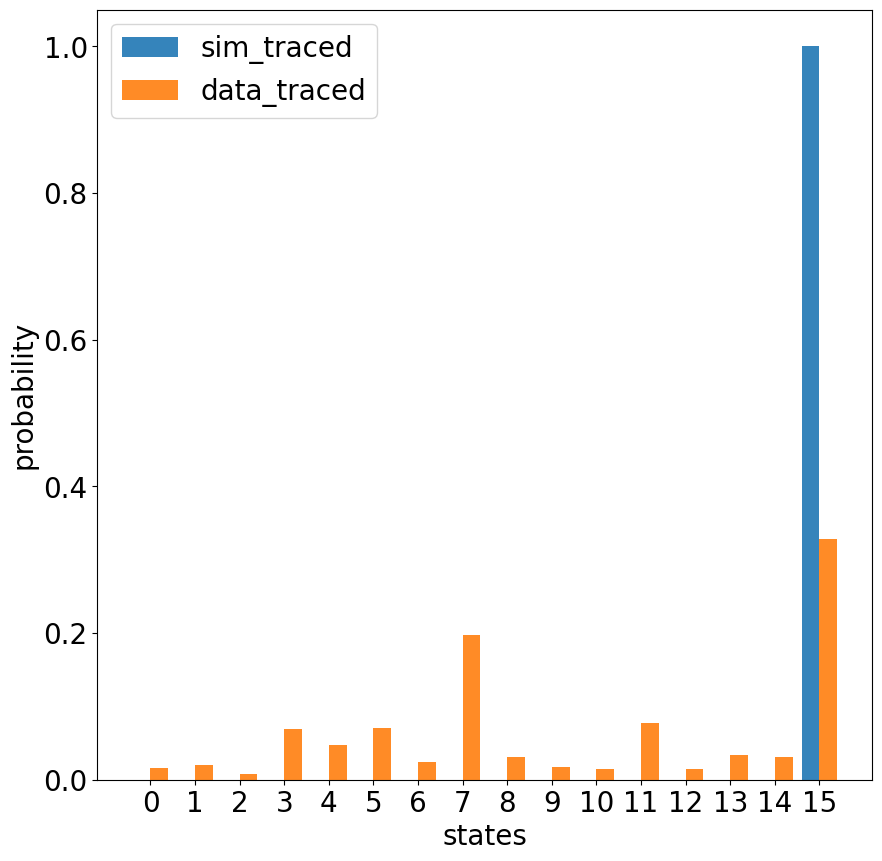

2024-02-23-200621_Line_017.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



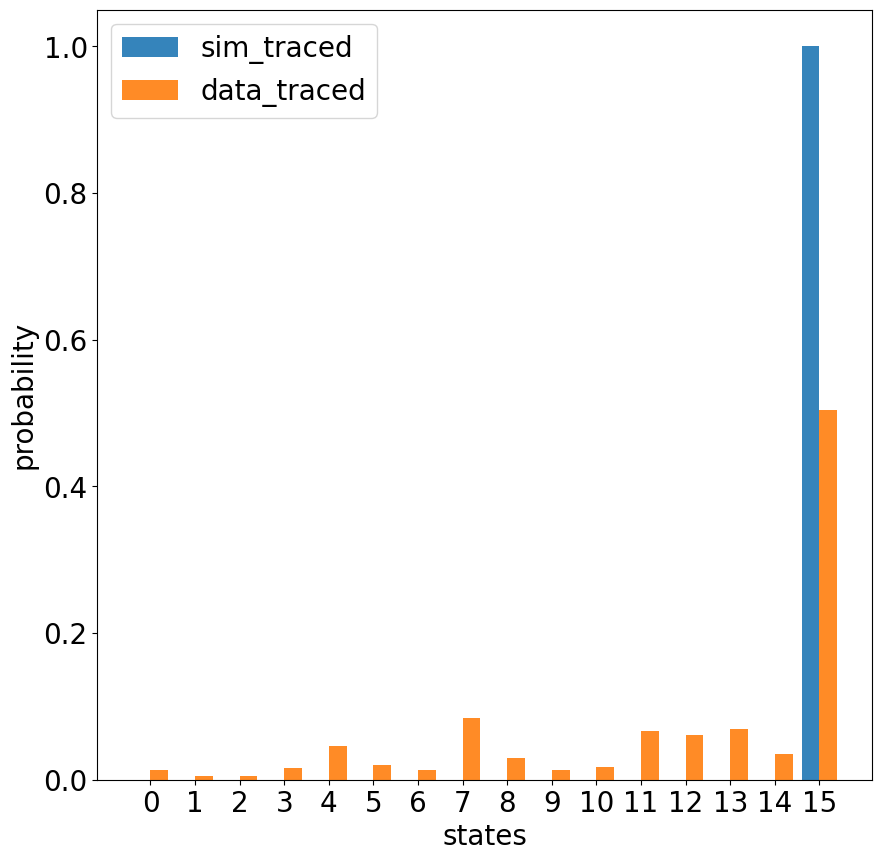

2024-02-23-200712_Line_018.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



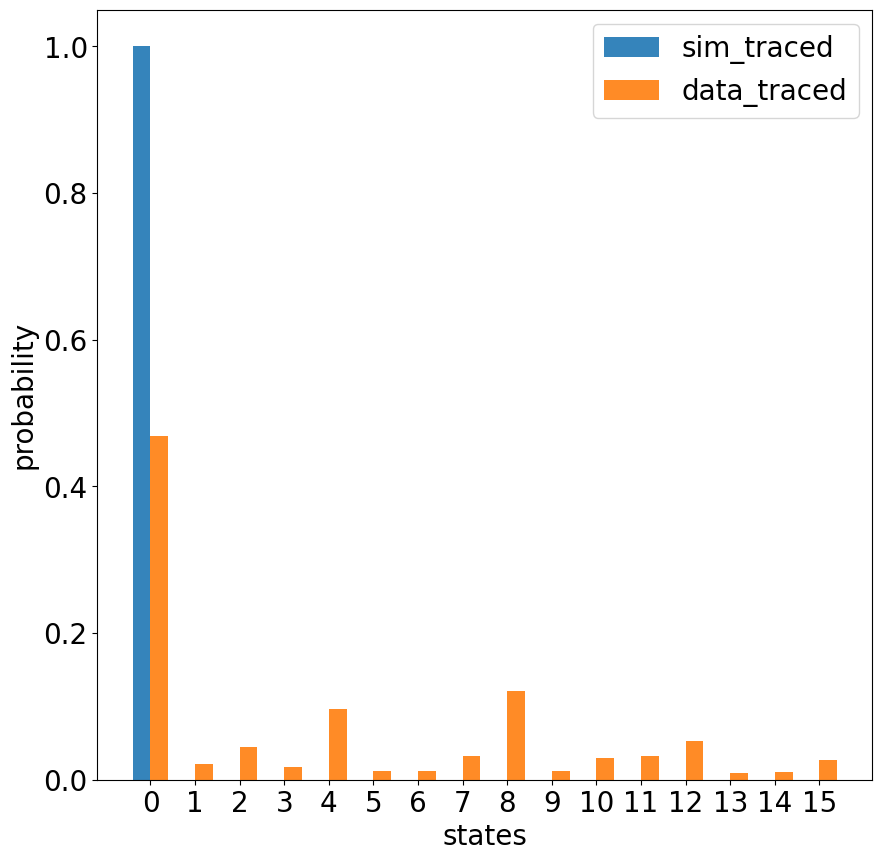

2024-02-23-200808_Line_019.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



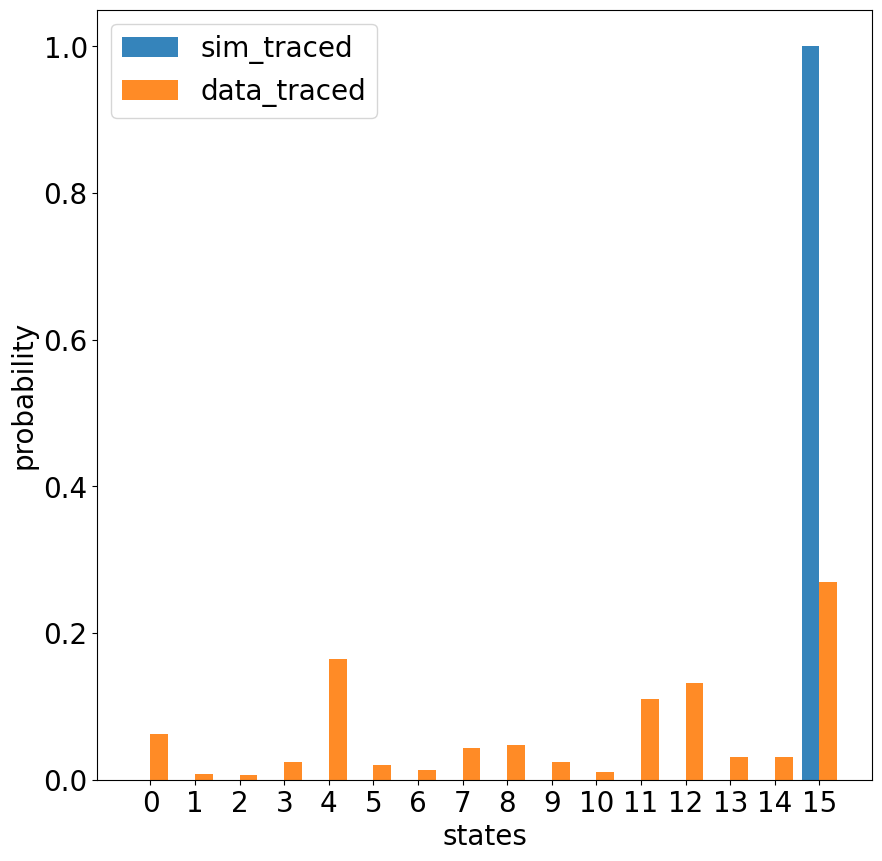

2024-02-23-200902_Line_020.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



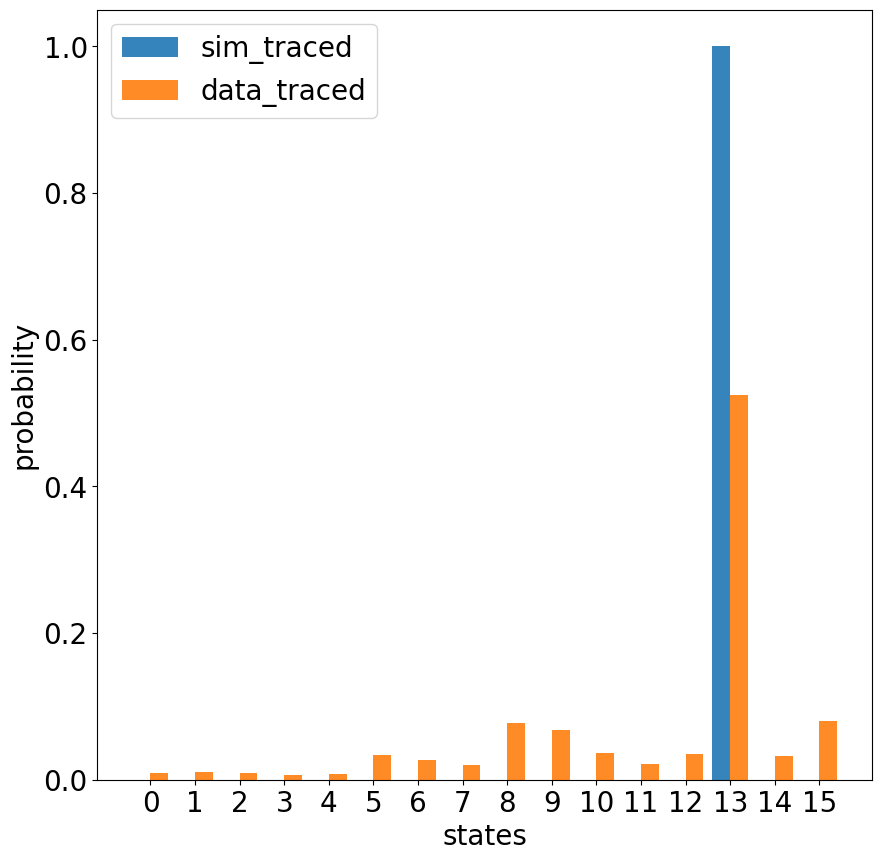

In [10]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d16.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d16.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
#     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
#     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     counts_d8_spam.append(counts_ibm_mapping_dic_spam)
    
#     a_0703.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
#     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
#     Display_States_Population(states=[b,a,a_s],label=["simulation","d=8","spam"])
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-02-23-170228_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+42:FTXA420

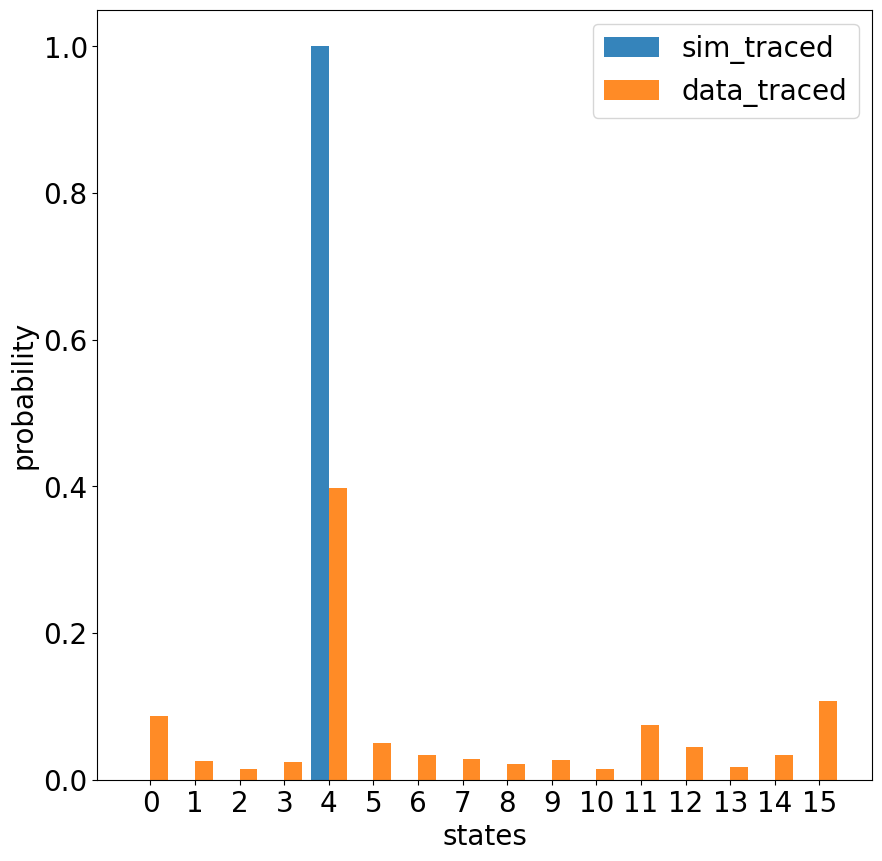

2024-02-23-170408_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:R

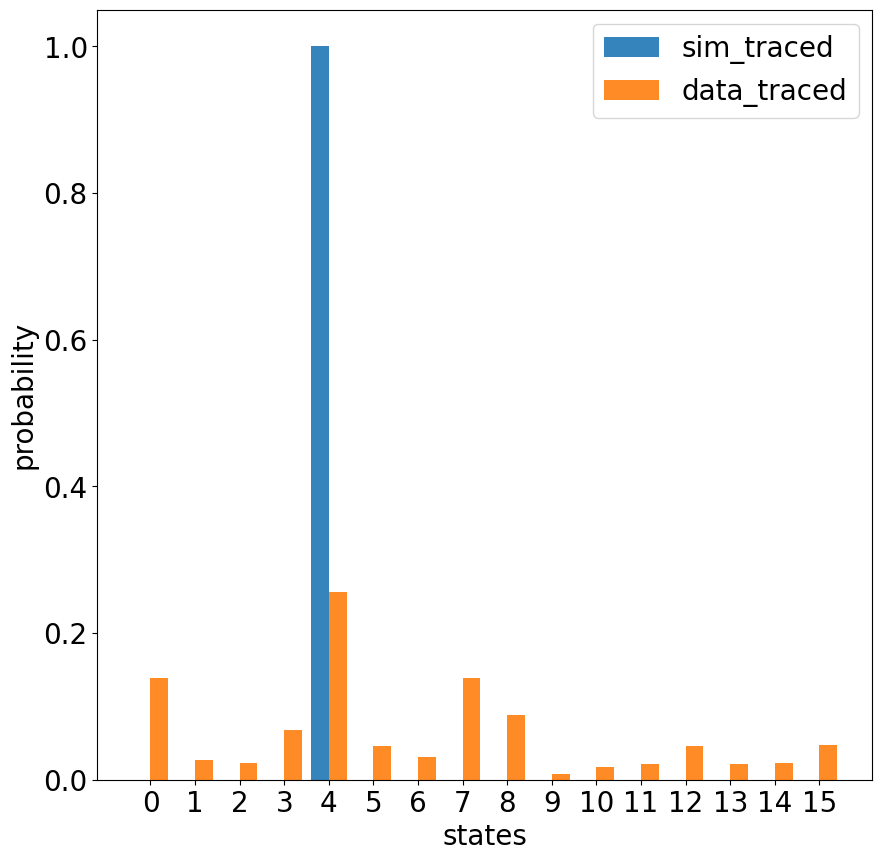

2024-02-23-170546_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RY+51:RY+42

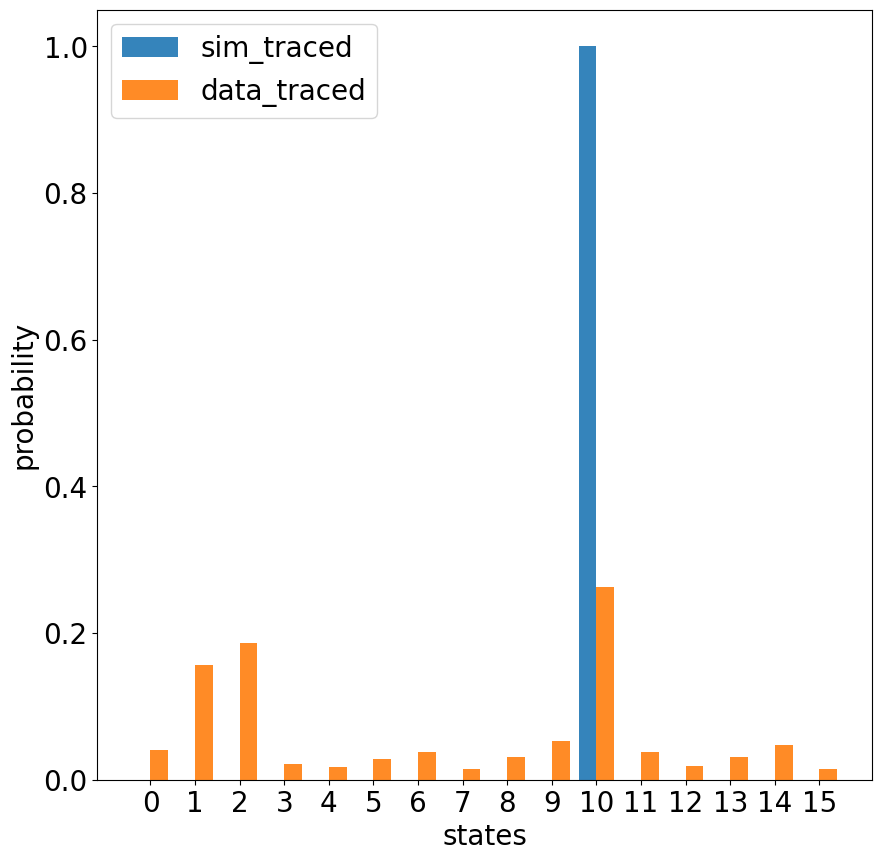

2024-02-23-174811_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-1

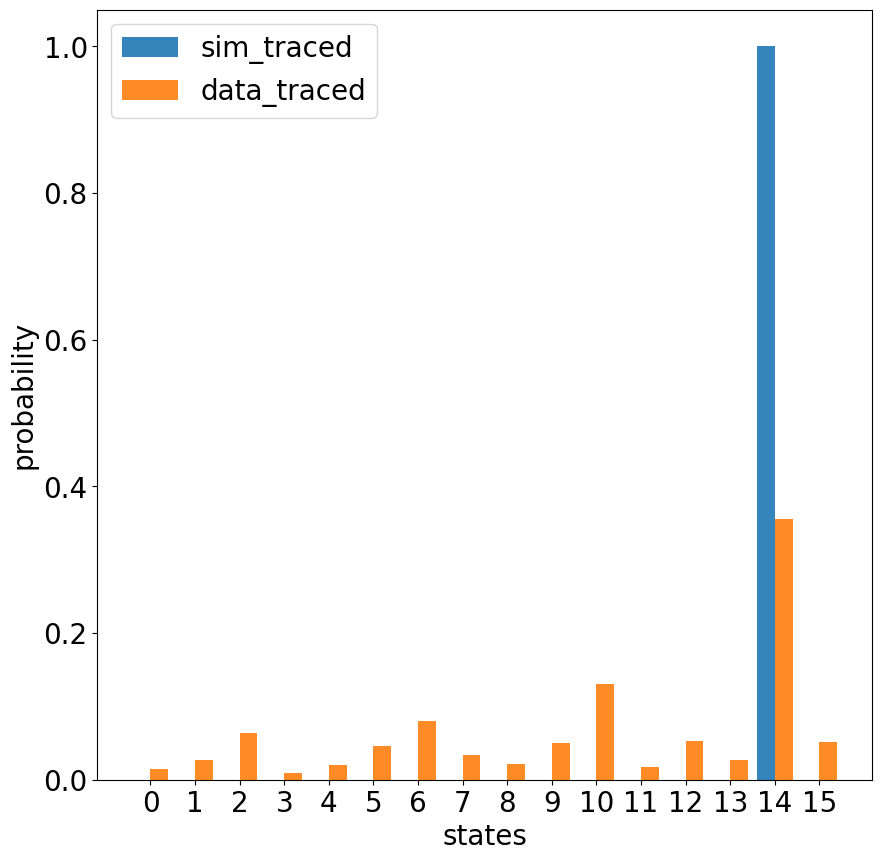

2024-02-23-174950_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+51:FTXA450.2500+:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+

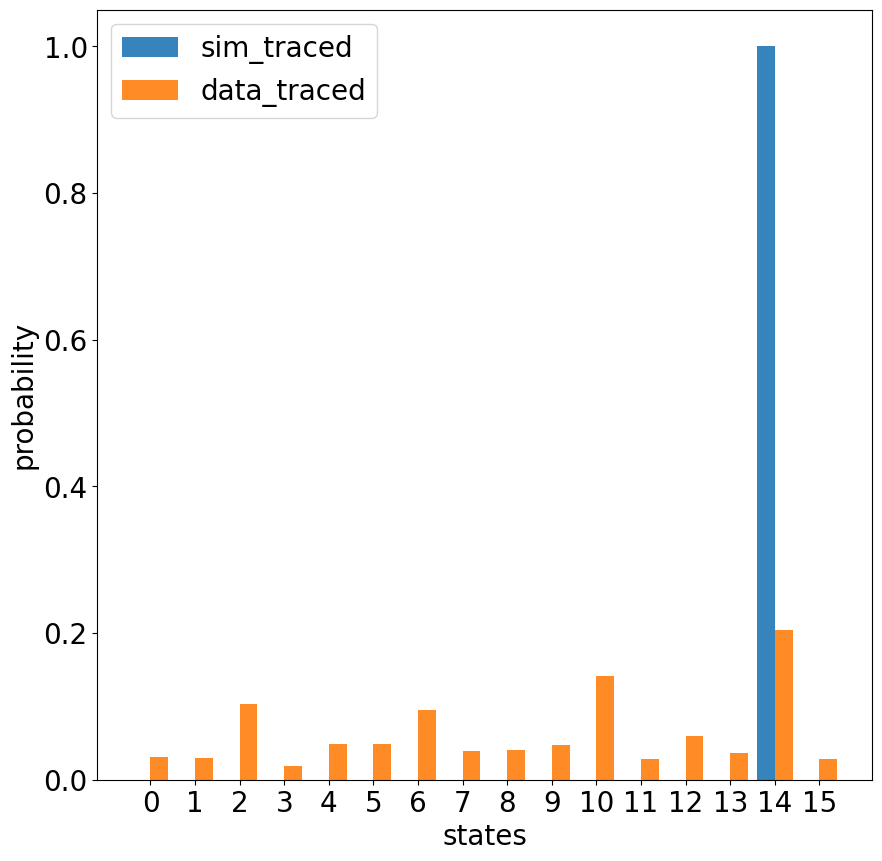

2024-02-23-180518_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+5

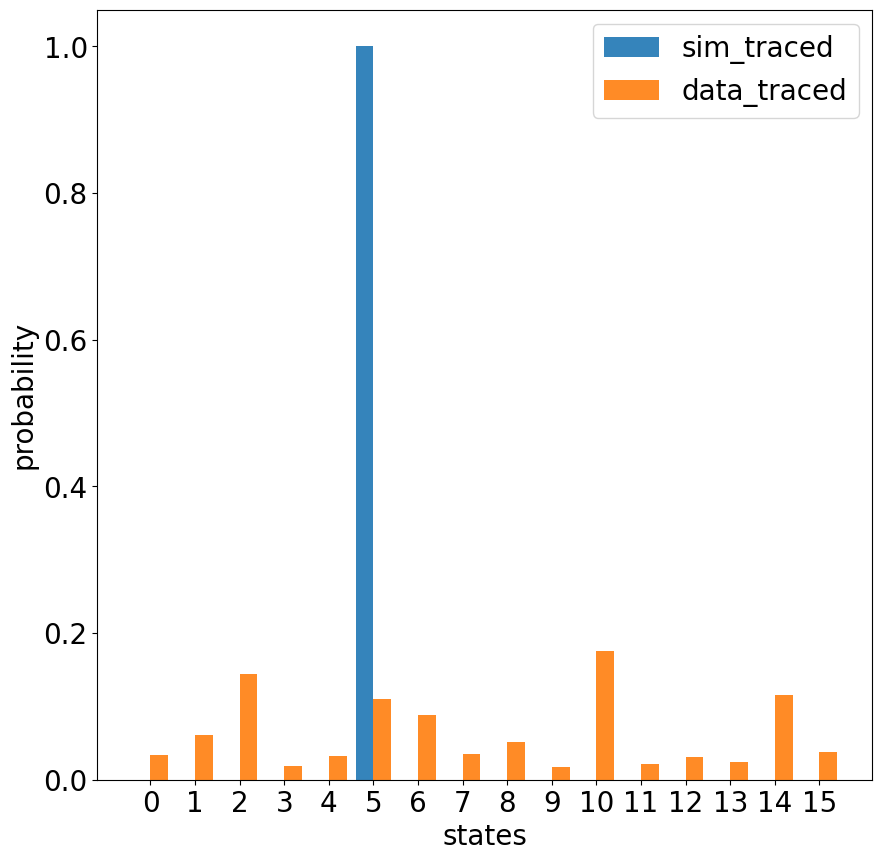

2024-02-23-211108_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-

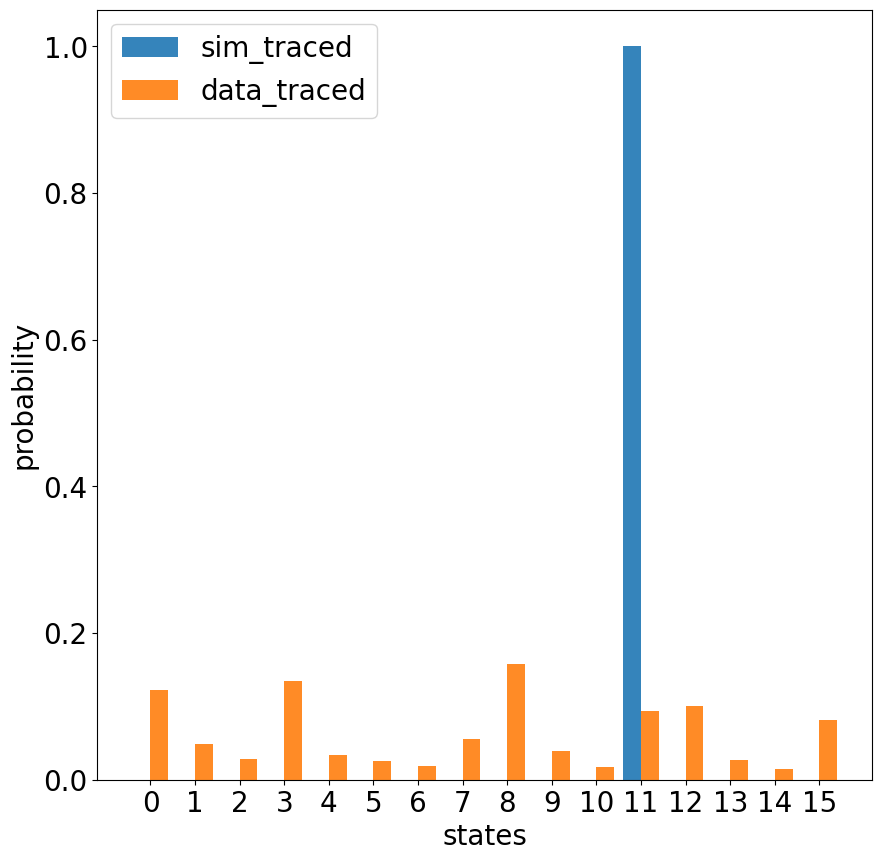

2024-02-23-180833_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:A

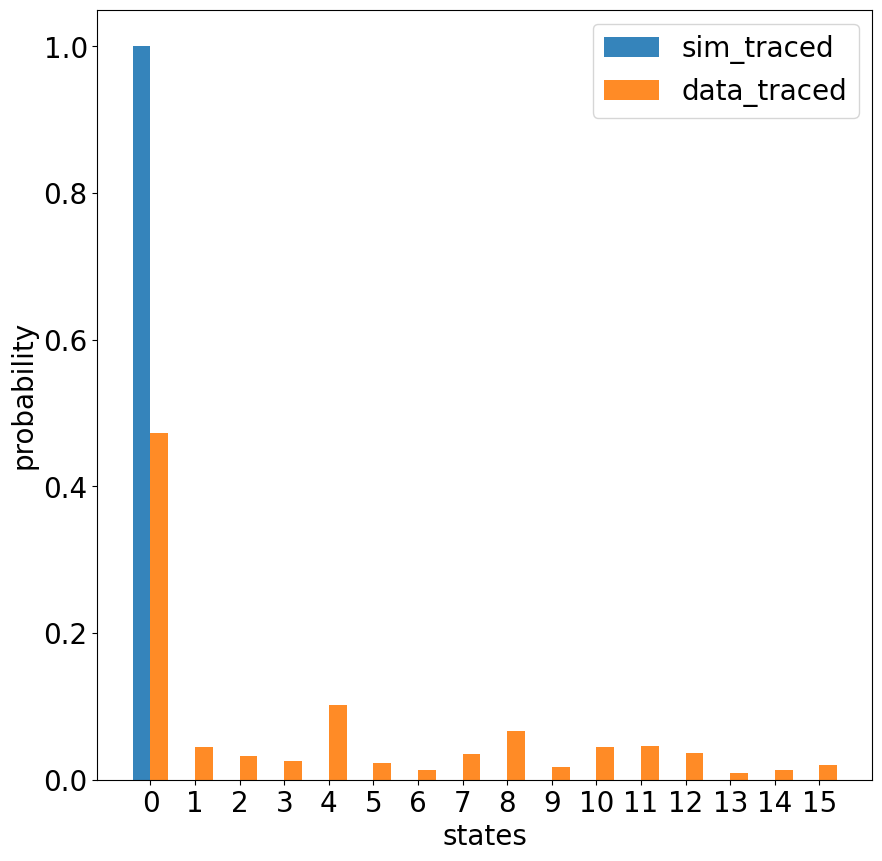

2024-02-23-181105_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX

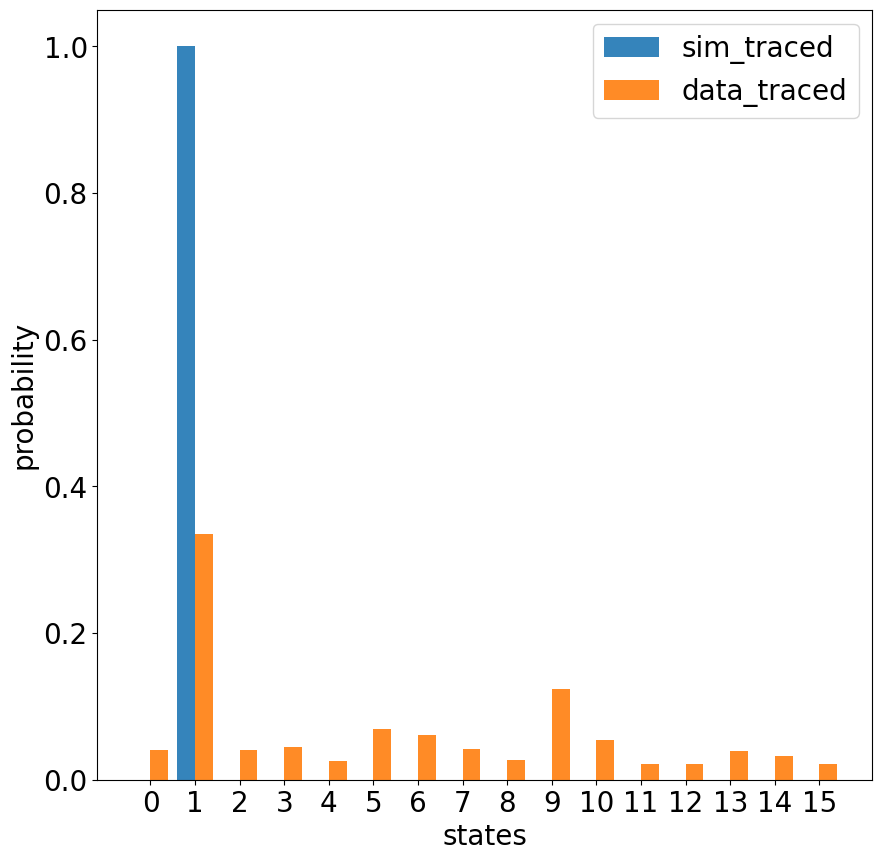

2024-02-23-181243_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+

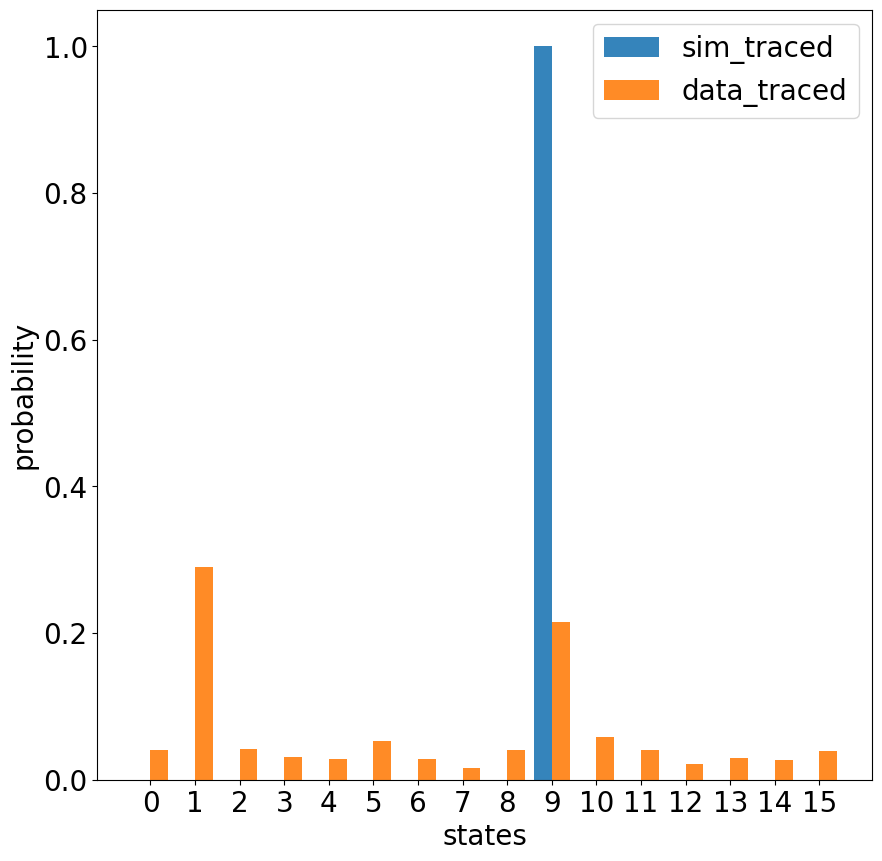

2024-02-23-181420_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+42:FTX

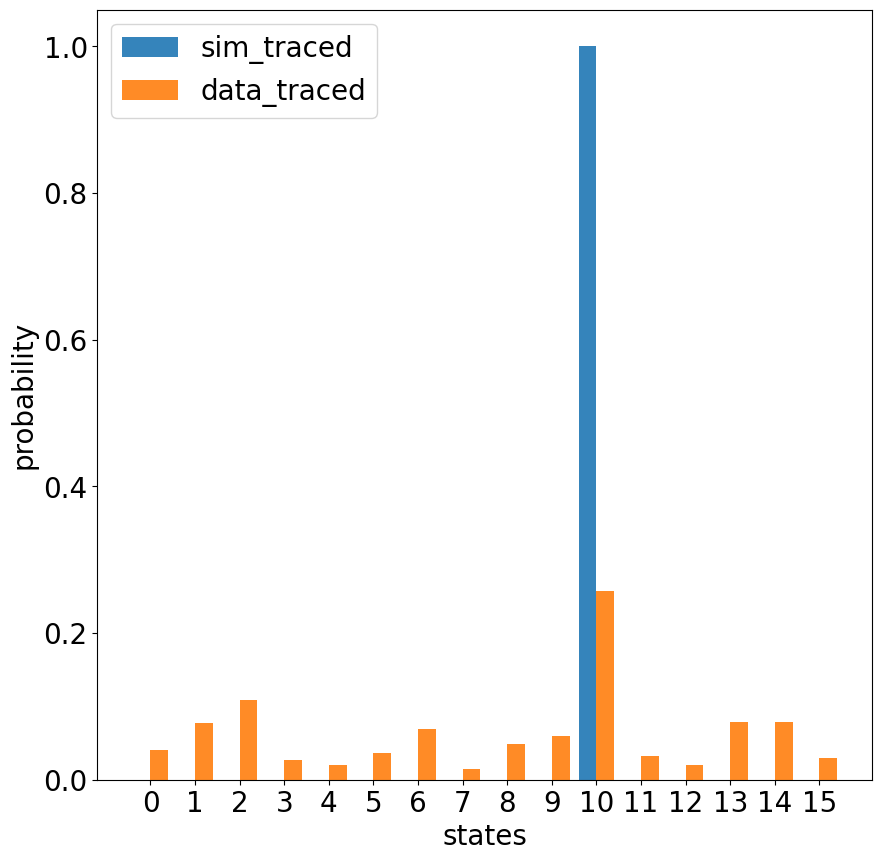

2024-02-23-181653_Line_012.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+42:F

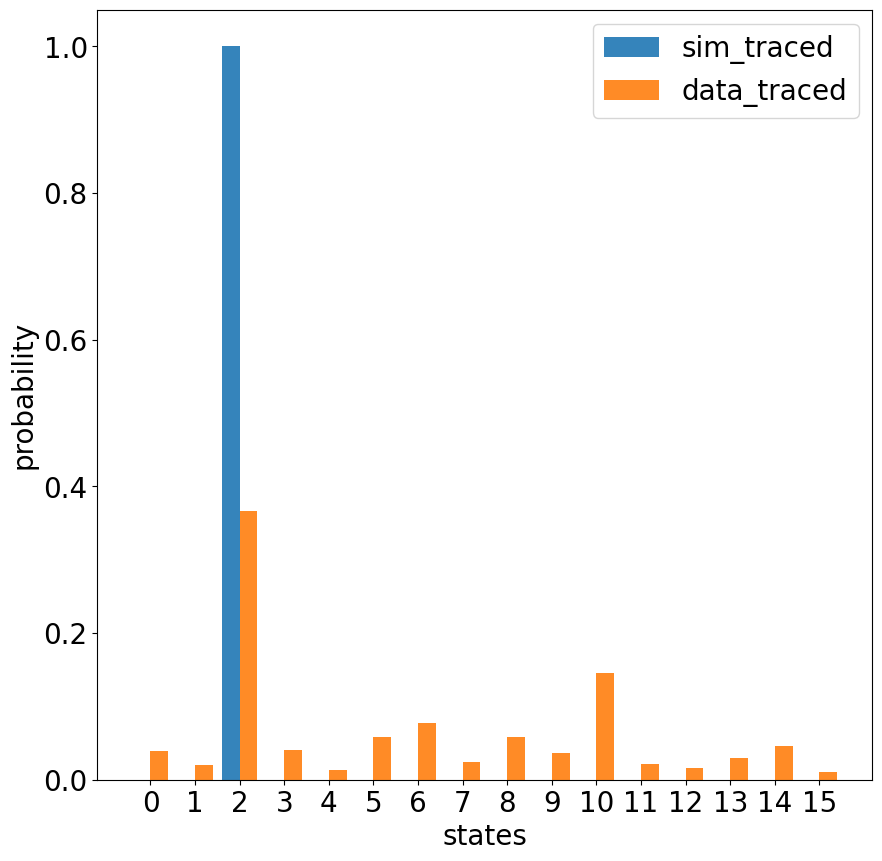

2024-02-23-181830_Line_013.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:FTXA450.2500+:RY+41

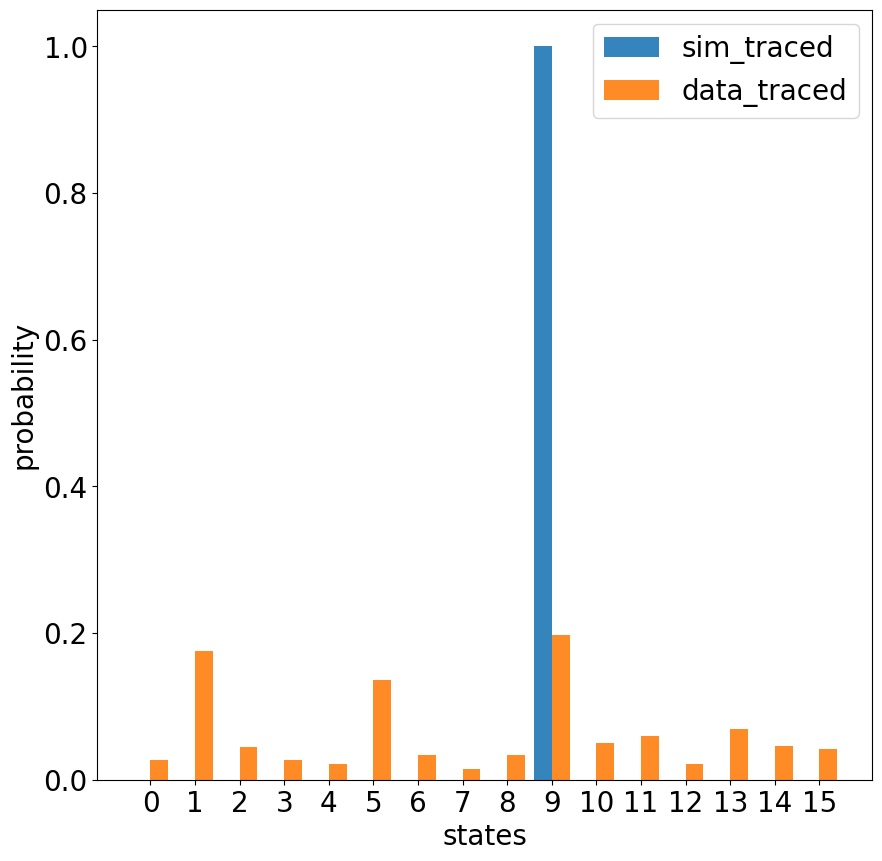

2024-02-23-182007_Line_014.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-

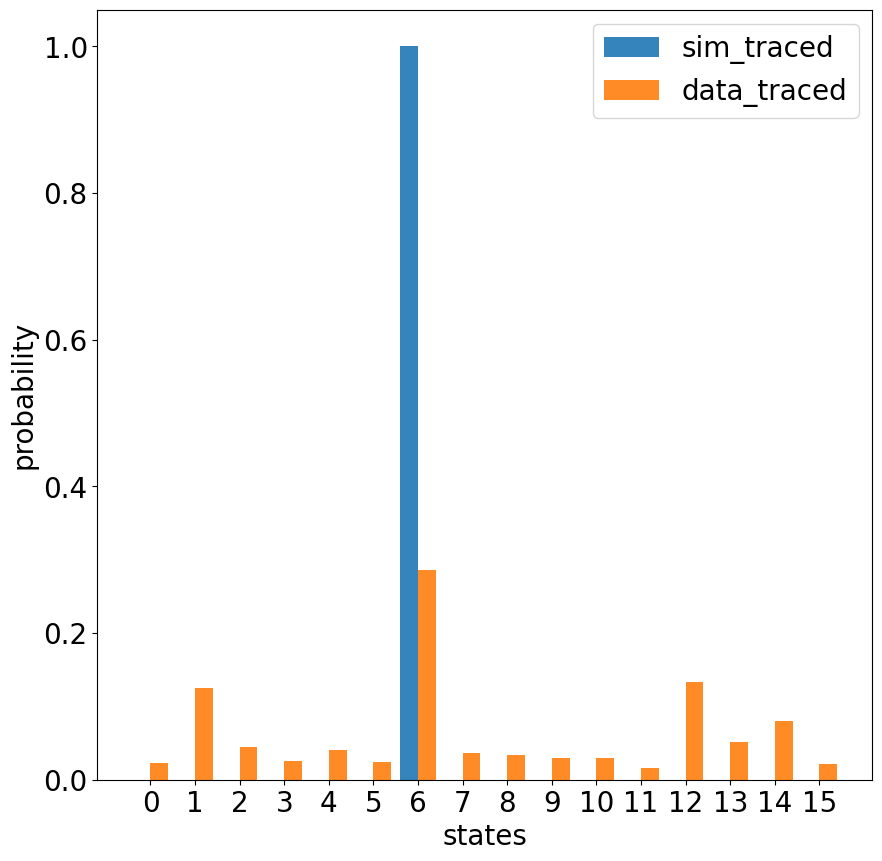

2024-02-23-182243_Line_015.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000

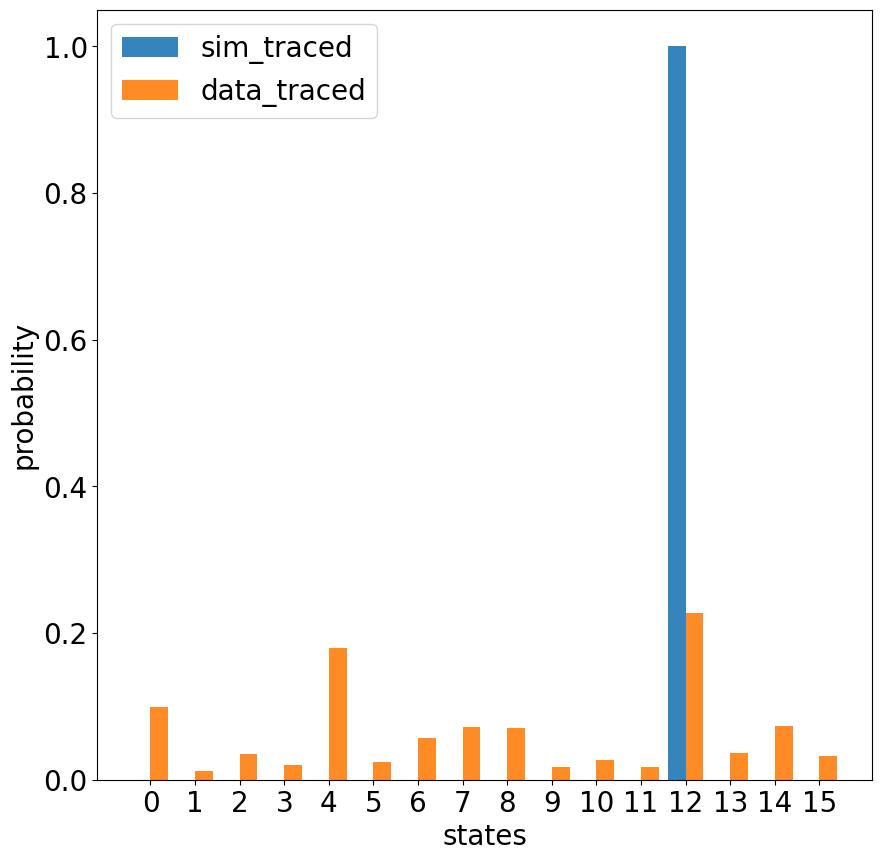

2024-02-23-182419_Line_016.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:

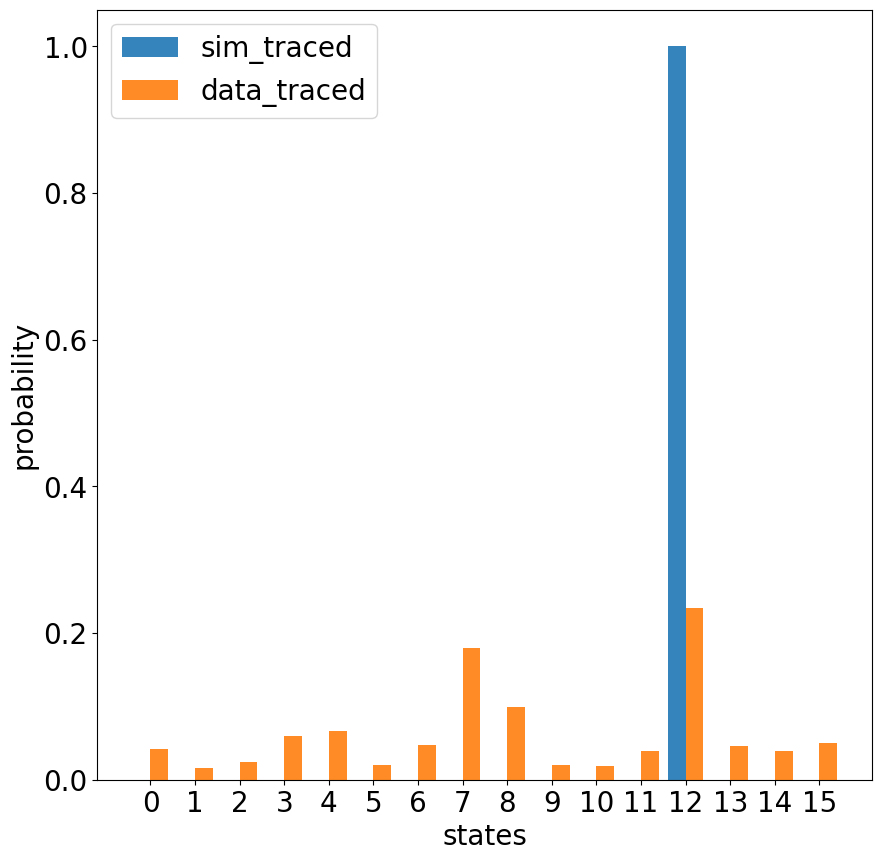

2024-02-23-192851_Line_017.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.250

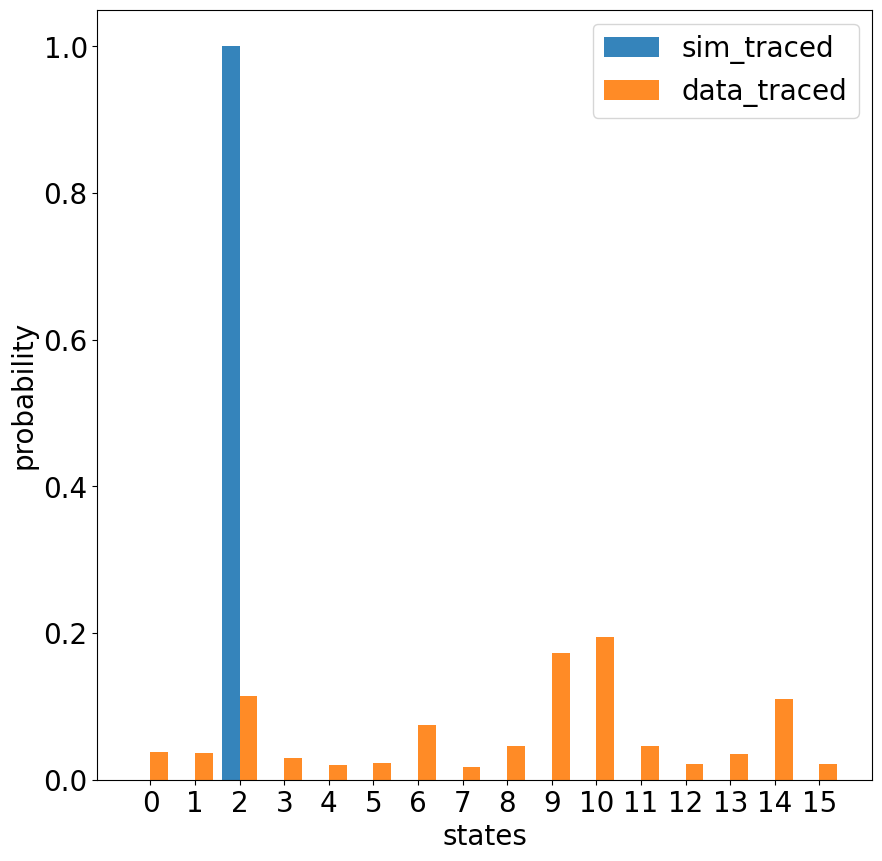

2024-02-23-193029_Line_018.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY

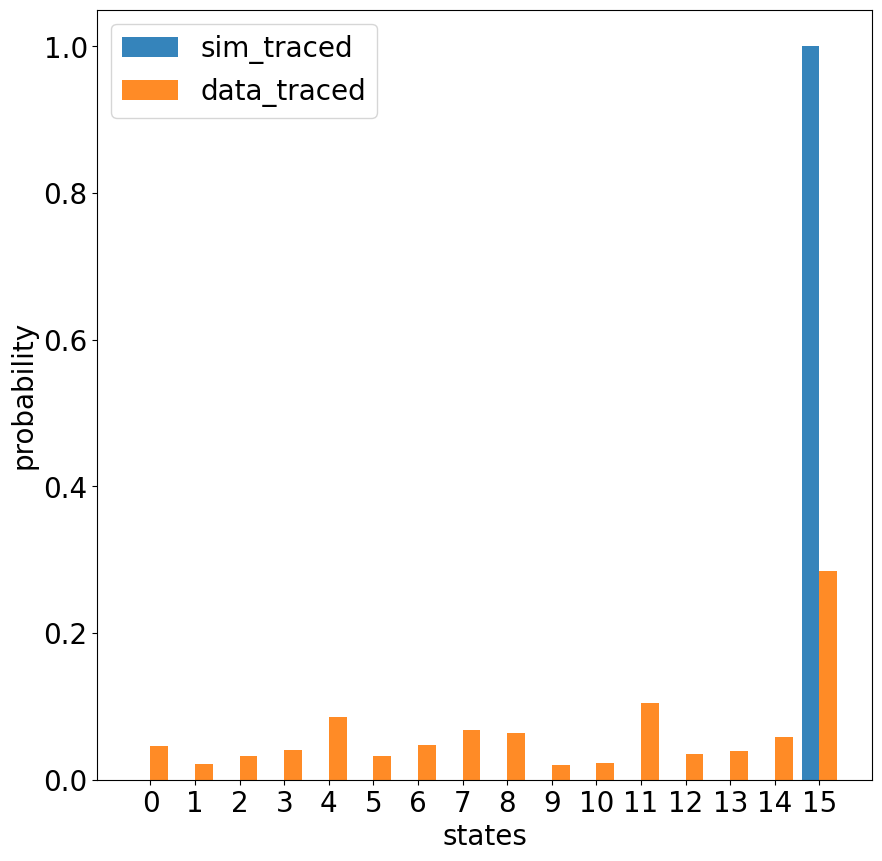

2024-02-23-193209_Line_019.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2

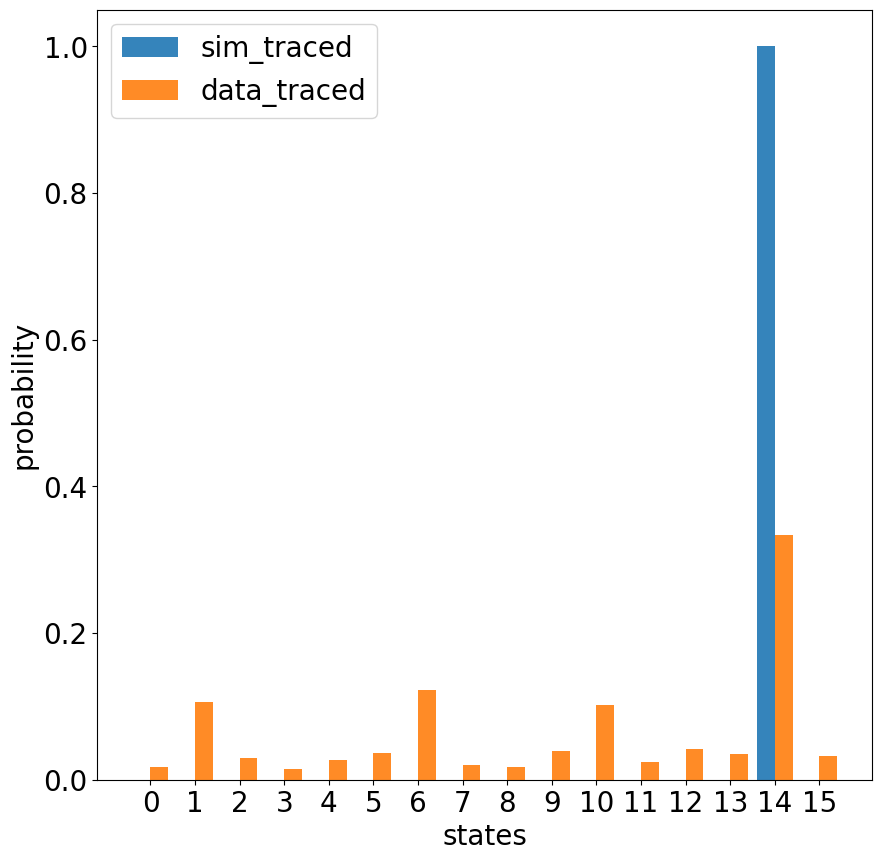

2024-02-23-193347_Line_020.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:F

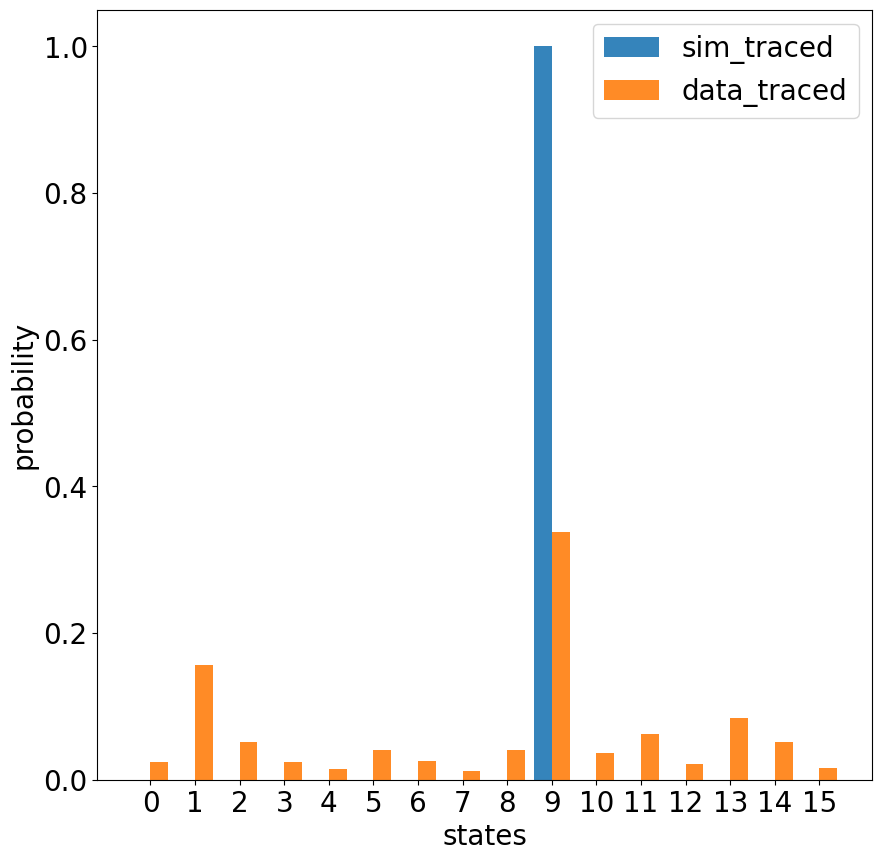

In [11]:
filenames_data=[]
counts_d32=[]
counts_d32_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d32.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
#     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
#     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     counts_d8_spam.append(counts_ibm_mapping_dic_spam)
    
#     a_0703.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
#     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
#     Display_States_Population(states=[b,a,a_s],label=["simulation","d=8","spam"])
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

In [12]:
# print (counts_d2[0])
# print (counts_d2_spam[0])

In [13]:
import copy
from copy import copy, deepcopy
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/02062024EABmapping45213_FT/f1c90c3d-98e5-441a-b825-eca2c372abf9XX45213_FT_01+10", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)

eab_load_cpy=deepcopy(eab_load[0:100])
eab_load_cpy_spam=deepcopy(eab_load[0:100])

In [14]:
C=20
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    print (eab_load_cpy[i]["counts"])
    print (counts_d2_sim[i])

    print (counts_d2[i].copy())
    print ("\n")
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


    
# for i in range (C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==2
#     eab_load_cpy_spam[i]["counts"]=counts_d2_spam[i].copy()



# for i in range (C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])

{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 0, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 2000, '0111': 0, '1111': 0}
{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 0, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 2000, '0111': 0, '1111': 0}
{'0000': 6, '1000': 12, '0100': 1, '1100': 5, '0010': 9, '1010': 59, '0110': 5, '1110': 67, '0001': 24, '1001': 102, '0101': 3, '1101': 9, '0011': 41, '1011': 1612, '0111': 3, '1111': 42}


{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 2000, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 0, '0111': 0, '1111': 0}
{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 2000, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 0, '0111': 0, '1111': 0}
{'0000': 23, '1000': 3, '0100': 18, '1100': 64, '0010': 5, '1010': 43, '0110': 47, '1110':

In [15]:
for i in range (C,2*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==4
    eab_load_cpy[i]["counts"]=counts_d4[i-C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i]["counts"])
    
# for i in range (C,2*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==4
#     eab_load_cpy_spam[i]["counts"]=counts_d4_spam[i-C].copy()

    #     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (C,2*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [16]:
for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

# for i in range (2*C,3*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==8
#     eab_load_cpy_spam[i]["counts"]=counts_d8_spam[i-2*C].copy()

#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (2*C,3*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [17]:
# print (eab_load_cpy)

In [18]:
for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

In [21]:
filename = str(uuid.uuid4())
filename+="XX45213_FTXX_02232024_01+10_ExperimentalData"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0223_45213/eab_results_file/"+filename, "wb") as fp:
    pickle.dump(eab_load_cpy, fp)


Data analysis

plot average fidelity and fit

plot fidelity from each circuit and fit

data analysis with bootstrapping

spam results

In [ ]:

b=[]
c=[1,2]
f=c
c=[1]
print (d)
print (b)
print (c)